<a href="https://colab.research.google.com/github/abhisuj/MSDS-451-TermProject/blob/main/MSDS_451_TermProject_prototype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install yfinance
%pip install pymoo
%pip install pandas numpy matplotlib seaborn
%pip install scikit-learn
%pip install tensorflow
%pip install keras
%pip install talib-binary
%pip install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.8/303.8 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 57.1 MB/s eta 0:00:00


In [54]:
import yfinance as yf
import pandas as pd

# Define the tickers for the selected assets, including SPY
#tickers = ['QQQ', 'SCHD', 'GLD', 'USDU', 'IEF', 'VNQ', 'SPY'] # Replaced BTC-USD with FXE (Invesco CurrencyShares Euro Trust)
#tickers = ['QQQ', 'XLE', 'XLP', 'VEA', 'GLD', 'FXE', 'SCHH', 'SCHD', 'IEF', 'SPY']
tickers = ['AAPL', 'GOOG', 'MSFT', 'NVDA', 'AMD', 'INTC', 'META',
           'BIDU','TSM',
           'COST', 'PG', 'KO', 'PEP',
           'CME', 'AVGO', 'WMT', 'ABBV', 'HD', 'XOM',
           'SCHD', 'VYM', 'PFF',
           'VWO', 'VEA',
           'GLD',
           'FXY', 'FXE',
           'VNQ', 'EQIX', 'TLT',
           'SPY']
# Download historical data for the last 25 years
data = yf.download(tickers, period='25y') # Changed period to 10y

# We'll focus on the 'Close' price since 'Adj Close' is not directly available
close_data = data['Close'].dropna()

# Ensure close_data index is timezone-naive for consistent alignment
if close_data.index.tz is not None:
    close_data.index = close_data.index.tz_localize(None)

display(close_data.head())
display(close_data.tail())

/tmp/ipython-input-2548024129.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='25y') # Changed period to 10y
[*********************100%***********************]  31 of 31 completed


Ticker           AAPL       ABBV   AMD      AVGO        BIDU        CME  \
Date                                                                      
2013-01-02  16.628315  20.898445  2.53  2.372408  104.120003  30.501480   
2013-01-03  16.418425  20.725885  2.49  2.384802  104.980003  30.632187   
2013-01-04  15.961104  20.464058  2.59  2.369491  104.650002  31.945150   
2013-01-07  15.867203  20.505707  2.67  2.356368  102.290001  31.778822   
2013-01-08  15.909916  20.059420  2.67  2.340328  101.089996  31.428297   

Ticker           COST        EQIX         FXE         FXY  ...      SCHD  \
Date                                                       ...             
2013-01-02  79.991333  160.749481  124.899277  112.379997  ...  6.423872   
2013-01-03  80.811340  158.581345  123.668175  112.370003  ...  6.419435   
2013-01-04  80.551147  160.936371  123.887657  111.250000  ...  6.452719   
2013-01-07  79.928230  163.568100  124.212135  111.750000  ...  6.430531   
2013-01-08  79.778450  160.898972  123.925819  112.650002  ...  6.408341   

Ticker             SPY        TLT        TSM        VEA        VNQ        VWO  \
Date                                                                            
2013-01-02  116.953880  84.482887  12.890259  24.463392  40.073383  31.752510   
2013-01-03  116.689651  83.338165  12.883138  24.217453  40.067371  31.563957   
2013-01-04  117.202080  83.663223  12.790552  24.354082  40.253849  31.619825   
2013-01-07  116.881821  83.698517  12.605390  24.231123  40.344051  31.347473   
2013-01-08  116.545502  84.249710  12.491446  24.101313  40.265881  31.089111   

Ticker            VYM        WMT        XOM  
Date                                         
2013-01-02  34.162212  17.857126  52.848492  
2013-01-03  34.101398  17.743649  52.753178  
2013-01-04  34.229771  17.810705  52.997452  
2013-01-07  34.114922  17.640493  52.383816  
2013-01-08  33.986538  17.689493  52.711479  

[5 rows x 31 columns]

Ticker            AAPL        ABBV         AMD        AVGO        BIDU  \
Date                                                                     
2025-11-03  269.049988  211.960007  259.649994  362.549988  121.230003   
2025-11-04  270.040009  215.889999  250.050003  351.940002  124.989998   
2025-11-05  270.140015  216.770004  256.329987  358.980011  123.330002   
2025-11-06  269.769989  219.039993  237.699997  355.589996  127.040001   
2025-11-07  268.470001  219.160004  233.539993  349.429993  125.959999   

Ticker             CME        COST        EQIX         FXE        FXY  ...  \
Date                                                                   ...   
2025-11-03  264.160004  928.039978  832.840027  106.250000  59.639999  ...   
2025-11-04  267.850006  940.739990  829.909973  105.900002  59.849998  ...   
2025-11-05  268.000000  935.030029  822.119995  105.959999  59.650002  ...   
2025-11-06  271.420013  923.580017  819.330017  106.500000  60.110001  ...   
2025-11-07  276.500000  922.739990  824.750000  106.669998  59.939999  ...   

Ticker           SCHD         SPY        TLT         TSM        VEA  \
Date                                                                  
2025-11-03  26.469999  683.340027  89.739998  304.859985  61.130001   
2025-11-04  26.440001  675.239990  89.940002  294.049988  60.320000   
2025-11-05  26.570000  677.580017  88.959999  293.640015  60.700001   
2025-11-06  26.520000  670.309998  89.760002  289.239990  60.419998   
2025-11-07  26.719999  670.969971  89.570000  286.500000  60.610001   

Ticker            VNQ        VWO         VYM         WMT         XOM  
Date                                                                  
2025-11-03  89.050003  55.090000  139.729996  101.589996  113.760002  
2025-11-04  89.199997  54.320000  139.160004  102.269997  114.139999  
2025-11-05  89.279999  54.799999  139.910004  101.470001  113.680000  
2025-11-06  88.849998  54.590000  139.570007  101.680000  114.500000  
2025-11-07  90.230003  54.540001  140.270004  102.589996  117.220001  

[5 rows x 31 columns]

In [55]:
# Calculate daily returns
daily_returns = close_data.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

display(cumulative_returns.head())
display(cumulative_returns.tail())

Ticker          AAPL      ABBV       AMD      AVGO      BIDU       CME  \
Date                                                                     
2013-01-03 -0.012622 -0.008257 -0.015810  0.005224  0.008260  0.004285   
2013-01-04 -0.040125 -0.020786  0.023715 -0.001229  0.005090  0.047331   
2013-01-07 -0.045772 -0.018793  0.055336 -0.006761 -0.017576  0.041878   
2013-01-08 -0.043203 -0.040148  0.055336 -0.013522 -0.029101  0.030386   
2013-01-09 -0.058157 -0.034738  0.039526  0.008297  0.002113  0.029606   

Ticker          COST      EQIX       FXE       FXY  ...      SCHD       SPY  \
Date                                                ...                       
2013-01-03  0.010251 -0.013488 -0.009857 -0.000089  ... -0.000691 -0.002259   
2013-01-04  0.006998  0.001163 -0.008099 -0.010055  ...  0.004491  0.002122   
2013-01-07 -0.000789  0.017534 -0.005502 -0.005606  ...  0.001036 -0.000616   
2013-01-08 -0.002661  0.000930 -0.007794  0.002403  ... -0.002418 -0.003492   
2013-01-09 -0.002169  0.013162 -0.009398 -0.005873  ...  0.002073 -0.000958   

Ticker           TLT       TSM       VEA       VNQ       VWO       VYM  \
Date                                                                     
2013-01-03 -0.013550 -0.000552 -0.010053 -0.000150 -0.005938 -0.001780   
2013-01-04 -0.009702 -0.007735 -0.004468  0.004503 -0.004179  0.001978   
2013-01-07 -0.009284 -0.022100 -0.009495  0.006754 -0.012756 -0.001384   
2013-01-08 -0.002760 -0.030939 -0.014801  0.004804 -0.020893 -0.005142   
2013-01-09 -0.003679 -0.030939 -0.010053  0.007655 -0.015175 -0.001384   

Ticker           WMT       XOM  
Date                            
2013-01-03 -0.006355 -0.001804  
2013-01-04 -0.002600  0.002819  
2013-01-07 -0.012131 -0.008793  
2013-01-08 -0.009387 -0.002593  
2013-01-09 -0.009677 -0.006425  

[5 rows x 31 columns]

Ticker           AAPL      ABBV         AMD        AVGO      BIDU       CME  \
Date                                                                          
2025-11-03  15.180232  9.142382  101.628457  151.819430  0.164330  7.660563   
2025-11-04  15.239770  9.330434   97.833994  147.347186  0.200442  7.781541   
2025-11-05  15.245784  9.372542  100.316201  150.314639  0.184499  7.786459   
2025-11-06  15.223531  9.481162   92.952569  148.885705  0.220131  7.898585   
2025-11-07  15.145352  9.486905   91.308299  146.289185  0.209758  8.065134   

Ticker           COST      EQIX       FXE       FXY  ...      SCHD       SPY  \
Date                                                 ...                       
2025-11-03  10.601757  4.180981 -0.149315 -0.469301  ...  3.120567  4.842816   
2025-11-04  10.760524  4.162754 -0.152117 -0.467432  ...  3.115897  4.773558   
2025-11-05  10.689142  4.114293 -0.151636 -0.469212  ...  3.136134  4.793566   
2025-11-06  10.546001  4.096937 -0.147313 -0.465118  ...  3.128351  4.731405   
2025-11-07  10.535500  4.130654 -0.145952 -0.466631  ...  3.159485  4.737048   

Ticker           TLT        TSM       VEA       VNQ       VWO       VYM  \
Date                                                                      
2025-11-03  0.062227  22.650416  1.498836  1.222173  0.734981  3.090192   
2025-11-04  0.064594  21.811799  1.465725  1.225916  0.710731  3.073507   
2025-11-05  0.052994  21.779994  1.481259  1.227913  0.725848  3.095461   
2025-11-06  0.062464  21.438649  1.469813  1.217182  0.719234  3.085508   
2025-11-07  0.060215  21.226086  1.477580  1.251619  0.717660  3.105999   

Ticker           WMT       XOM  
Date                            
2025-11-03  4.689045  1.152569  
2025-11-04  4.727125  1.159759  
2025-11-05  4.682325  1.151055  
2025-11-06  4.694085  1.166571  
2025-11-07  4.745045  1.218039  

[5 rows x 31 columns]

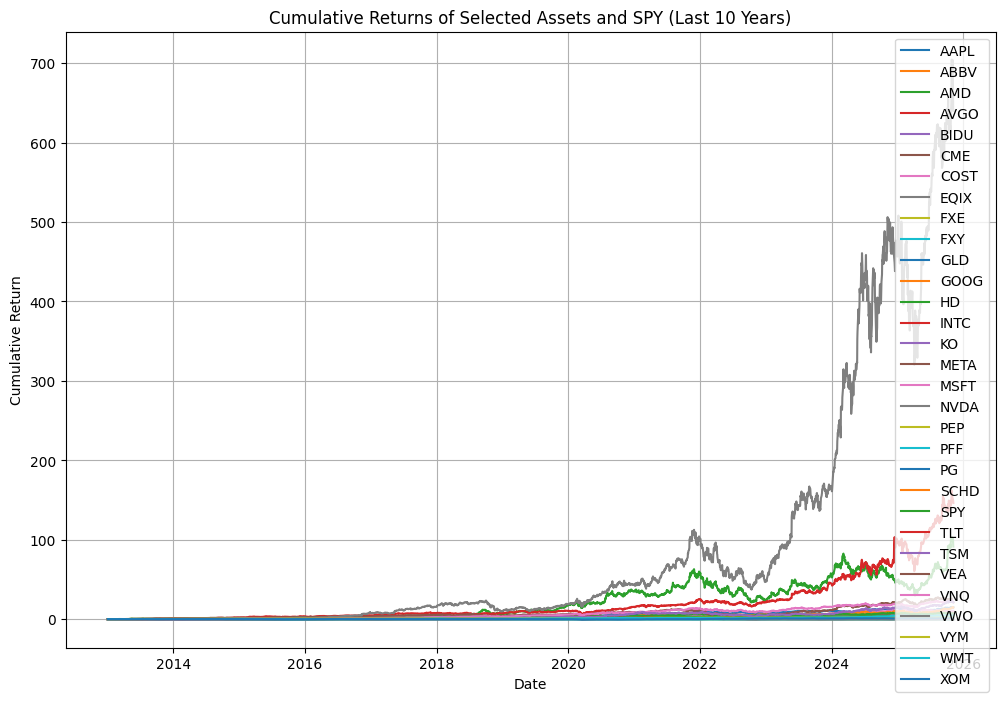

In [56]:
import matplotlib.pyplot as plt

# Plot cumulative returns
plt.figure(figsize=(12, 8))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.title('Cumulative Returns of Selected Assets and SPY (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
display(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'ABBV'),
            ( 'Close',  'AMD'),
            ( 'Close', 'AVGO'),
            ( 'Close', 'BIDU'),
            ( 'Close',  'CME'),
            ( 'Close', 'COST'),
            ( 'Close', 'EQIX'),
            ( 'Close',  'FXE'),
            ( 'Close',  'FXY'),
            ...
            ('Volume', 'SCHD'),
            ('Volume',  'SPY'),
            ('Volume',  'TLT'),
            ('Volume',  'TSM'),
            ('Volume',  'VEA'),
            ('Volume',  'VNQ'),
            ('Volume',  'VWO'),
            ('Volume',  'VYM'),
            ('Volume',  'WMT'),
            ('Volume',  'XOM')],
           names=['Price', 'Ticker'], length=155)

In [59]:
import yfinance as yf
import pandas as pd

# Exclude SPY from the list of portfolio tickers
portfolio_tickers = list(filter(lambda item: item != 'SPY', tickers))

# Initialize dividend_data with the full date range of close_data and all portfolio tickers
# Fill with 0.0 initially, as dividends are sparse.
dividend_data = pd.DataFrame(0.0, index=close_data.index, columns=portfolio_tickers)

for ticker in portfolio_tickers:
    try:
        dividends_series = yf.Ticker(ticker).dividends
        if not dividends_series.empty:
            # Ensure dividend index is timezone-naive for consistent alignment
            if dividends_series.index.tz is not None:
                dividends_series.index = dividends_series.index.tz_localize(None)

            # Reindex the dividend series to the full close_data index and fill NaNs with 0
            # Then assign it to the corresponding column in the pre-initialized dividend_data DataFrame
            dividend_data[ticker] = dividends_series.reindex(close_data.index, fill_value=0.0)

    except Exception as e:
        print(f"Could not retrieve dividend data for {ticker}: {e}")

# The dividend_data DataFrame is already filled with 0.0 for non-dividend days during reindexing,
# so a final fillna(0) might be redundant but doesn't hurt.
dividend_data = dividend_data.fillna(0)

display("Dividend Data Head:")
display(dividend_data.head())
display("Dividend Data Tail:")
display(dividend_data.tail())

'Dividend Data Head:'

AAPL  GOOG  MSFT  NVDA  AMD  INTC  META  BIDU  TSM  COST  ...  \
Date                                                                  ...   
2013-01-02   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2013-01-03   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2013-01-04   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2013-01-07   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2013-01-08   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   

            VYM  PFF  VWO  VEA  GLD  FXY  FXE  VNQ  EQIX  TLT  
Date                                                           
2013-01-02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2013-01-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2013-01-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2013-01-07  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  
2013-01-08  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  

[5 rows x 30 columns]

'Dividend Data Tail:'

AAPL  GOOG  MSFT  NVDA  AMD  INTC  META  BIDU  TSM  COST  ...  \
Date                                                                  ...   
2025-11-03   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2025-11-04   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2025-11-05   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2025-11-06   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   
2025-11-07   0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0  0.0   0.0  ...   

            VYM    PFF  VWO  VEA  GLD  FXY    FXE  VNQ  EQIX    TLT  
Date                                                                 
2025-11-03  0.0  0.171  0.0  0.0  0.0  0.0  0.065  0.0   0.0  0.325  
2025-11-04  0.0  0.000  0.0  0.0  0.0  0.0  0.000  0.0   0.0  0.000  
2025-11-05  0.0  0.000  0.0  0.0  0.0  0.0  0.000  0.0   0.0  0.000  
2025-11-06  0.0  0.000  0.0  0.0  0.0  0.0  0.000  0.0   0.0  0.000  
2025-11-07  0.0  0.000  0.0  0.0  0.0  0.0  0.000  0.0   0.0  0.000  

[5 rows x 30 columns]

In [83]:
# To calculate the total dividends paid by an equal-weighted portfolio,
# we can sum the dividends paid by each asset on each date and divide by the number of assets.
# However, dividend payments are not daily. We'll resample to a more appropriate frequency, like monthly or quarterly,
# and calculate the sum of dividends paid within each period. Let's use a monthly frequency.
monthly_dividends = dividend_data.resample('M').sum()

annualized_dividends = monthly_dividends.resample('Y').sum()
display("Annualized Dividends Paid by Equal Weighted Portfolio (Last 10 Years):")
display(annualized_dividends)

annualized_yield = annualized_dividends / close_data[annualized_dividends.columns]

# Assuming an equal-weighted portfolio, the total dividend received by the portfolio in each month
# is the sum of dividends from each asset divided by the number of assets.
# We need to align this with the dates in our price data.
# For simplicity here, we'll calculate the cumulative sum of dividends based on the dividend payment dates.
# A more precise calculation would involve tracking the portfolio holdings over time.

# Let's calculate the cumulative sum of dividends over time
cumulative_dividends = monthly_dividends.sum(axis=1).cumsum()

display("Cumulative Dividends Paid by Equal Weighted Portfolio (Monthly):")
display(cumulative_dividends.tail())

/tmp/ipython-input-203563725.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_dividends = dividend_data.resample('M').sum()
/tmp/ipython-input-203563725.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annualized_dividends = monthly_dividends.resample('Y').sum()


'Annualized Dividends Paid by Equal Weighted Portfolio (Last 10 Years):'

AAPL  GOOG  MSFT      NVDA  AMD   INTC   META  BIDU    TSM  \
Date                                                                         
2013-12-31  0.421430  0.00  0.97  0.007750  0.0  0.900  0.000   0.0  0.502   
2014-12-31  0.461429  0.00  1.15  0.008500  0.0  0.900  0.000   0.0  0.502   
2015-12-31  0.507500  0.00  1.29  0.009900  0.0  0.960  0.000   0.0  0.728   
2016-12-31  0.557500  0.00  1.47  0.012125  0.0  1.040  0.000   0.0  0.929   
2017-12-31  0.615000  0.00  1.59  0.014250  0.0  1.079  0.000   0.0  1.159   
2018-12-31  0.705000  0.00  1.72  0.015250  0.0  1.200  0.000   0.0  1.345   
2019-12-31  0.760000  0.00  1.89  0.016000  0.0  1.260  0.000   0.0  2.008   
2020-12-31  0.807500  0.00  2.09  0.016000  0.0  1.320  0.000   0.0  1.706   
2021-12-31  0.865000  0.00  2.30  0.016000  0.0  1.392  0.000   0.0  1.892   
2022-12-31  0.910000  0.00  2.54  0.016000  0.0  1.460  0.000   0.0  1.856   
2023-12-31  0.950000  0.00  2.79  0.016000  0.0  0.740  0.000   0.0  1.847   
2024-12-31  0.990000  0.60  3.08  0.034000  0.0  0.375  2.000   0.0  2.340   
2025-12-31  0.770000  0.62  2.49  0.030000  0.0  0.000  1.575   0.0  2.286   

              COST  ...    VYM    PFF    VWO    VEA  GLD  FXY    FXE    VNQ  \
Date                ...                                                       
2013-12-31   1.205  ...  1.749  2.434  1.125  1.083  0.0  0.0  0.000  2.791   
2014-12-31   1.375  ...  1.908  2.493  1.143  1.394  0.0  0.0  0.000  2.919   
2015-12-31   6.555  ...  2.149  2.240  1.066  1.071  0.0  0.0  0.000  3.124   
2016-12-31   1.750  ...  2.206  2.178  0.900  1.114  0.0  0.0  0.000  3.976   
2017-12-31   8.950  ...  2.401  2.129  1.058  1.243  0.0  0.0  0.000  3.514   
2018-12-31   2.210  ...  2.649  2.161  1.098  1.244  0.0  0.0  0.000  3.531   
2019-12-31   2.520  ...  2.842  1.996  1.439  1.340  0.0  0.0  0.000  3.144   
2020-12-31  12.750  ...  2.906  1.840  0.955  0.965  0.0  0.0  0.000  3.335   
2021-12-31   3.070  ...  3.096  1.755  1.299  1.614  0.0  0.0  0.000  2.965   
2022-12-31   3.490  ...  3.252  1.835  1.604  1.223  0.0  0.0  0.015  3.227   
2023-12-31  18.960  ...  3.479  2.068  1.448  1.512  0.0  0.0  1.520  3.493   
2024-12-31   4.500  ...  3.495  1.985  1.409  1.605  0.0  0.0  2.187  3.434   
2025-12-31   5.060  ...  2.554  1.708  0.466  0.970  0.0  0.0  0.959  2.672   

             EQIX    TLT  
Date                      
2013-12-31   0.00  3.317  
2014-12-31   7.57  3.362  
2015-12-31  17.71  3.148  
2016-12-31   7.00  3.102  
2017-12-31   8.00  3.088  
2018-12-31   9.12  3.196  
2019-12-31   9.84  3.074  
2020-12-31  10.64  2.365  
2021-12-31  11.48  2.217  
2022-12-31  12.40  2.656  
2023-12-31  14.49  3.343  
2024-12-31  17.04  3.755  
2025-12-31  14.07  3.198  

[13 rows x 30 columns]

'Cumulative Dividends Paid by Equal Weighted Portfolio (Monthly):'

Date
2025-07-31    818.130803
2025-08-31    826.992803
2025-09-30    837.727803
2025-10-31    842.269803
2025-11-30    842.830803
Freq: ME, dtype: float64

'Cumulative Dividends Paid by Equal Weighted Portfolio (Monthly):'

Date
2025-07-31    818.130803
2025-08-31    826.992803
2025-09-30    837.727803
2025-10-31    842.269803
2025-11-30    842.830803
Freq: ME, dtype: float64

In [86]:
import pandas as pd

# Ensure dividend_data and close_data are available
if 'dividend_data' not in globals() or 'close_data' not in globals():
    raise ValueError("dividend_data or close_data not found. Please ensure these are loaded.")

# Calculate annual dividends paid per ticker
# We'll reindex dividend_data to close_data's index and then resample annually
aligned_daily_dividends = dividend_data.reindex(close_data.index).fillna(0)
annual_dividends_sum = aligned_daily_dividends.resample('YE').sum()

# Get year-end closing prices per ticker
# Find the last available close price for each year
annual_closing_prices = close_data.resample('YE').last()

# Calculate the annualized dividend yield for each year and ticker
# Handle potential division by zero by replacing 0s with NaN before division
annual_dividend_yield_per_ticker = annual_dividends_sum.div(annual_closing_prices.replace(0, pd.NA))

display("Annualized Dividend Yield (Annual Dividends / Year-End Price) per Ticker:")
display(annual_dividend_yield_per_ticker.fillna(0).head())
display(annual_dividend_yield_per_ticker.fillna(0).tail())

# Optional: Display mean annual yield over the period for comparison
#display("\nAverage Annualized Dividend Yield (Mean over years) per Ticker:")
#display(annual_dividend_yield_per_ticker.mean().fillna(0).sort_values(ascending=False))

'Annualized Dividend Yield (Annual Dividends / Year-End Price) per Ticker:'

AAPL      ABBV  AMD      AVGO  BIDU       CME      COST  \
Date                                                                      
2013-12-31  0.024195  0.048959  0.0  0.022335   0.0  0.089120  0.012705   
2014-12-31  0.018838  0.039709  0.0  0.016157   0.0  0.066411  0.012035   
2015-12-31  0.021363  0.051680  0.0  0.014752   0.0  0.077909  0.048236   
2016-12-31  0.020864  0.053130  0.0  0.018333   0.0  0.067075  0.012842   
2017-12-31  0.015503  0.037267  0.0  0.023614   0.0  0.055077  0.053671   

                EQIX  FXE  FXY  ...      SCHD  SPY       TLT       TSM  \
Date                            ...                                      
2013-12-31  0.000000  0.0  0.0  ...  0.036062  0.0  0.044722  0.039321   
2014-12-31  0.042971  0.0  0.0  ...  0.037361  0.0  0.035607  0.029967   
2015-12-31  0.070646  0.0  0.0  ...  0.041090  0.0  0.033948  0.041435   
2016-12-31  0.023136  0.0  0.0  ...  0.038701  0.0  0.033065  0.040326   
2017-12-31  0.020466  0.0  0.0  ...  0.034265  0.0  0.030147  0.035329   

                 VEA       VNQ       VWO       VYM       WMT       XOM  
Date                                                                    
2013-12-31  0.036943  0.068927  0.038059  0.040299  0.030139  0.039719  
2014-12-31  0.050570  0.055283  0.038684  0.038720  0.027514  0.046404  
2015-12-31  0.038998  0.057761  0.042858  0.043489  0.038285  0.056758  
2016-12-31  0.039522  0.067708  0.032258  0.038144  0.033669  0.048989  
2017-12-31  0.034883  0.057046  0.028840  0.035660  0.023432  0.052295  

[5 rows x 31 columns]

AAPL      ABBV  AMD      AVGO  BIDU       CME      COST  \
Date                                                                      
2021-12-31  0.004969  0.044535  0.0  0.024127   0.0  0.034968  0.005672   
2022-12-31  0.007103  0.038952  0.0  0.031553   0.0  0.056270  0.007966   
2023-12-31  0.004976  0.040982  0.0  0.017419   0.0  0.048647  0.029042   
2024-12-31  0.003967  0.036110  0.0  0.009426   0.0  0.045427  0.004937   
2025-12-31  0.002868  0.029932  0.0  0.005065   0.0  0.013562  0.005484   

                EQIX       FXE  FXY  ...      SCHD  SPY       TLT       TSM  \
Date                                 ...                                      
2021-12-31  0.014627  0.000000  0.0  ...  0.031893  0.0  0.017102  0.016788   
2022-12-31  0.020030  0.000159  0.0  ...  0.037537  0.0  0.029794  0.026037   
2023-12-31  0.018665  0.015370  0.0  ...  0.037265  0.0  0.036491  0.018205   
2024-12-31  0.018375  0.023079  0.0  ...  0.037465  0.0  0.044578  0.011976   
2025-12-31  0.017060  0.008990  0.0  ...  0.028780  0.0  0.035704  0.007979   

                 VEA       VNQ       VWO       VYM       WMT       XOM  
Date                                                                    
2021-12-31  0.035366  0.029639  0.029499  0.030865  0.015987  0.065172  
2022-12-31  0.031655  0.043741  0.044409  0.032562  0.016353  0.035373  
2023-12-31  0.033184  0.042329  0.036694  0.032686  0.014746  0.039118  
2024-12-31  0.034150  0.039704  0.032285  0.027923  0.009278  0.036687  
2025-12-31  0.016004  0.029613  0.008544  0.018208  0.006872  0.025337  

[5 rows x 31 columns]

In [89]:
import pandas as pd
import numpy as np

# Ensure required dataframes are available
if 'annual_dividend_yield_per_ticker' not in globals():
    raise ValueError("annual_dividend_yield_per_ticker is not defined. Please run the previous cell to calculate it.")
if 'annual_closing_prices' not in globals():
    raise ValueError("annual_closing_prices is not defined. Please run the previous cell to calculate it.")
if 'close_data' not in globals():
    raise ValueError("close_data is not defined. Please ensure historical price data is downloaded.")

# 1. Calculate the total annual dividends in dollar amounts
# We need to ensure indices and columns align for multiplication
# Reindex annual_closing_prices to match annual_dividend_yield_per_ticker index and columns
aligned_annual_closing_prices = annual_closing_prices.reindex_like(annual_dividend_yield_per_ticker)
annual_dividend_dollars_per_ticker = annual_dividend_yield_per_ticker * aligned_annual_closing_prices

# Fill any NaNs that might result from missing data points in either source with 0
annual_dividend_dollars_per_ticker = annual_dividend_dollars_per_ticker.fillna(0)

# 2. Determine the number of trading days for each year
# Group close_data by year and count the number of entries
trading_days_per_year = close_data.groupby(close_data.index.year).size()

# Create a DataFrame to store the new aligned daily dividend data
aligned_daily_dividend_data_new = pd.DataFrame(0.0, index=close_data.index, columns=portfolio_tickers)

# 3. Distribute annual dividends evenly across trading days in each year
for year in annual_dividend_dollars_per_ticker.index.year.unique():
    if year in trading_days_per_year.index:
        num_days = trading_days_per_year[year]
        if num_days > 0:
            # Get the annual dividend dollars for the current year
            annual_dividends_for_year = annual_dividend_dollars_per_ticker.loc[annual_dividend_dollars_per_ticker.index.year == year].iloc[0]

            # Calculate the daily average dividend amount for this year
            daily_avg_dividends_for_year = annual_dividends_for_year / num_days

            # Assign this daily average to all trading days within that year
            year_mask = (aligned_daily_dividend_data_new.index.year == year)
            # Ensure alignment of columns and use .loc for assignment
            aligned_daily_dividend_data_new.loc[year_mask, daily_avg_dividends_for_year.index] = daily_avg_dividends_for_year.values

# Display the head and tail of the newly created DataFrame
display("New Aligned Daily Dividend Data (derived from annual yield/year-end price distributed daily):")
display(aligned_daily_dividend_data_new.head())
display(aligned_daily_dividend_data_new.tail())

# Update the global aligned_daily_dividend_data variable with the new calculation
aligned_daily_dividend_data = aligned_daily_dividend_data_new

# Update nsga_ii_data with the average annual dividend yield (re-calculating using this new data)
# Recalculate average_dividend_yield from the newly created aligned_daily_dividend_data
cols = list(portfolio_tickers)

# Reindex aligned_daily_dividend_data to close_data's index if not already (should be the case)
div_df_aligned = aligned_daily_dividend_data.reindex(close_data.index).fillna(0)

# Calculate annual dividends sum
annual_div_sum = div_df_aligned.resample('YE').sum()

# Get year-end closing prices per ticker for average yield calculation
annual_close_prices_for_yield = close_data.resample('YE').last()

# Calculate average annual yield based on new data
# Handle potential division by zero
avg_annual_yield = (annual_div_sum.div(annual_close_prices_for_yield.replace(0, np.nan))).mean(axis=0).reindex(cols).fillna(0)



'New Aligned Daily Dividend Data (derived from annual yield/year-end price distributed daily):'

AAPL  GOOG      MSFT      NVDA  AMD      INTC  META  BIDU  \
Date                                                                        
2013-01-02  0.001672   0.0  0.003849  0.000031  0.0  0.003571   0.0   0.0   
2013-01-03  0.001672   0.0  0.003849  0.000031  0.0  0.003571   0.0   0.0   
2013-01-04  0.001672   0.0  0.003849  0.000031  0.0  0.003571   0.0   0.0   
2013-01-07  0.001672   0.0  0.003849  0.000031  0.0  0.003571   0.0   0.0   
2013-01-08  0.001672   0.0  0.003849  0.000031  0.0  0.003571   0.0   0.0   

                 TSM      COST  ...       PFF       VWO       VEA  GLD  FXY  \
Date                            ...                                           
2013-01-02  0.001992  0.004782  ...  0.009659  0.004464  0.004298  0.0  0.0   
2013-01-03  0.001992  0.004782  ...  0.009659  0.004464  0.004298  0.0  0.0   
2013-01-04  0.001992  0.004782  ...  0.009659  0.004464  0.004298  0.0  0.0   
2013-01-07  0.001992  0.004782  ...  0.009659  0.004464  0.004298  0.0  0.0   
2013-01-08  0.001992  0.004782  ...  0.009659  0.004464  0.004298  0.0  0.0   

            FXE       VNQ  EQIX       TLT  SPY  
Date                                            
2013-01-02  0.0  0.011075   0.0  0.013163  0.0  
2013-01-03  0.0  0.011075   0.0  0.013163  0.0  
2013-01-04  0.0  0.011075   0.0  0.013163  0.0  
2013-01-07  0.0  0.011075   0.0  0.013163  0.0  
2013-01-08  0.0  0.011075   0.0  0.013163  0.0  

[5 rows x 31 columns]

AAPL      GOOG      MSFT     NVDA  AMD  INTC     META  BIDU  \
Date                                                                          
2025-11-03  0.003598  0.002897  0.011636  0.00014  0.0   0.0  0.00736   0.0   
2025-11-04  0.003598  0.002897  0.011636  0.00014  0.0   0.0  0.00736   0.0   
2025-11-05  0.003598  0.002897  0.011636  0.00014  0.0   0.0  0.00736   0.0   
2025-11-06  0.003598  0.002897  0.011636  0.00014  0.0   0.0  0.00736   0.0   
2025-11-07  0.003598  0.002897  0.011636  0.00014  0.0   0.0  0.00736   0.0   

                 TSM      COST  ...       PFF       VWO       VEA  GLD  FXY  \
Date                            ...                                           
2025-11-03  0.010682  0.023645  ...  0.007981  0.002178  0.004533  0.0  0.0   
2025-11-04  0.010682  0.023645  ...  0.007981  0.002178  0.004533  0.0  0.0   
2025-11-05  0.010682  0.023645  ...  0.007981  0.002178  0.004533  0.0  0.0   
2025-11-06  0.010682  0.023645  ...  0.007981  0.002178  0.004533  0.0  0.0   
2025-11-07  0.010682  0.023645  ...  0.007981  0.002178  0.004533  0.0  0.0   

                 FXE       VNQ      EQIX       TLT  SPY  
Date                                                     
2025-11-03  0.004481  0.012486  0.065748  0.014944  0.0  
2025-11-04  0.004481  0.012486  0.065748  0.014944  0.0  
2025-11-05  0.004481  0.012486  0.065748  0.014944  0.0  
2025-11-06  0.004481  0.012486  0.065748  0.014944  0.0  
2025-11-07  0.004481  0.012486  0.065748  0.014944  0.0  

[5 rows x 31 columns]

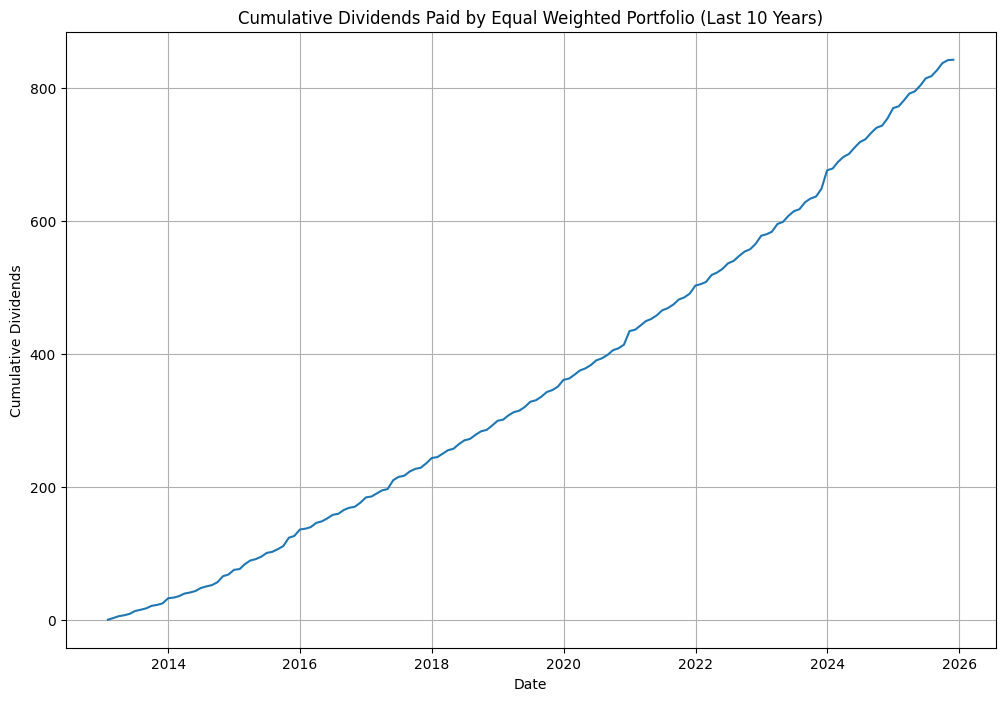

In [88]:
import matplotlib.pyplot as plt

# Plot cumulative dividends paid by the portfolio
plt.figure(figsize=(12, 8))
plt.plot(cumulative_dividends.index, cumulative_dividends)

plt.title('Cumulative Dividends Paid by Equal Weighted Portfolio (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Dividends')
plt.grid(True)
plt.show()

In [62]:
# Exclude SPY from the portfolio
portfolio_assets = close_data.drop(columns=['SPY'])

# Calculate daily returns for the portfolio assets
portfolio_daily_returns = portfolio_assets.pct_change().dropna()

# For a simple equal-weighted portfolio, the portfolio daily return is the average of the asset daily returns
portfolio_returns = portfolio_daily_returns.mean(axis=1)

# Calculate cumulative returns of the portfolio
portfolio_cumulative_returns = (1 + portfolio_returns).cumprod() - 1

display("Portfolio Cumulative Returns (Equal Weighted):")
display(portfolio_cumulative_returns.tail())

'Portfolio Cumulative Returns (Equal Weighted):'

Date
2025-11-03    7.528431
2025-11-04    7.472455
2025-11-05    7.484631
2025-11-06    7.435837
2025-11-07    7.459956
dtype: float64

In [63]:
import numpy as np

# Calculate annualized volatility (assuming 252 trading days in a year)
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

# Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity in this example)
sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)

display(f"Portfolio Annualized Volatility (Equal Weighted): {annualized_volatility:.4f}")
display(f"Portfolio Sharpe Ratio (Equal Weighted): {sharpe_ratio:.4f}")

'Portfolio Annualized Volatility (Equal Weighted): 0.1455'

'Portfolio Sharpe Ratio (Equal Weighted): 1.2176'

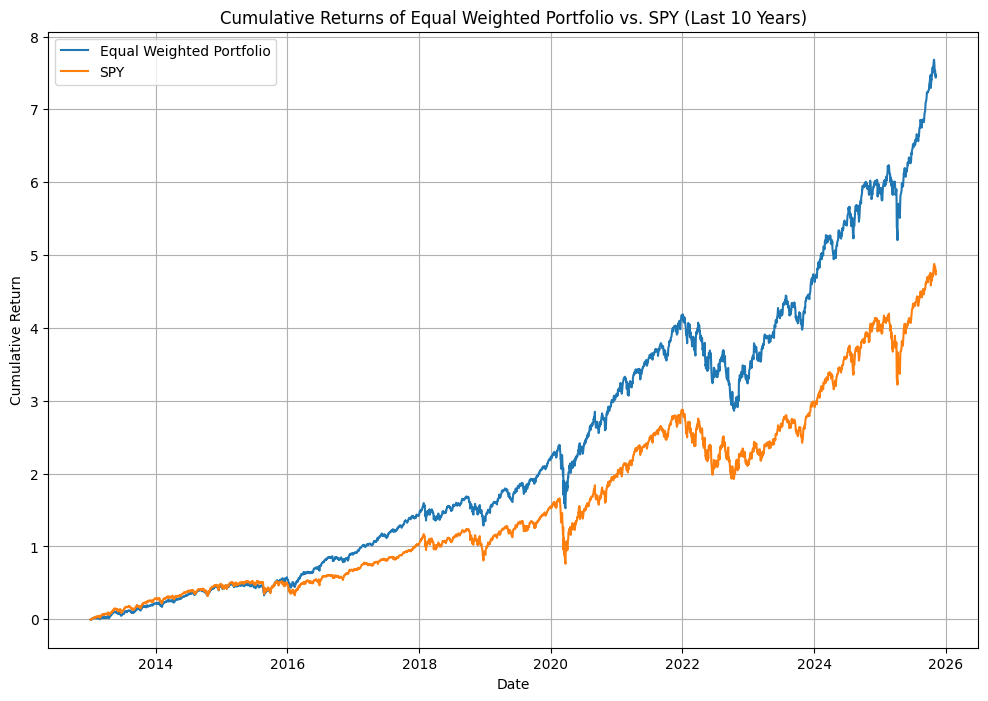

In [64]:
import matplotlib.pyplot as plt

# Plot cumulative returns of the portfolio against SPY
plt.figure(figsize=(12, 8))
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label='Equal Weighted Portfolio')
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label='SPY') # Use cumulative_returns which includes SPY

plt.title('Cumulative Returns of Equal Weighted Portfolio vs. SPY (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
import numpy as np
import pandas as pd

# Calculate daily returns for SPY
spy_returns = daily_returns['SPY']

# Calculate Annualized Volatility for SPY (assuming 252 trading days in a year)
spy_annualized_volatility = spy_returns.std() * np.sqrt(252)

# Calculate Sharpe Ratio for SPY (assuming risk-free rate is 0 for simplicity)
spy_sharpe_ratio = spy_returns.mean() / spy_returns.std() * np.sqrt(252)

# Calculate Value at Risk (VaR) for SPY
# VaR at a certain confidence level (e.g., 95%) represents the maximum expected loss over a given time period.
# We'll use the historical method here.
confidence_level = 0.95
spy_VaR_95 = -np.percentile(spy_returns, 100 * (1 - confidence_level))

confidence_level_99 = 0.99
spy_VaR_99 = -np.percentile(spy_returns, 100 * (1 - confidence_level_99))


# Calculate Conditional Value at Risk (CVaR) for SPY
# CVaR (or Expected Shortfall) is the expected loss given that the loss is greater than the VaR.
# It provides a more conservative measure of risk than VaR.
# We'll calculate CVaR based on the returns that are worse than the VaR.
spy_CVaR_95 = -spy_returns[spy_returns < -spy_VaR_95].mean()
spy_CVaR_99 = -spy_returns[spy_returns < -spy_VaR_99].mean()


display(f"SPY Annualized Volatility: {spy_annualized_volatility:.4f}")
display(f"SPY Sharpe Ratio: {spy_sharpe_ratio:.4f}")
display(f"SPY VaR (95% confidence): {spy_VaR_95:.4f}")
display(f"SPY CVaR (95% confidence): {spy_CVaR_95:.4f}")
display(f"SPY VaR (99% confidence): {spy_VaR_99:.4f}")
display(f"SPY CVaR (99% confidence): {spy_CVaR_99:.4f}")

'SPY Annualized Volatility: 0.1697'

'SPY Sharpe Ratio: 0.8876'

'SPY VaR (95% confidence): 0.0160'

'SPY CVaR (95% confidence): 0.0259'

'SPY VaR (99% confidence): 0.0302'

'SPY CVaR (99% confidence): 0.0444'

In [66]:
import numpy as np
import pandas as pd

# Calculate Annualized Volatility (already done, but including for completeness)
annualized_volatility = portfolio_returns.std() * np.sqrt(252)

# Calculate Sharpe Ratio (already done, but including for completeness)
# Assuming risk-free rate is 0 for simplicity
sharpe_ratio = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)

# Calculate Value at Risk (VaR)
# VaR at a certain confidence level (e.g., 95%) represents the maximum expected loss over a given time period.
# We'll use the historical method here.
confidence_level = 0.95
VaR_95 = -np.percentile(portfolio_returns, 100 * (1 - confidence_level))

confidence_level_99 = 0.99
VaR_99 = -np.percentile(portfolio_returns, 100 * (1 - confidence_level_99))


# Calculate Conditional Value at Risk (CVaR)
# CVaR (or Expected Shortfall) is the expected loss given that the loss is greater than the VaR.
# It provides a more conservative measure of risk than VaR.
# We'll calculate CVaR based on the returns that are worse than the VaR.
CVaR_95 = -portfolio_returns[portfolio_returns < -VaR_95].mean()
CVaR_99 = -portfolio_returns[portfolio_returns < -VaR_99].mean()


display(f"Portfolio Annualized Volatility (Equal Weighted): {annualized_volatility:.4f}")
display(f"Portfolio Sharpe Ratio (Equal Weighted): {sharpe_ratio:.4f}")
display(f"Portfolio VaR (95% confidence): {VaR_95:.4f}")
display(f"Portfolio CVaR (95% confidence): {CVaR_95:.4f}")
display(f"Portfolio VaR (99% confidence): {VaR_99:.4f}")
display(f"Portfolio CVaR (99% confidence): {CVaR_99:.4f}")

'Portfolio Annualized Volatility (Equal Weighted): 0.1455'

'Portfolio Sharpe Ratio (Equal Weighted): 1.2176'

'Portfolio VaR (95% confidence): 0.0131'

'Portfolio CVaR (95% confidence): 0.0213'

'Portfolio VaR (99% confidence): 0.0244'

'Portfolio CVaR (99% confidence): 0.0364'

# Task
Develop a growth and income stock portfolio prototype with a 4% dividend return using a multivariate bi-lstm model for stock prediction and the NSGA-II algorithm for portfolio selection, referencing the paper "https://www.sciencedirect.com/science/article/pii/S2666188825003971". Use yfinance to select top-performing GOOG, AAPL, Gold etf, Bitcoin, US treasuries, and REIT for diversification. Compare the portfolio's performance over the last 10 years with SPY (excluding SPY from the portfolio). Calculate and plot the portfolio's dividends, VaR, CVaR, and Sharpe Ratio, and also calculate VaR and Sharpe Ratio for SPY.

## Prepare data for bi-lstm

### Subtask:
Structure the historical price data into sequences suitable for training the Bi-LSTM model. This will involve defining a look-back period and creating input/output pairs.


**Reasoning**:
Define the look-back period and create sequences and labels from the portfolio's historical closing price data.



In [67]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Define the look-back period
look_back = 60

# Exclude SPY from the close data for portfolio training
portfolio_close_data = close_data.drop(columns=['SPY']).copy()

# Fetch Open, High, Low data for the same period as close_data
# We need to ensure the dates align correctly.
# Assuming 'data' DataFrame with MultiIndex columns is available from the download step
# We'll use the 'Open', 'High', and 'Low' data from the 'Price' level,
# making sure to align it with the index of portfolio_close_data.

try:
    # Correctly access OHLC data from the MultiIndex
    ohlc_data = pd.DataFrame(index=portfolio_close_data.index)
    for ticker in portfolio_close_data.columns:
        if ('Open', ticker) in data.columns and ('High', ticker) in data.columns and ('Low', ticker) in data.columns and ('Close', ticker) in data.columns:
             ohlc_data[(ticker, 'Open')] = data[('Open', ticker)]
             ohlc_data[(ticker, 'High')] = data[('High', ticker)]
             ohlc_data[(ticker, 'Low')] = data[('Low', ticker)]
             ohlc_data[(ticker, 'Close')] = data[('Close', ticker)] # Include Close for feature calculation
        else:
            print(f"Full OHLC data not available for {ticker}. Skipping feature engineering for this asset.")
    ohlc_data.columns = pd.MultiIndex.from_tuples(ohlc_data.columns, names=['Ticker', 'PriceType'])
    ohlc_data = ohlc_data.reindex(portfolio_close_data.index).dropna()

except Exception as e:
    print(f"An error occurred while fetching/aligning OHLC data: {e}")
    print("Proceeding with Close prices only for feature engineering.")
    ohlc_data = pd.DataFrame(index=portfolio_close_data.index)
    for ticker in portfolio_close_data.columns:
         if ('Close', ticker) in data.columns:
              ohlc_data[(ticker, 'Close')] = data[('Close', ticker)]
         else:
              print(f"Close data not available for {ticker}. Cannot create features.")
              # If even Close is missing, drop the ticker from portfolio_close_data
              portfolio_close_data = portfolio_close_data.drop(columns=[ticker])
    ohlc_data.columns = pd.MultiIndex.from_tuples(ohlc_data.columns, names=['Ticker', 'PriceType'])
    ohlc_data = ohlc_data.reindex(portfolio_close_data.index).dropna()


# Calculate log daily returns and additional price-based features for each asset
portfolio_features_data = pd.DataFrame(index=portfolio_close_data.index)

for ticker in portfolio_close_data.columns:
    # Calculate Log Daily Returns
    # Add a small constant (1e-9) to avoid log(0) if there are zero prices after dropna
    portfolio_features_data[f'{ticker}_Log_Return'] = np.log1p(portfolio_close_data[ticker].pct_change())

    if (ticker, 'High') in ohlc_data.columns and (ticker, 'Low') in ohlc_data.columns:
         # Calculate High-Minus-Low
        portfolio_features_data[f'{ticker}_H-L'] = ohlc_data[(ticker, 'High')] - ohlc_data[(ticker, 'Low')]
    else:
         portfolio_features_data[f'{ticker}_H-L'] = 0 # Or some other placeholder

    if (ticker, 'Open') in ohlc_data.columns and (ticker, 'Close') in ohlc_data.columns:
        # Calculate Open-Minus-Close
        portfolio_features_data[f'{ticker}_O-C'] = ohlc_data[(ticker, 'Open')] - ohlc_data[(ticker, 'Close')]
    else:
         portfolio_features_data[f'{ticker}_O-C'] = 0 # Or some other placeholder


    # Calculate Simple Moving Average (e.g., 20-day SMA) based on Close price
    window_size_sma = 20
    # Ensure the base for SMA calculation is the Close price series from portfolio_close_data
    portfolio_features_data[f'{ticker}_SMA_{window_size_sma}'] = portfolio_close_data[ticker].rolling(window=window_size_sma).mean()

    # Calculate Exponential Moving Average (e.g., 20-day EMA) based on Close price
    window_size_ema = 20
    # Ensure the base for EMA calculation is the Close price series from portfolio_close_data
    portfolio_features_data[f'{ticker}_EMA_{window_size_ema}'] = portfolio_close_data[ticker].ewm(span=window_size_ema, adjust=False).mean()

    # Add lagged features (e.g., lag 1, 5, 10 days of Close price)
    for lag in [1, 5, 10]:
        portfolio_features_data[f'{ticker}_Lag_{lag}'] = portfolio_close_data[ticker].shift(lag)


# Drop rows with NaN values that resulted from calculating log returns, moving averages, and lagged features
portfolio_features_data = portfolio_features_data.dropna()

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(portfolio_features_data)  # shape (T, n_features)

# Create a dedicated scaler for the target close prices (align indices)
close_targets = portfolio_close_data.reindex(portfolio_features_data.index).values  # shape (T, n_assets)
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaled = target_scaler.fit_transform(close_targets)  # scaled targets (T, n_assets)

# sequence builder now takes features AND target arrays
def create_sequences(feature_array, target_array, look_back):
    X, y = [], []
    for i in range(len(feature_array) - look_back):
        X.append(feature_array[i:(i + look_back)])
        # Use the next-day scaled close-price vector as label
        y.append(target_array[i + look_back])
    return np.array(X), np.array(y)

# Build sequences (features = scaled_data, targets = target_scaled)
X, y = create_sequences(scaled_data, target_scaled, look_back)

display("Shape of input sequences X:", X.shape)
display("Shape of output labels y (scaled close prices):", y.shape)


/tmp/ipython-input-1672288032.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ohlc_data[(ticker, 'Open')] = data[('Open', ticker)]
/tmp/ipython-input-1672288032.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ohlc_data[(ticker, 'High')] = data[('High', ticker)]
/tmp/ipython-input-1672288032.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a

'Shape of input sequences X:'

(3155, 60, 240)

'Shape of output labels y (scaled close prices):'

(3155, 30)

## Split data

### Subtask:
Split the prepared data into training and testing sets.


**Reasoning**:
Split the prepared input sequences and output labels into training and testing sets.



In [68]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

display("Shape of X_train:")
display(X_train.shape)
display("Shape of X_val:")
display(X_val.shape)
display("Shape of X_test:")
display(X_test.shape)
display("Shape of y_train:")
display(y_train.shape)
display("Shape of y_val:")
display(y_val.shape)
display("Shape of y_test:")
display(y_test.shape)

'Shape of X_train:'

(2019, 60, 240)

'Shape of X_val:'

(505, 60, 240)

'Shape of X_test:'

(631, 60, 240)

'Shape of y_train:'

(2019, 30)

'Shape of y_val:'

(505, 30)

'Shape of y_test:'

(631, 30)

## Build bi-lstm model architecture

### Subtask:
Define the architecture of the multivariate Bi-LSTM model using a deep learning framework (e.g., TensorFlow or PyTorch).


**Reasoning**:
Define the architecture of the multivariate Bi-LSTM model using TensorFlow.



In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Define the model architecture
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=False), input_shape=(look_back, X_train.shape[2])))
model.add(Dense(y_train.shape[1]))

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 100)            │       116,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,430 (466.52 KB)

 Trainable params: 119,430 (466.52 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

### Subtask:
Configure the model for training by specifying the optimizer, loss function, and metrics.


In [70]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

## Train the model

### Subtask:
Train the Bi-LSTM model using the training data.


**Reasoning**:
Fit the compiled Bi-LSTM model to the training data and store the training history.



In [71]:
# Train the Bi-LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

display("Training history keys:")
display(history.history.keys())

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - loss: 0.0656 - mae: 0.1661 - val_loss: 0.0051 - val_mae: 0.0531
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.0046 - mae: 0.0496 - val_loss: 0.0032 - val_mae: 0.0419
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0030 - mae: 0.0405 - val_loss: 0.0024 - val_mae: 0.0358
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0024 - mae: 0.0359 - val_loss: 0.0020 - val_mae: 0.0331
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0020 - mae: 0.0328 - val_loss: 0.0017 - val_mae: 0.0303
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0017 - mae: 0.0305 - val_loss: 0.0015 - val_mae: 0.0291
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0015 - mae: 0.0288 - val_loss: 0.0014 - val_mae: 0.0284
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0016 - mae: 0.0296 - val_loss: 0.0014 - val_mae: 0.0276
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.

'Training history keys:'

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

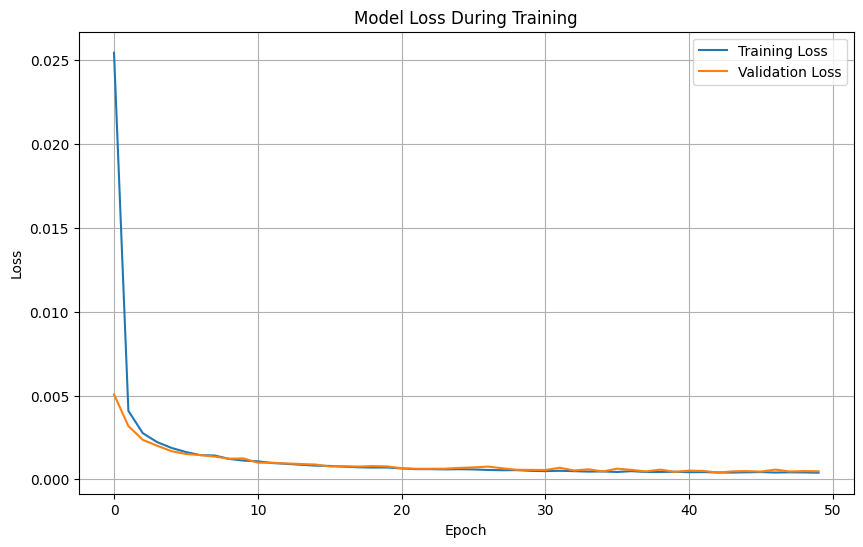

In [72]:
import matplotlib.pyplot as plt

# Get the training and validation loss from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Make Predictions

### Subtask:
Use the trained model to make predictions on future stock movements.

**Reasoning**:
Use the trained Bi-LSTM model to make predictions on the test data.

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


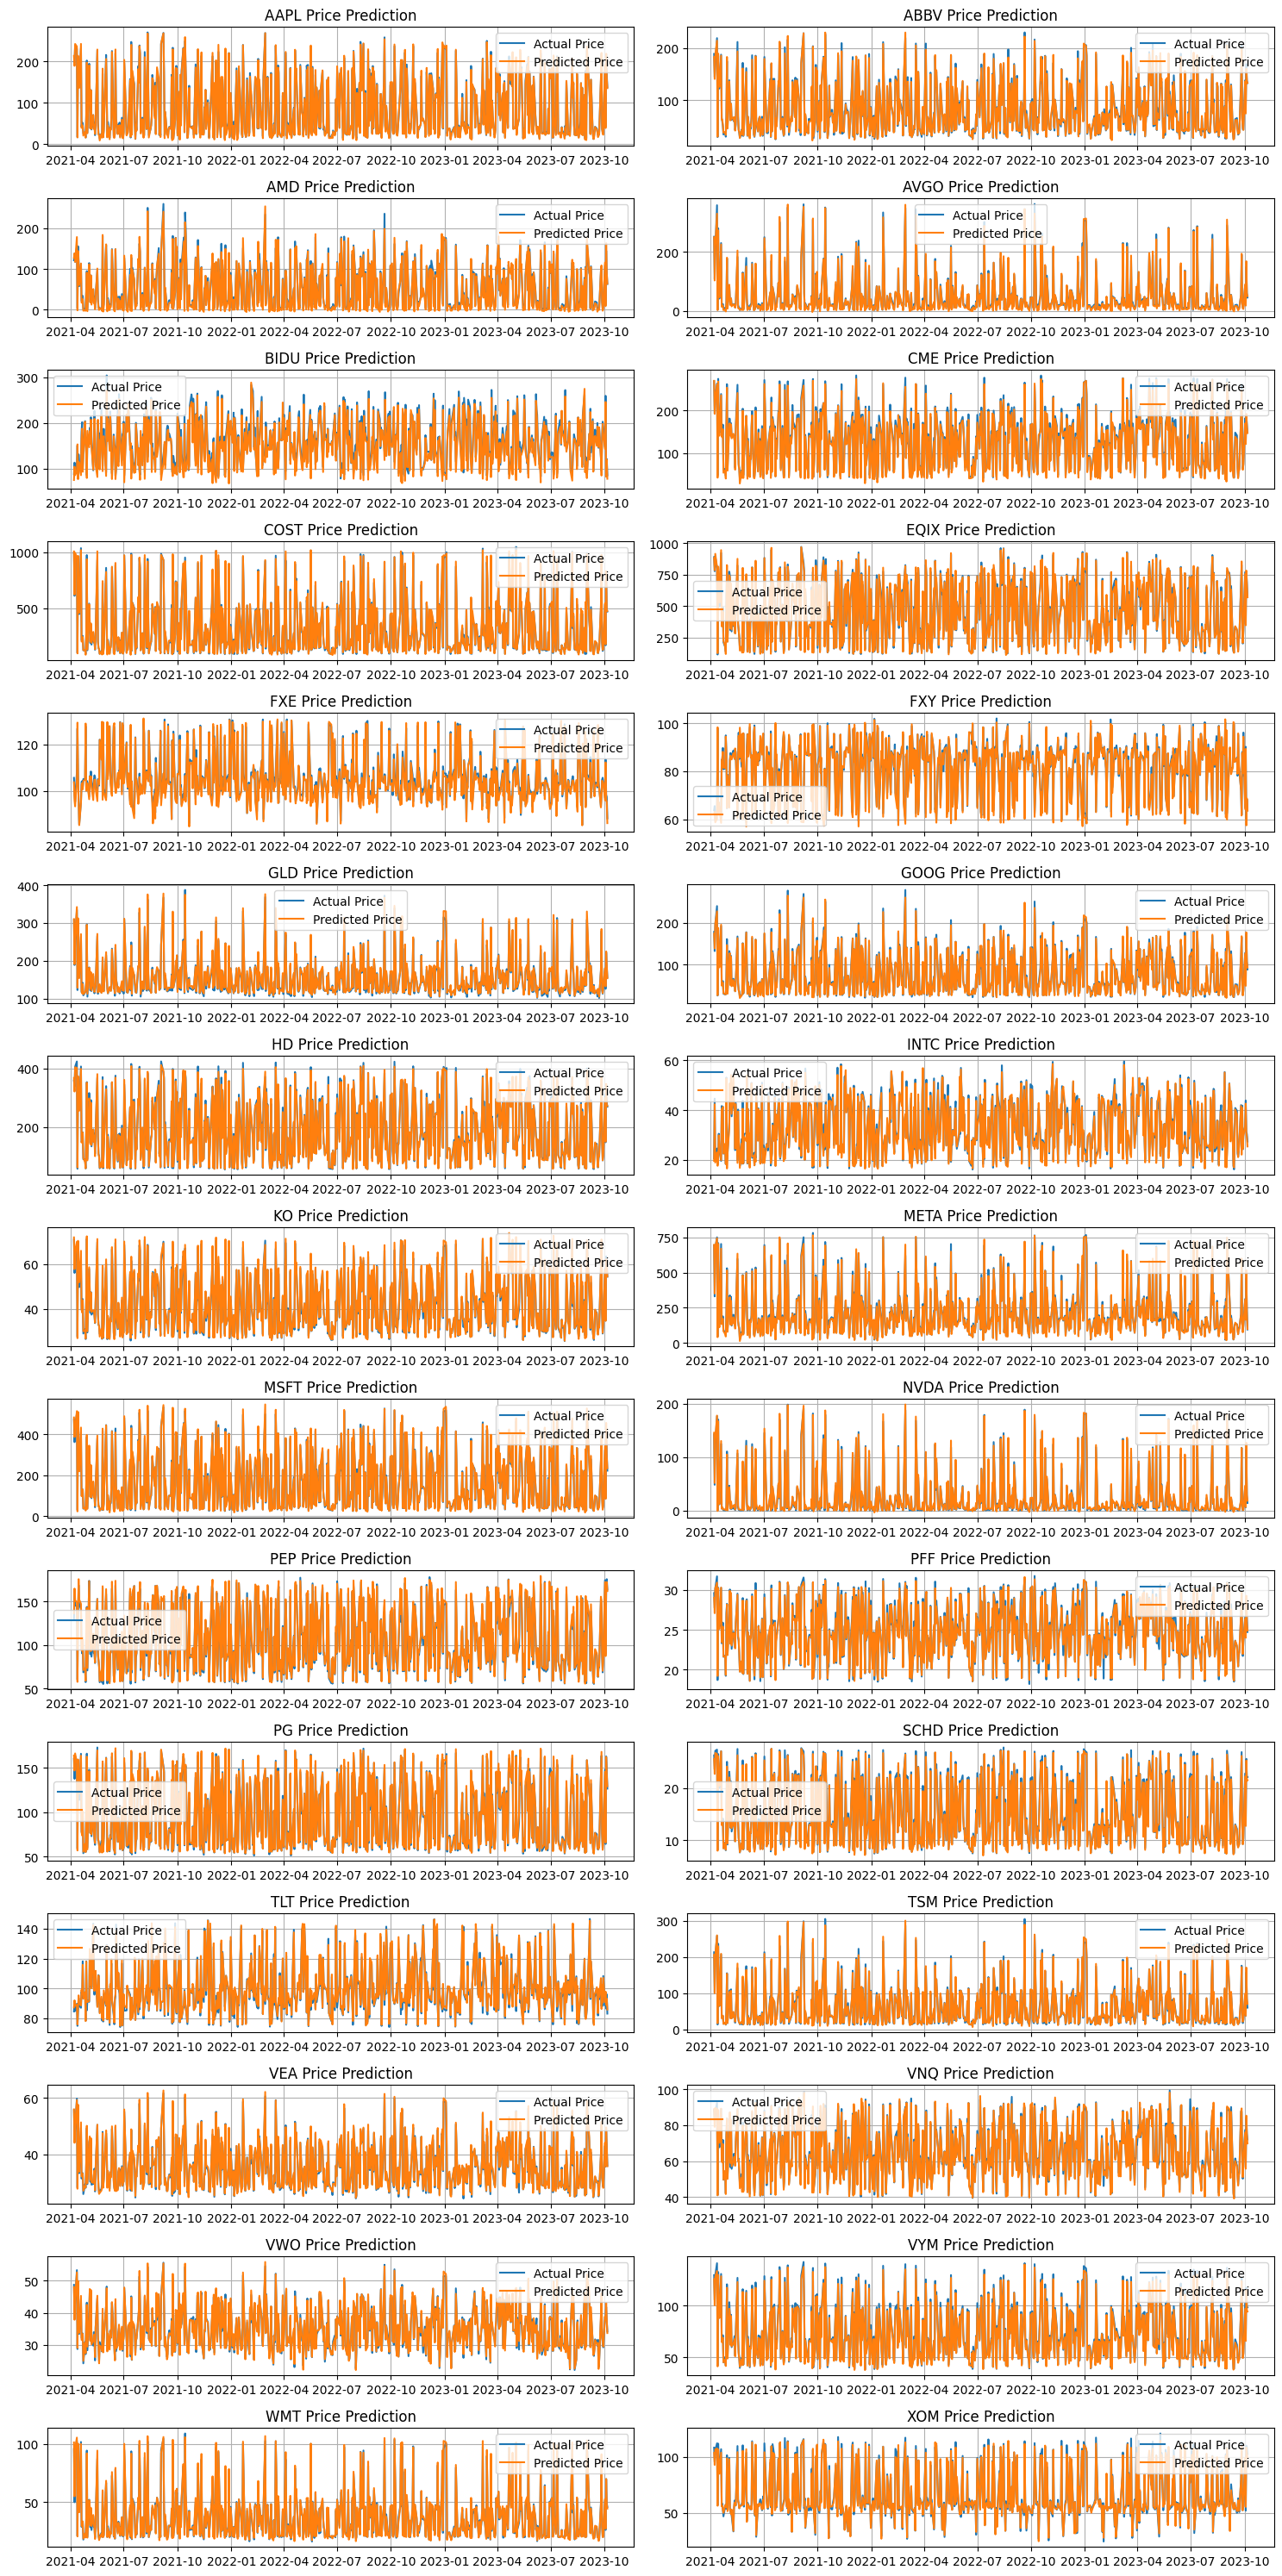

In [74]:
predictions = model.predict(X_test)  # shape (n_samples, n_assets) -- scaled target space

# Inverse transform using the dedicated target_scaler
pred_prices = target_scaler.inverse_transform(predictions)    # predicted prices in original scale
actual_prices = target_scaler.inverse_transform(y_test)       # actual prices (test labels) in original scale

# Asset tickers (exclude SPY)
asset_tickers = list(portfolio_close_data.columns[:pred_prices.shape[1]])

# Determine predicted dates aligned with how sequences were generated
predicted_dates = portfolio_close_data.index[len(X_train) + look_back : len(X_train) + look_back + len(pred_prices)]

# Build DataFrames for plotting
pred_prices_df = pd.DataFrame(pred_prices, index=predicted_dates, columns=asset_tickers)
actual_prices_df = pd.DataFrame(actual_prices, index=predicted_dates, columns=asset_tickers)

# Plot predicted vs actual per asset (example)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 30))
for i, t in enumerate(asset_tickers):
    plt.subplot(len(asset_tickers) // 2 + len(asset_tickers) % 2, 2, i + 1)
    plt.plot(predicted_dates, actual_prices_df[t], label='Actual Price')
    plt.plot(predicted_dates, pred_prices_df[t], label='Predicted Price')
    plt.title(f'{t} Price Prediction')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluate the Model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics (e.g., Mean Squared Error, Mean Absolute Error).

**Reasoning**:
Evaluate the trained Bi-LSTM model using the test data.

In [75]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)

display(f"Test Loss (Mean Squared Error): {loss:.4f}")
display(f"Test Mean Absolute Error: {mae:.4f}")

'Test Loss (Mean Squared Error): 0.0005'

'Test Mean Absolute Error: 0.0159'

In [76]:
import numpy as np
# Quick checks
print("predictions shape:", getattr(predictions, "shape", None))
print("predictions min/max:", np.nanmin(predictions), np.nanmax(predictions))
print("y_train (labels) min/max:", np.nanmin(y_train), np.nanmax(y_train))
print("scaled_data.shape:", scaled_data.shape)
# If scaler has feature names (sklearn>=1.0)
if hasattr(scaler, 'feature_names_in_'):
    print("scaler.features[:20]:", scaler.feature_names_in_[:20])
# show first 20 column names of the features DataFrame that was scaled
try:
    print("portfolio_features_data.columns[:40]:", list(portfolio_features_data.columns)[:40])
except Exception:
    pass

predictions shape: (631, 30)
predictions min/max: -0.0357453 1.0263286
y_train (labels) min/max: 0.0 1.0000000000000002
scaled_data.shape: (3215, 240)
scaler.features[:20]: ['AAPL_Log_Return' 'AAPL_H-L' 'AAPL_O-C' 'AAPL_SMA_20' 'AAPL_EMA_20'
 'AAPL_Lag_1' 'AAPL_Lag_5' 'AAPL_Lag_10' 'ABBV_Log_Return' 'ABBV_H-L'
 'ABBV_O-C' 'ABBV_SMA_20' 'ABBV_EMA_20' 'ABBV_Lag_1' 'ABBV_Lag_5'
 'ABBV_Lag_10' 'AMD_Log_Return' 'AMD_H-L' 'AMD_O-C' 'AMD_SMA_20']
portfolio_features_data.columns[:40]: ['AAPL_Log_Return', 'AAPL_H-L', 'AAPL_O-C', 'AAPL_SMA_20', 'AAPL_EMA_20', 'AAPL_Lag_1', 'AAPL_Lag_5', 'AAPL_Lag_10', 'ABBV_Log_Return', 'ABBV_H-L', 'ABBV_O-C', 'ABBV_SMA_20', 'ABBV_EMA_20', 'ABBV_Lag_1', 'ABBV_Lag_5', 'ABBV_Lag_10', 'AMD_Log_Return', 'AMD_H-L', 'AMD_O-C', 'AMD_SMA_20', 'AMD_EMA_20', 'AMD_Lag_1', 'AMD_Lag_5', 'AMD_Lag_10', 'AVGO_Log_Return', 'AVGO_H-L', 'AVGO_O-C', 'AVGO_SMA_20', 'AVGO_EMA_20', 'AVGO_Lag_1', 'AVGO_Lag_5', 'AVGO_Lag_10', 'BIDU_Log_Return', 'BIDU_H-L', 'BIDU_O-C', 'BIDU_SMA_20', 'BI

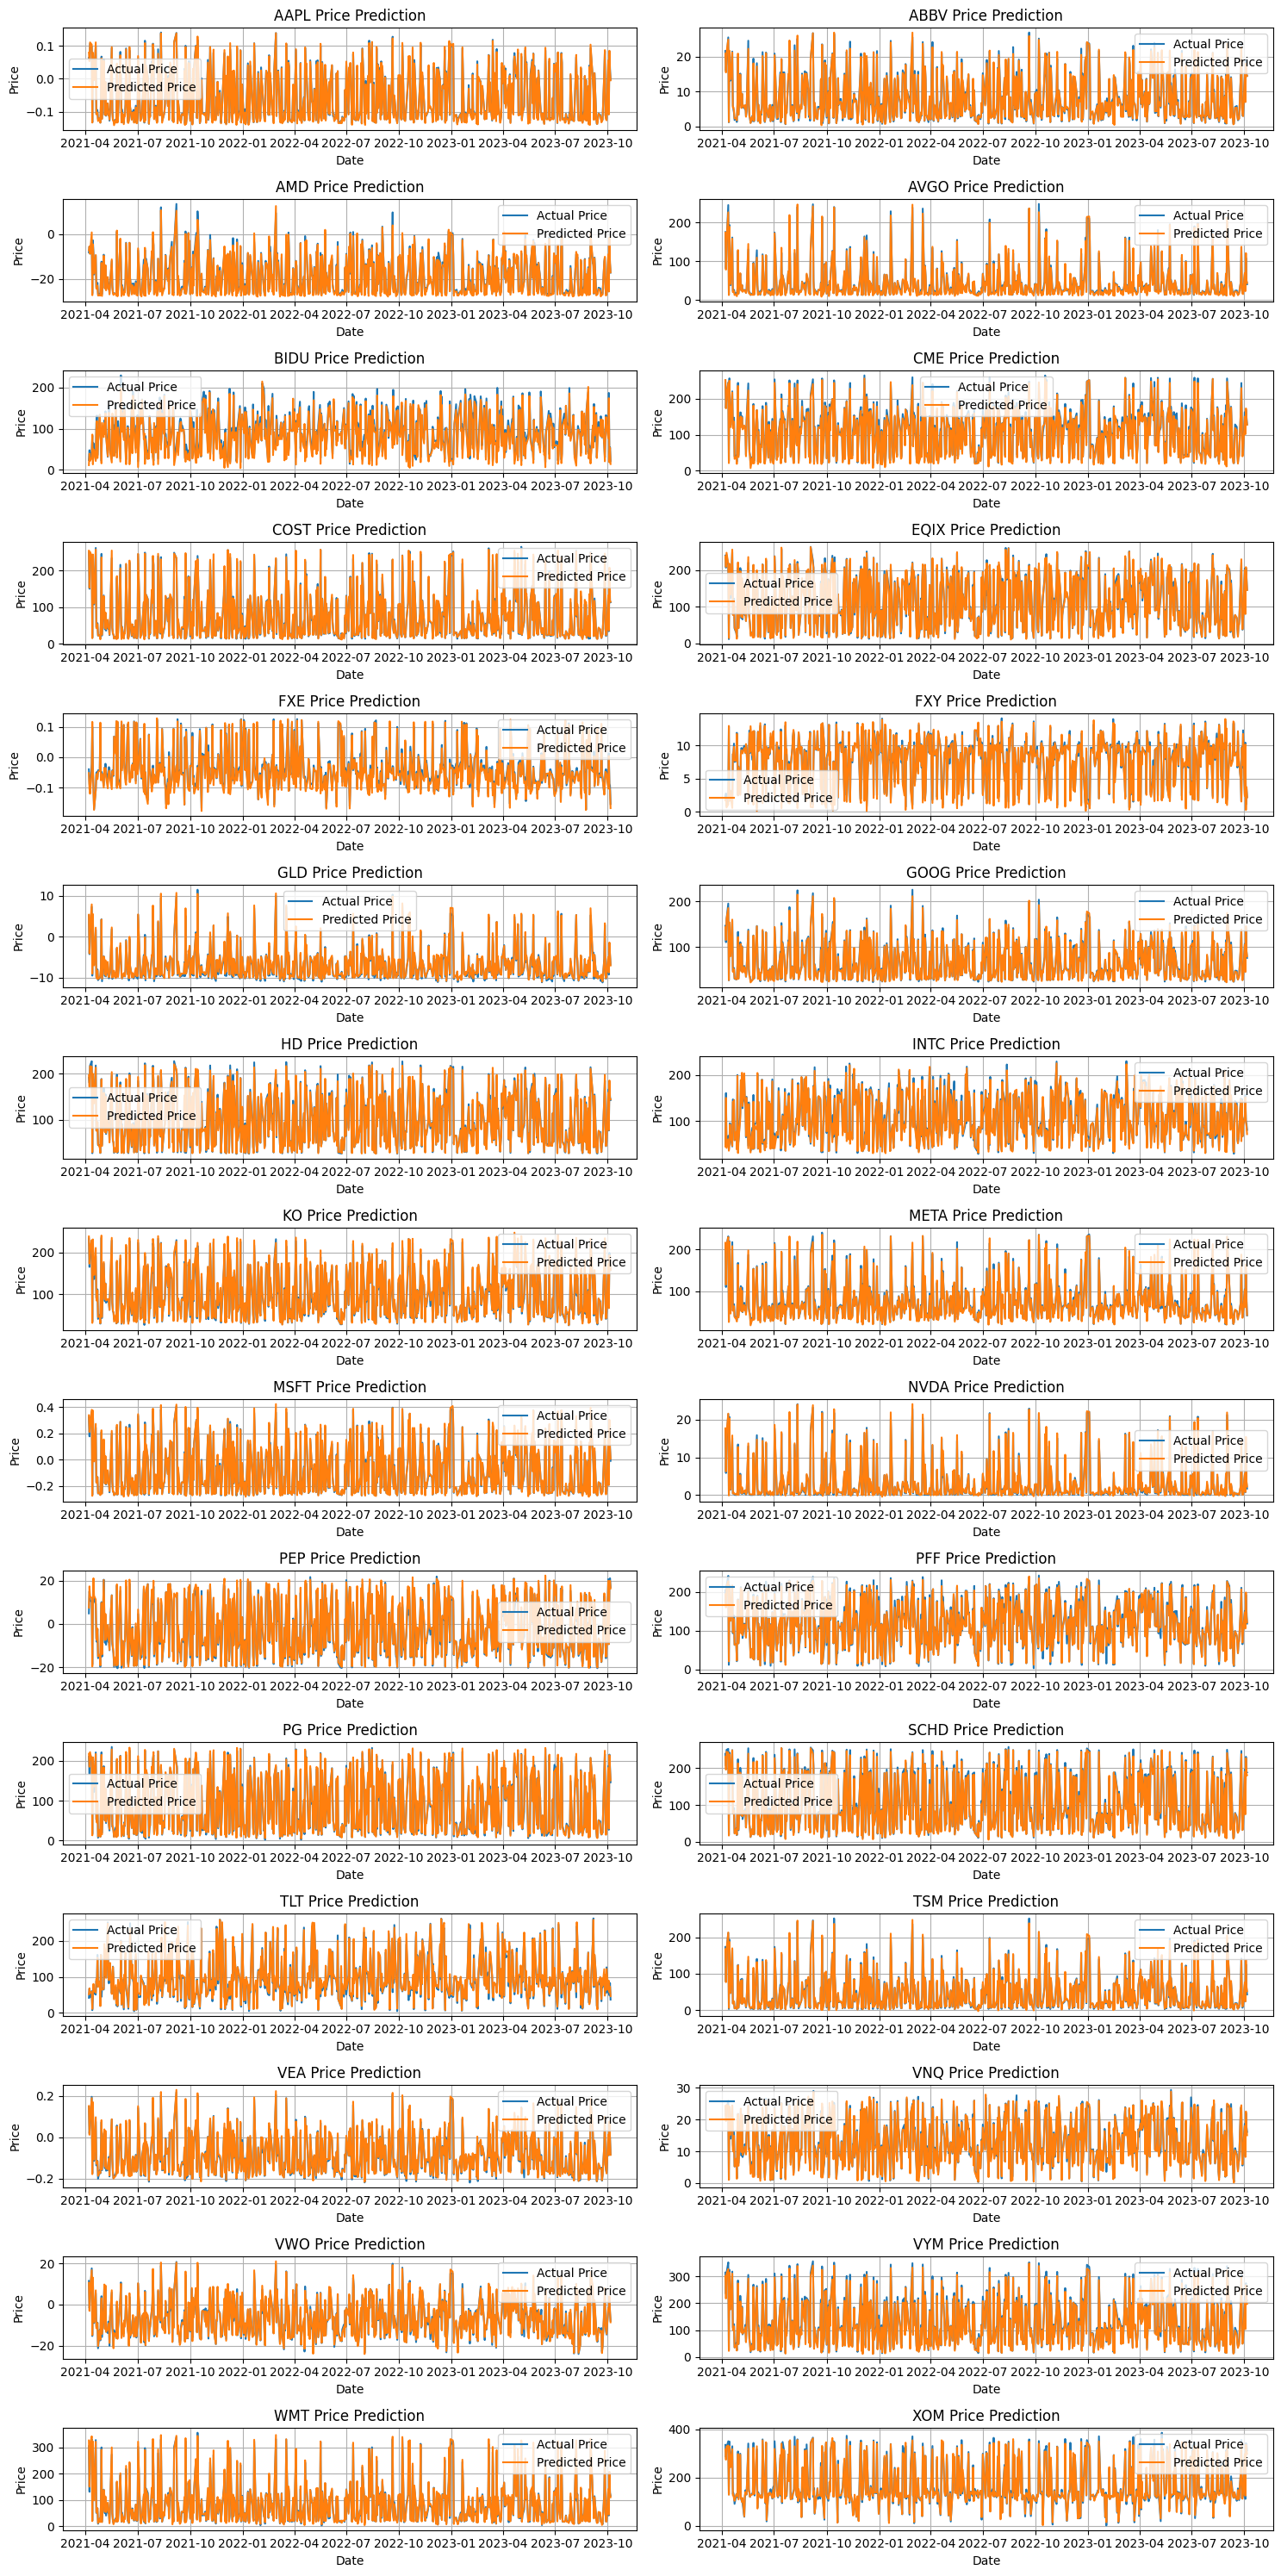

In [78]:
# Inverse transform the scaled predictions and actual values
# We need to create dummy arrays with the same shape as the original scaled_data
# to use the inverse_transform method correctly.
# The number of features in the output is the number of original assets (6).
num_original_features = y_test.shape[1] # Get the number of output features from y_test

dummy_predictions_array = np.zeros((len(predictions), scaled_data.shape[1]))
dummy_predictions_array[:, :num_original_features] = predictions # Assign predictions to the first 'num_original_features' columns
actual_predictions = scaler.inverse_transform(dummy_predictions_array)[:, :num_original_features] # Inverse transform and keep only the original features

dummy_actual_array = np.zeros((len(y_test), scaled_data.shape[1]))
dummy_actual_array[:, :num_original_features] = y_test # Assign actuals to the first 'num_original_features' columns
actual_y_test = scaler.inverse_transform(dummy_actual_array)[:, :num_original_features] # Inverse transform and keep only the original features


# Get the asset tickers (excluding SPY)
asset_tickers = portfolio_close_data.columns[:num_original_features] # Get tickers for the predicted assets

# Get the dates corresponding to the test set predictions
# The test set starts after the training set, and predictions are made for look_back steps ahead.
# The training set size is len(X_train) and look_back is the sequence length.
# The test set size is len(X_test).
# The dates corresponding to the predictions should start from the index len(X_train) + look_back
# in the original portfolio_close_data.index and have a length equal to len(X_test).
predicted_dates = portfolio_close_data.index[len(X_train) + look_back : len(X_train) + look_back + len(X_test)]

# Plot predicted vs. actual values for each asset
plt.figure(figsize=(15, 30))

for i in range(num_original_features): # Iterate through the number of original features
    plt.subplot(num_original_features // 2 + num_original_features % 2, 2, i + 1)
    plt.plot(predicted_dates, actual_y_test[:, i], label='Actual Price')
    plt.plot(predicted_dates, actual_predictions[:, i], label='Predicted Price')
    plt.title(f'{asset_tickers[i]} Price Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Task
Develop a growth and income stock portfolio prototype with a 4% dividend yield using a multivariate Bi-LSTM model for stock prediction and the NSGA-II algorithm for portfolio selection, referencing the paper "https://www.sciencedirect.com/science/article/pii/S2666188825003971". The portfolio should include GOOG, AAPL, a Gold ETF, Bitcoin, US Treasuries, and a REIT, and its performance over the last 10 years should be compared to SPY using yfinance. The prototype should include data preparation with Min-Max scaling, Bi-LSTM model training and evaluation, NSGA-II implementation for portfolio optimization, and calculation and plotting of portfolio dividends, VaR, CVaR, and Sharpe Ratio, as well as VaR and Sharpe Ratio for SPY.

## Define the optimization problem

### Subtask:
Clearly define the objectives (e.g., maximize predicted return, maximize predicted dividend yield, minimize predicted risk - volatility/CVaR) and constraints (e.g., sum of weights equals 1, minimum/maximum allocation per asset) for the portfolio optimization using NSGA-II.


**Reasoning**:
Document the objectives and constraints for the NSGA-II algorithm based on the task description and the referenced paper's likely approach to multi-objective portfolio optimization.



In [79]:
# Objectives for NSGA-II:
# 1. Maximize Predicted Portfolio Return: Based on the price predictions from the Bi-LSTM model.
# 2. Maximize Predicted Portfolio Dividend Yield: Based on the predicted dividends and predicted prices.
# 3. Minimize Predicted Portfolio Risk: This can be measured using predicted portfolio volatility or Conditional Value at Risk (CVaR) calculated from the predicted returns.

# Constraints for NSGA-II:
# 1. Sum of Weights: The sum of the weights of all assets in the portfolio must equal 1. (Σ wi = 1)
# 2. Weight Bounds: Define minimum and maximum allocation percentages for each asset (e.g., 0 <= wi <= 1, or with more specific bounds like 0.05 <= wi <= 0.4).
# 3. Target Dividend Yield (Implicit): The NSGA-II will aim to find solutions on the Pareto front that satisfy the 4% dividend return requirement. This might be handled as a soft constraint or by selecting solutions from the Pareto front that meet this criterion.

print("NSGA-II Objectives:")
print("1. Maximize Predicted Portfolio Return")
print("2. Maximize Predicted Portfolio Dividend Yield")
print("3. Minimize Predicted Portfolio Risk (Volatility/CVaR)")
print("\nNSGA-II Constraints:")
print("1. Sum of Weights = 1")
print("2. Weight Bounds (e.g., 0 <= wi <= 1)")
print("3. Target Dividend Yield (Implicit objective for solution selection)")

NSGA-II Objectives:
1. Maximize Predicted Portfolio Return
2. Maximize Predicted Portfolio Dividend Yield
3. Minimize Predicted Portfolio Risk (Volatility/CVaR)

NSGA-II Constraints:
1. Sum of Weights = 1
2. Weight Bounds (e.g., 0 <= wi <= 1)
3. Target Dividend Yield (Implicit objective for solution selection)


## Prepare input data for nsga-ii

### Subtask:
Prepare the predicted stock movements and dividend information in a format suitable for the NSGA-II algorithm. This might involve using the predictions from the Bi-LSTM model.


In [80]:
# Build predicted_daily_returns DataFrame for NSGA-II (insert before simulation / nsga-ii input)
import numpy as np
import pandas as pd

# Expect these to exist from earlier cells: predictions, scaler, X_test, y_test, portfolio_close_data, X_train, look_back
# Asset tickers for prediction targets
asset_tickers = list(portfolio_close_data.columns[:num_original_features])

# Try to use already inverse-transformed predictions if present
if 'actual_predictions' in globals():
    pred_prices = np.asarray(actual_predictions)  # shape (n_samples, n_assets)
else:
    # Reconstruct inverse transform of predictions -> prices
    if 'predictions' not in globals():
        raise RuntimeError("Cannot construct predicted_daily_returns: 'predictions' not found. Re-run model.predict on X_test.")
    # Build dummy array for inverse_transform similar to earlier cell
    dummy = np.zeros((len(predictions), scaled_data.shape[1]))
    dummy[:, :num_original_features] = predictions
    pred_prices = scaler.inverse_transform(dummy)[:, :num_original_features]

# Determine predicted_dates (should match earlier logic)
if 'predicted_dates' not in globals():
    start_idx = len(X_train) + look_back
    predicted_dates = portfolio_close_data.index[start_idx : start_idx + len(pred_prices)]
else:
    predicted_dates = pd.DatetimeIndex(predicted_dates)

# Previous-day actual close prices aligned to predictions:
start_prev_idx = len(X_train) + look_back - 1
prev_prices_df = portfolio_close_data.iloc[start_prev_idx : start_prev_idx + len(pred_prices)]
if len(prev_prices_df) != len(pred_prices):
    # If mismatch, try aligning by index positions
    prev_prices_df = portfolio_close_data.reindex(predicted_dates).shift(1).loc[predicted_dates]

# Create DataFrames
pred_prices_df = pd.DataFrame(pred_prices, index=predicted_dates, columns=asset_tickers)
prev_prices_df = prev_prices_df.reindex(predicted_dates).fillna(method='ffill').fillna(method='bfill')

# Compute predicted daily returns = predicted_price_t / prev_actual_price_{t} - 1
predicted_daily_returns = (pred_prices_df.values / prev_prices_df.values) - 1.0
predicted_daily_returns = pd.DataFrame(predicted_daily_returns, index=predicted_dates, columns=asset_tickers)

# Clean up potential inf/nan
predicted_daily_returns = predicted_daily_returns.replace([np.inf, -np.inf], np.nan).fillna(0.0)

# Expose for downstream code and NSGA-II
if 'nsga_ii_data' not in globals():
    nsga_ii_data = {}
nsga_ii_data['predicted_returns'] = predicted_daily_returns

print("predicted_daily_returns created:", predicted_daily_returns.shape)
display(predicted_daily_returns.head())

predicted_daily_returns created: (631, 30)


/tmp/ipython-input-3612477914.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prev_prices_df = prev_prices_df.reindex(predicted_dates).fillna(method='ffill').fillna(method='bfill')


AAPL      ABBV       AMD      AVGO      BIDU       CME  \
Date                                                                     
2021-04-07 -0.999361 -0.761767 -1.087372  2.968614 -0.950331  0.477718   
2021-04-08 -0.999578 -0.824696 -1.065700  0.775619 -0.828498  0.024909   
2021-04-09 -0.999145 -0.761940 -1.105745  2.496312 -0.904199  0.215440   
2021-04-12 -0.999186 -0.723381 -0.989842  4.145852 -0.864029  0.422960   
2021-04-13 -1.001017 -0.986129 -1.341009 -0.709931 -0.604948 -0.877905   

                COST      EQIX       FXE       FXY  ...        PG       SCHD  \
Date                                                ...                        
2021-04-07 -0.251497 -0.623023 -1.000488 -0.979950  ...  0.790557   9.996596   
2021-04-08 -0.551969 -0.669683 -1.000971 -0.976657  ...  0.517985   8.338549   
2021-04-09 -0.269470 -0.608836 -1.001125 -0.992471  ...  0.831917  10.585506   
2021-04-12 -0.305029 -0.659095 -1.000433 -0.986974  ...  0.646234  10.449361   
2021-04-13 -0.954786 -0.976914 -0.998914 -0.850053  ... -0.891314  -0.180294   

                 TLT       TSM       VEA       VNQ       VWO       VYM  \
Date                                                                     
2021-04-07 -0.566702  0.510471 -0.996522 -0.694142 -0.767628  2.372093   
2021-04-08 -0.430639 -0.326931 -0.999705 -0.753373 -1.067598  1.438440   
2021-04-09 -0.538275  0.471484 -0.997992 -0.688372 -0.860356  2.465621   
2021-04-12 -0.511006  0.910875 -0.995653 -0.693192 -0.630588  2.653692   
2021-04-13 -0.911568 -0.947212 -1.004034 -0.987164 -1.328637 -0.752537   

                 WMT       XOM  
Date                            
2021-04-07  6.460673  5.682074  
2021-04-08  2.449520  4.843671  
2021-04-09  6.005912  6.025725  
2021-04-12  6.819888  6.155284  
2021-04-13 -0.534686  1.767823  

[5 rows x 30 columns]

**Reasoning**:
Calculate predicted daily returns and align historical dividend data with daily frequency for NSGA-II input.



In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Require predicted_daily_returns created earlier
if 'predicted_daily_returns' not in globals() and 'nsga_ii_data' in globals():
    predicted_daily_returns = nsga_ii_data.get('predicted_returns')

if 'predicted_daily_returns' not in locals() or predicted_daily_returns is None:
    raise RuntimeError("predicted_daily_returns not available. Run prediction / preparation steps first.")

# Simulation params
num_simulations = 1000
num_trading_days_in_future = len(predicted_daily_returns)
rng = np.random.default_rng(42)

# Robust last price selection: prefer the last price before prediction window; fallback to last non-zero close
start_index_prediction_data = len(X_train) + look_back
if start_index_prediction_data - 1 < len(portfolio_close_data):
    last_prices = portfolio_close_data.iloc[start_index_prediction_data - 1].copy()
else:
    last_prices = portfolio_close_data.ffill().bfill().iloc[-1].copy()

# Replace zeros or negatives with a recent valid price per ticker or global median
invalid_price_mask = (last_prices <= 0) | last_prices.isna()
if invalid_price_mask.any():
    recent_valid = portfolio_close_data.replace(0, np.nan).ffill().bfill().iloc[-1]
    last_prices.loc[invalid_price_mask] = recent_valid.loc[invalid_price_mask]
# final fallback: use median of historical non-zero prices
still_invalid = (last_prices <= 0) | last_prices.isna()
if still_invalid.any():
    med = portfolio_close_data.replace(0, np.nan).median()
    last_prices.loc[still_invalid] = med.loc[still_invalid].fillna(1.0)

# Historical log returns (stable)
historical_daily_log_returns_portfolio = np.log1p(daily_returns.drop(columns=['SPY'], errors='ignore')).replace([np.inf, -np.inf], np.nan).dropna(how='all')

predicted_daily_log_returns = np.log1p(predicted_daily_returns).replace([np.inf, -np.inf], np.nan).fillna(0.0)

# Simulate using stable per-asset sigma with caps and epsilon
simulated_log_price_paths = {}
max_sigma = 0.2   # cap daily sigma to 20% (very conservative cap)
min_sigma = 1e-6

for ticker in predicted_daily_log_returns.columns:
    mean_predicted = float(predicted_daily_log_returns[ticker].mean())

    # historical sigma (use robust estimator)
    if ticker in historical_daily_log_returns_portfolio.columns:
        hist_sigma = float(historical_daily_log_returns_portfolio[ticker].std(skipna=True))
    else:
        hist_sigma = np.nan

    if not np.isfinite(hist_sigma) or hist_sigma <= 0:
        # fallback to median of asset sigmas or small epsilon
        hist_sigma = np.nanmedian(historical_daily_log_returns_portfolio.std(skipna=True).values)
        if not np.isfinite(hist_sigma) or hist_sigma <= 0:
            hist_sigma = 0.01

    # enforce bounds
    hist_sigma = float(np.clip(hist_sigma, min_sigma, max_sigma))

    # generate IID normal increments (daily log returns)
    # Use geometric Brownian formulation (drift corrected) to avoid drift explosion:
    # daily increment = mean_predicted + normal(0, hist_sigma)
    random_increments = rng.normal(loc=mean_predicted, scale=hist_sigma, size=(num_trading_days_in_future, num_simulations))

    # starting log price (scalar)
    lp = last_prices.get(ticker, np.nan)
    if not np.isfinite(lp) or lp <= 0:
        lp = 1.0
    log_last_price = np.log(lp)

    # cumulative log price path
    cum_log = log_last_price + np.cumsum(random_increments, axis=0)

    simulated_log_price_paths[ticker] = pd.DataFrame(cum_log, index=predicted_daily_log_returns.index)

# Exponentiate and clean
simulated_price_paths = {}
for ticker, log_df in simulated_log_price_paths.items():
    p = np.exp(log_df)
    # Clip to reasonable bounds and fill NaN/inf
    p = p.clip(lower=1e-6, upper=1e12)
    p = p.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill').fillna(1.0)
    simulated_price_paths[ticker] = p

# Diagnostics
display("Sample of Simulated Price Paths (Head):")
display(pd.DataFrame({t: paths.iloc[:, 0] for t, paths in simulated_price_paths.items()}).head())

average_final_simulated_prices = pd.Series({ticker: paths.iloc[-1].mean() for ticker, paths in simulated_price_paths.items()})
display("\nAverage Final Simulated Prices Across Simulations (Mean of Simulated End Prices):")
display(average_final_simulated_prices)

# Compute mean simulated daily returns across sims (optional)
simulated_daily_returns_all = {ticker: paths.pct_change().dropna() for ticker, paths in simulated_price_paths.items()}
mean_simulated_daily_returns = pd.Series({ticker: returns.values.mean() if not returns.empty else 0.0 for ticker, returns in simulated_daily_returns_all.items()})
display("\nMean Simulated Daily Returns Across Simulations and Time:")
display(mean_simulated_daily_returns)

/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)
/tmp/ipython-input-2726076017.py:85: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  p = p.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill').fillna(1.0)
/tmp/ipython-input-2726076017.py:85: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  p = p.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill').fillna(1.0)
/tmp/ipython-input-2726076017.py:85: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  p = p.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(method='bfill').fillna(1.0)
/tmp/ipytho

'Sample of Simulated Price Paths (Head):'

AAPL      ABBV        AMD       AVGO        BIDU        CME  \
Date                                                                           
2021-04-07  10.304881  3.924958  68.549520  23.489403  111.907985  78.910032   
2021-04-08   0.856596  0.180224  57.600690  12.657547   52.967106  36.675757   
2021-04-09   0.070706  0.008403  48.280982   6.786019   24.870802  16.462874   
2021-04-12   0.006017  0.000389  40.383628   3.547217   11.708810   7.724828   
2021-04-13   0.000503  0.000018  34.484559   1.963484    5.726824   3.595204   

                 COST       EQIX        FXE       FXY  ...         PG  \
Date                                                   ...              
2021-04-07  38.053150  79.412574  26.835100  6.928326  ...  52.375158   
2021-04-08   4.275663   9.663521   6.745304  0.563344  ...  22.524550   
2021-04-09   0.477592   1.204105   1.712423  0.045234  ...   9.728233   
2021-04-12   0.053411   0.148495   0.433977  0.003698  ...   4.126932   
2021-04-13   0.006142   0.018764   0.108821  0.000300  ...   1.794008   

                   SCHD        TLT        TSM       VEA       VNQ        VWO  \
Date                                                                           
2021-04-07    70.783967  87.578798  31.971167  8.347903  9.564773  29.270837   
2021-04-08   240.181312  65.587602   8.302509  1.558069  1.142256  19.053660   
2021-04-09   806.809463  48.760594   2.226480  0.291968  0.138970  12.443012   
2021-04-12  2742.161547  36.879302   0.604348  0.055273  0.016751   8.005865   
2021-04-13  9216.714134  27.638354   0.169270  0.010293  0.001991   5.056061   

                  VYM         WMT          XOM  
Date                                            
2021-04-07  88.028486   52.200449    89.618370  
2021-04-08  86.192295   61.508693   170.669768  
2021-04-09  84.778521   73.883474   320.390936  
2021-04-12  83.980783   89.780955   616.782356  
2021-04-13  83.827702  104.074788  1190.142029  

[5 rows x 30 columns]

'\nAverage Final Simulated Prices Across Simulations (Mean of Simulated End Prices):'

AAPL    1.000000e-06
ABBV    1.000000e-06
AMD     1.000000e-06
AVGO    1.000000e-06
BIDU    1.000000e-06
CME     1.000000e-06
COST    1.000000e-06
EQIX    1.000000e-06
FXE     1.000000e-06
FXY     1.000000e-06
GLD     1.000000e-06
GOOG    1.000000e-06
HD      1.000000e-06
INTC    1.000000e+12
KO      1.000000e+12
META    1.000000e-06
MSFT    1.000000e-06
NVDA    1.000000e-06
PEP     1.000000e-06
PFF     1.000000e+12
PG      1.000000e-06
SCHD    1.000000e+12
TLT     1.000000e-06
TSM     1.000000e-06
VEA     1.000000e-06
VNQ     1.000000e-06
VWO     1.000000e-06
VYM     1.476430e-03
WMT     1.000000e+12
XOM     1.000000e+12
dtype: float64

'\nMean Simulated Daily Returns Across Simulations and Time:'

AAPL   -0.009851
ABBV   -0.007557
AMD    -0.026645
AVGO   -0.020106
BIDU   -0.020792
CME    -0.020225
COST   -0.011265
EQIX   -0.012370
FXE    -0.014948
FXY    -0.009543
GLD    -0.024906
GOOG   -0.019881
HD     -0.016509
INTC    0.058257
KO      0.047182
META   -0.016405
MSFT   -0.009977
NVDA   -0.007512
PEP    -0.016337
PFF     0.073435
PG     -0.019098
SCHD    0.072273
TLT    -0.025205
TSM    -0.015531
VEA    -0.012553
VNQ    -0.010898
VWO    -0.022047
VYM    -0.017301
WMT     0.041224
XOM     0.051521
dtype: float64

In [90]:
nsga_ii_data['average_dividend_yield'] = avg_annual_yield
nsga_ii_data['dividend_payer_mask'] = nsga_ii_data['average_dividend_yield'] > 0


print("nsga_ii_data['average_dividend_yield'] updated using the new daily dividend calculation:")
display(nsga_ii_data['average_dividend_yield'].head())

nsga_ii_data['average_dividend_yield'] updated using the new daily dividend calculation:


AAPL    0.012338
GOOG    0.000414
MSFT    0.016254
NVDA    0.005311
AMD     0.000000
dtype: float64

## Implement the NSGA-II Algorithm

### Subtask:
Set up and configure the NSGA-II algorithm with the defined objectives, constraints, and input data.

**Reasoning**:
Define the NSGA-II problem class for portfolio optimization with objectives and constraints.

In [91]:
from pymoo.core.problem import Problem
import numpy as np

class PortfolioOptimizationProblem(Problem):
    def __init__(self, predicted_returns, average_dividend_yield,
                 dividend_payer_mask=None,
                 allow_shorts=False,
                 target_dividend_yield=0.04,
                 enforce_dividend_constraint=True,
                 dividend_tol=0.005):
        # align inputs
        self.predicted_returns = predicted_returns.copy()
        self.average_dividend_yield = average_dividend_yield.reindex(self.predicted_returns.columns).fillna(0)

        if dividend_payer_mask is None:
            self.dividend_payer_mask = (self.average_dividend_yield > 0)
        else:
            # reindex mask to predicted_returns columns
            self.dividend_payer_mask = dividend_payer_mask.reindex(self.predicted_returns.columns).fillna(False)

        n_var = self.predicted_returns.shape[1]

        # per-asset bounds: dividend payers forced long-only
        xl = np.where(self.dividend_payer_mask.values, 0.0, (-1.0 if allow_shorts else 0.0))
        xu = np.ones(n_var)

        # number of constraints (sum-to-one relaxed + optional dividend constraint)
        n_constr = 2 if enforce_dividend_constraint else 1

        super().__init__(n_var=n_var,
                         n_obj=3,
                         n_constr=n_constr,
                         xl=xl,
                         xu=xu)

        self.num_assets = n_var
        self.target_dividend_yield = float(target_dividend_yield) if target_dividend_yield is not None else None
        self.enforce_dividend_constraint = bool(enforce_dividend_constraint)
        self.dividend_tol = float(dividend_tol)

    def _evaluate(self, x, out, *args, **kwargs):
        # normalize to weights (handle zero rows)
        sum_x = np.sum(x, axis=1, keepdims=True)
        zero_mask = (sum_x.flatten() == 0)
        if zero_mask.any():
            x[zero_mask, :] = 1.0 / self.num_assets
            sum_x = np.sum(x, axis=1, keepdims=True)

        weights = x / sum_x  # shape (n_individuals, n_assets) normalized

        # predicted returns: compute portfolio series for each individual
        # predicted_returns: DataFrame with shape (T, n_assets)
        pr_vals = self.predicted_returns.values  # (T, n_assets)

        # predicted portfolio daily returns per individual: (T, n_individuals) = pr_vals @ weights.T
        pred_port_daily = np.dot(pr_vals, weights.T)

        # objective 1: maximize annualized return (we minimize negative)
        predicted_portfolio_return_daily = np.mean(pred_port_daily, axis=0)
        predicted_portfolio_return_annual = predicted_portfolio_return_daily * 252.0
        f1 = -predicted_portfolio_return_annual

        # objective 2: maximize portfolio dividend yield (annual)
        predicted_portfolio_dividend_yield_annual = np.dot(self.average_dividend_yield.values, weights.T)
        f2 = -predicted_portfolio_dividend_yield_annual.flatten()

        # objective 3: minimize annualized volatility
        predicted_portfolio_volatility_annual = np.std(pred_port_daily, axis=0) * np.sqrt(252.0)
        f3 = predicted_portfolio_volatility_annual

        out["F"] = np.column_stack([f1, f2, f3])

        # constraints g(x) <= 0
        # g1: relax sum(x) == 1 (use absolute error minus tolerance)
        g1 = np.abs(np.sum(x, axis=1) - 1.0) - 1e-2  # relax to 0.01

        if self.enforce_dividend_constraint and (self.target_dividend_yield is not None):
            # g2: target dividend yield - achieved <= tol  => (target - yield) - tol <= 0
            g2 = (self.target_dividend_yield - predicted_portfolio_dividend_yield_annual.reshape(-1)) - self.dividend_tol
            out["G"] = np.column_stack([g1, g2])
        else:
            out["G"] = g1.reshape(-1, 1)
print("PortfolioOptimizationProblem (flexible long/short with dividend-protections) defined.")

PortfolioOptimizationProblem (flexible long/short with dividend-protections) defined.


In [92]:
import numpy as np
import pandas as pd
import yfinance as yf

# Ensure predicted_returns exists
if 'nsga_ii_data' not in globals() or 'predicted_returns' not in nsga_ii_data:
    raise RuntimeError("nsga_ii_data['predicted_returns'] missing. Run the prediction / preparation cells first.")

# Create or recompute average_annual_dividend_yield used by the optimizer
if 'average_dividend_yield' not in nsga_ii_data or nsga_ii_data.get('average_dividend_yield') is None:
    cols = list(nsga_ii_data['predicted_returns'].columns)

    if 'aligned_daily_dividend_data' in globals() and 'close_data' in globals():
        # align and compute annual yields then average across years
        div_df = aligned_daily_dividend_data.reindex(columns=cols).fillna(0)
        close_df = close_data.reindex(div_df.index).fillna(method='ffill').fillna(method='bfill')

        annual_div = div_df.resample('Y').sum()
        annual_close = close_df.resample('Y').mean().replace(0, np.nan)

        annual_yield = annual_div.div(annual_close)
        avg_annual_yield = annual_yield.mean(axis=0).reindex(cols).fillna(0)
        nsga_ii_data['average_dividend_yield'] = avg_annual_yield
    else:
        # Fallback: best-effort TTM yield via yfinance per ticker
        s = pd.Series(0.0, index=cols, dtype=float)
        for t in cols:
            try:
                divs = yf.Ticker(t).dividends.dropna()
                if not divs.empty:
                    ttm = divs.sort_index().iloc[-4:].sum()  # proxy TTM
                    last_price = close_data[t].dropna().iloc[-1] if ('close_data' in globals() and t in close_data.columns) else np.nan
                    s.loc[t] = float(ttm / last_price) if (not np.isnan(last_price) and last_price != 0) else 0.0
                else:
                    s.loc[t] = 0.0
            except Exception:
                s.loc[t] = 0.0
        nsga_ii_data['average_dividend_yield'] = s

# Dividend payer mask (force long-only for payers if used by problem)
nsga_ii_data['dividend_payer_mask'] = nsga_ii_data['average_dividend_yield'] > 0

print("nsga_ii_data keys:", list(nsga_ii_data.keys()))
print("Non-zero dividend payers:", (nsga_ii_data['average_dividend_yield'] != 0).sum())

nsga_ii_data keys: ['predicted_returns', 'average_dividend_yield', 'dividend_payer_mask']
Non-zero dividend payers: 26


## Run the NSGA-II Optimization

### Subtask:
Execute the NSGA-II algorithm to find a set of non-dominated portfolios (the Pareto front).

**Reasoning**:
Instantiate the portfolio optimization problem and run the NSGA-II algorithm from pymoo.

In [93]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.termination import get_termination
from pymoo.optimize import minimize

# Instantiate the problem
# Long-only problem:
problem_long = PortfolioOptimizationProblem(nsga_ii_data['predicted_returns'],
                                            nsga_ii_data['average_dividend_yield'],
                                            dividend_payer_mask=nsga_ii_data['dividend_payer_mask'],
                                            allow_shorts=False)
problem = problem_long
# Configure the NSGA-II algorithm
algorithm = NSGA2(
    pop_size=100,            # Population size
    eliminate_duplicates=True
)

# Define termination criteria
termination = get_termination("n_gen", 1000) # Terminate after 1000 generations

# Run the optimization
res = minimize(problem,
               algorithm,
               termination,
               seed=42,       # for reproducibility
               verbose=True)

# Quick debug (run in your notebook right after minimize)
import numpy as np
import pandas as pd

print("res object:", res)
print("res.X is None?", res.X is None)

# Try to extract final population (algorithm/pop) and constraint violations
pop = None
if hasattr(res, 'pop') and res.pop is not None:
    pop = res.pop
elif hasattr(res, 'algorithm') and getattr(res.algorithm, 'pop', None) is not None:
    pop = res.algorithm.pop

if pop is None:
    print("No population object available on result. Inspect res/algorithm manually.")
else:
    Xpop = pop.get("X")
    Fpop = pop.get("F")
    Gpop = pop.get("G")  # constraint matrix g(x) (shape: n_individuals x n_constr)
    print("Population size:", len(Xpop))
    if Gpop is not None:
        feasible_mask = np.all(Gpop <= 0, axis=1)
        print("Feasible individuals:", feasible_mask.sum(), " / ", len(feasible_mask))
        # show worst constraint violations for top offenders
        cv = Gpop.max(axis=1)
        df = pd.DataFrame({"max_constraint_violation": cv, "feasible": feasible_mask})
        display(df.sort_values("max_constraint_violation", ascending=False).head(10))
    else:
        print("No constraint information (G) in population.")

# The result object contains the optimal solutions and their objective values
display("Optimization Result:")
display(res)

# Extract the non-dominated solutions (Pareto front)
# These are the portfolios that are not worse than any other portfolio in all objectives
# and strictly better in at least one objective.
pareto_front_solutions = res.X
pareto_front_objectives = res.F

display("\nShape of Pareto Front Solutions (Portfolio Weights):")
display(pareto_front_solutions.shape)
display("\nShape of Pareto Front Objectives (Negative Return, Negative Dividend Yield, Volatility):")
display(pareto_front_objectives.shape)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      1 |  9.5336377840 |  1.399650E+01 |             - |             -
     2 |      200 |      1 |  9.4754723569 |  1.241222E+01 |             - |             -
     3 |      300 |      1 |  9.4044816268 |  1.141102E+01 |             - |             -
     4 |      400 |      1 |  8.1755777814 |  1.050433E+01 |             - |             -
     5 |      500 |      1 |  5.9795758566 |  9.5563359830 |             - |             -
     6 |      600 |      1 |  5.9795758566 |  8.7103613085 |             - |             -
     7 |      700 |      1 |  5.9795758566 |  7.8339859170 |             - |             -
     8 |      800 |      1 |  5.6147844725 |  7.1357790488 |             - |             -
     9 |      900 |      1 |  3.8966972915 |  6.4519035152 |             - |             -
    10 |     1000 |      1 |  3.8966972915 |  5.8316350200 |             - |             -

max_constraint_violation  feasible
1                  -0.000024      True
38                 -0.000042      True
78                 -0.000043      True
20                 -0.000066      True
22                 -0.000150      True
26                 -0.000253      True
90                 -0.000292      True
8                  -0.000361      True
49                 -0.000438      True
64                 -0.000602      True

'Optimization Result:'

'\nShape of Pareto Front Solutions (Portfolio Weights):'

(100, 30)

'\nShape of Pareto Front Objectives (Negative Return, Negative Dividend Yield, Volatility):'

(100, 3)

In [95]:
import yfinance as yf
import numpy as np
import pandas as pd

# Ensure nsga_ii_data is available and contains 'average_dividend_yield'
if 'nsga_ii_data' not in globals() or 'average_dividend_yield' not in nsga_ii_data:
    print("nsga_ii_data or 'average_dividend_yield' not found. Please ensure relevant previous cells have been run.")
else:
    print("nsga_ii_data['average_dividend_yield'] sample (from the updated calculation):")
    print(type(nsga_ii_data['average_dividend_yield']))
    display(nsga_ii_data['average_dividend_yield'].head())

    # Show result for CME specifically
    print("\nFinal values for CME:")
    print("nsga_ii_data['average_dividend_yield']['CME']:", nsga_ii_data['average_dividend_yield'].get('CME', np.nan))

    print("\nNon-zero count:", (nsga_ii_data['average_dividend_yield'].fillna(0) != 0).sum())
    print("Missing count:", nsga_ii_data['average_dividend_yield'].isna().sum())

nsga_ii_data['average_dividend_yield'] sample (from the updated calculation):
<class 'pandas.core.series.Series'>


AAPL    0.012338
GOOG    0.000414
MSFT    0.016254
NVDA    0.005311
AMD     0.000000
dtype: float64


Final values for CME:
nsga_ii_data['average_dividend_yield']['CME']: 0.050645488611692685

Non-zero count: 26
Missing count: 0


In [96]:
# diagnostic printout of the final series
print("\nDiagnostic printout of nsga_ii_data['average_dividend_yield']")
s = nsga_ii_data.get('average_dividend_yield')
print("type:", type(s))
print("shape / len:", getattr(s, 'shape', len(s)))
print("index (first 40):", list(s.index)[:40])
print("\nhead (first 20):")
print(s.head(20))
print("\ntail (last 20):")
print(s.tail(20))
print("\nCME lookup via .get / .loc:")
print("s.get('CME') ->", s.get('CME') if hasattr(s, 'get') else None)
try:
    print("s.loc['CME'] ->", s.loc['CME'])
except Exception as e:
    print("loc error:", e)
print("\nnon-zero count:", (s.fillna(0) != 0).sum())
print("missing count:", s.isna().sum())
# show tickers with non-zero yields
print("\nTickers with non-zero yield (sample 40):")
print(s[s != 0].sort_values(ascending=False).head(40))


Diagnostic printout of nsga_ii_data['average_dividend_yield']
type: <class 'pandas.core.series.Series'>
shape / len: (30,)
index (first 40): ['AAPL', 'GOOG', 'MSFT', 'NVDA', 'AMD', 'INTC', 'META', 'BIDU', 'TSM', 'COST', 'PG', 'KO', 'PEP', 'CME', 'AVGO', 'WMT', 'ABBV', 'HD', 'XOM', 'SCHD', 'VYM', 'PFF', 'VWO', 'VEA', 'GLD', 'FXY', 'FXE', 'VNQ', 'EQIX', 'TLT']

head (first 20):
AAPL    0.012338
GOOG    0.000414
MSFT    0.016254
NVDA    0.005311
AMD     0.000000
INTC    0.029240
META    0.000458
BIDU    0.000000
TSM     0.028100
COST    0.019209
PG      0.032123
KO      0.035772
PEP     0.033681
CME     0.050645
AVGO    0.023980
WMT     0.021261
ABBV    0.045350
HD      0.023952
XOM     0.052127
SCHD    0.036393
dtype: float64

tail (last 20):
PG      0.032123
KO      0.035772
PEP     0.033681
CME     0.050645
AVGO    0.023980
WMT     0.021261
ABBV    0.045350
HD      0.023952
XOM     0.052127
SCHD    0.036393
VYM     0.034854
PFF     0.083781
VWO     0.032870
VEA     0.034754
GLD     0.

In [97]:
# debug dividend yield constraint feasibility
import numpy as np
# Inspect the per-asset average annual dividend yields you feed into the problem
print("average_annual_dividend_yield - summary:")
print(nsga_ii_data['average_dividend_yield'].describe())

# Show top dividend payers
print("\nTop dividend payers (annual yield as fraction):")
display(nsga_ii_data['average_dividend_yield'].sort_values(ascending=False).head(20))

# Long-only theoretical max portfolio dividend yield (sum weights = 1 => max = max single-asset yield)
max_yield = float(nsga_ii_data['average_dividend_yield'].max())
print(f"\nTheoretical maximum long-only portfolio yield (single-asset max): {max_yield:.4f} ({max_yield*100:.2f}%)")

# If you allow shorts, check feasible envelope under your bounds:
# for simple bounds 0<=w<=1, max still equals max single asset; if you use custom bounds this changes.

# If max_yield < your target -> constraint is infeasible
target = problem_long.target_dividend_yield if 'problem_long' in globals() else 0.04
print(f"Current dividend target: {target:.4f} ({target*100:.2f}%)")
if max_yield < target:
    print("=> Target greater than any single asset yield. Long-only constraint is infeasible. Lower target or remove constraint.")

average_annual_dividend_yield - summary:
count    30.000000
mean      0.025395
std       0.019821
min       0.000000
25%       0.007067
50%       0.026040
75%       0.034829
max       0.083781
dtype: float64

Top dividend payers (annual yield as fraction):


PFF     0.083781
XOM     0.052127
CME     0.050645
VNQ     0.049364
ABBV    0.045350
SCHD    0.036393
KO      0.035772
VYM     0.034854
VEA     0.034754
PEP     0.033681
VWO     0.032870
PG      0.032123
TLT     0.032077
INTC    0.029240
TSM     0.028100
AVGO    0.023980
HD      0.023952
EQIX    0.023871
WMT     0.021261
COST    0.019209
dtype: float64


Theoretical maximum long-only portfolio yield (single-asset max): 0.0838 (8.38%)
Current dividend target: 0.0400 (4.00%)


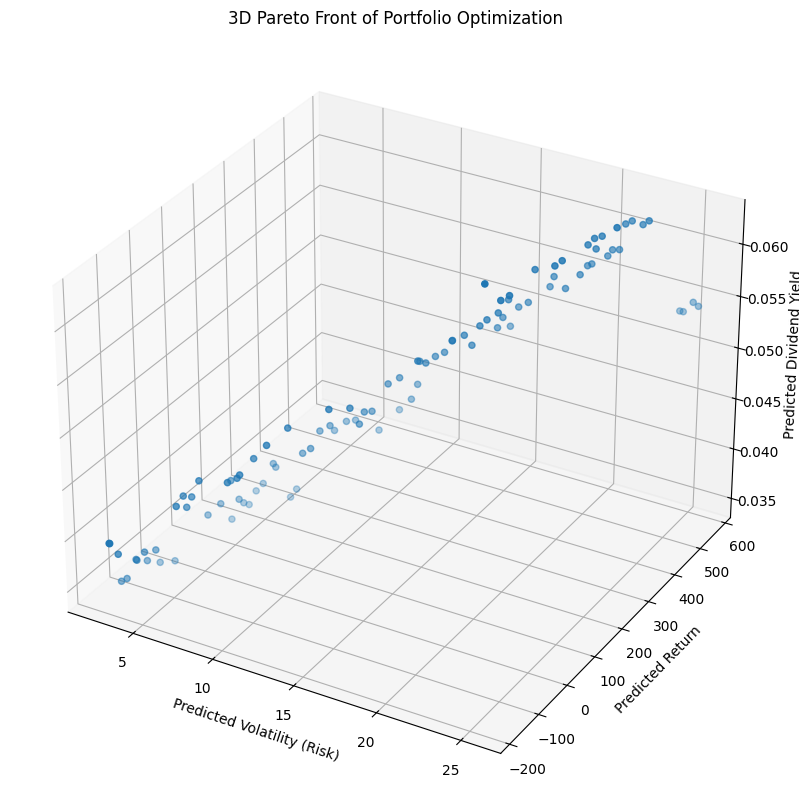

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the objective values from the Pareto front
# Objectives are: Negative Return, Negative Dividend Yield, Volatility
predicted_returns_pf = -pareto_front_objectives[:, 0]
predicted_dividend_yields_pf = -pareto_front_objectives[:, 1]
predicted_volatility_pf = pareto_front_objectives[:, 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(predicted_volatility_pf, predicted_returns_pf, predicted_dividend_yields_pf)

ax.set_xlabel('Predicted Volatility (Risk)')
ax.set_ylabel('Predicted Return')
ax.set_zlabel('Predicted Dividend Yield')
ax.set_title('3D Pareto Front of Portfolio Optimization')

plt.show()

In [99]:
# Create a DataFrame for Pareto front objective values
# Remember objectives are: Negative Return, Negative Dividend Yield, Volatility
pareto_front_objectives_df = pd.DataFrame(pareto_front_objectives, columns=['-Predicted Return', '-Predicted Dividend Yield', 'Predicted Volatility'])

# Add the actual predicted return and dividend yield (positive values)
pareto_front_objectives_df['Predicted Return'] = -pareto_front_objectives_df['-Predicted Return']
pareto_front_objectives_df['Predicted Dividend Yield'] = -pareto_front_objectives_df['-Predicted Dividend Yield']

# Drop the negative objective columns if you prefer to see only positive values
pareto_front_objectives_df = pareto_front_objectives_df.drop(columns=['-Predicted Return', '-Predicted Dividend Yield'])

display("Pareto Front Objective Values:")
display(pareto_front_objectives_df.head())
display(pareto_front_objectives_df.tail())

# Create a DataFrame for Pareto front solutions (portfolio weights)
# We need to get the asset tickers to label the columns
asset_tickers = portfolio_close_data.columns

pareto_front_solutions_df = pd.DataFrame(pareto_front_solutions, columns=asset_tickers)

display("\nPareto Front Portfolio Weights:")
display(pareto_front_solutions_df.head())
display(pareto_front_solutions_df.tail())

'Pareto Front Objective Values:'

Predicted Volatility  Predicted Return  Predicted Dividend Yield
0              2.529203       -176.164781                  0.039250
1              2.756642       -154.078663                  0.035024
2             25.637214        566.921550                  0.054586
3             21.822189        489.125377                  0.062235
4             13.000518        235.657502                  0.049962

Predicted Volatility  Predicted Return  Predicted Dividend Yield
95             16.386494        323.269359                  0.054375
96             21.367163        503.446502                  0.059636
97             20.524574        479.364935                  0.058481
98             17.100780        363.488875                  0.054558
99             17.143064        344.124724                  0.055458

'\nPareto Front Portfolio Weights:'

Ticker      AAPL      ABBV       AMD      AVGO      BIDU       CME      COST  \
0       0.007721  0.139733  0.001481  0.000555  0.018336  0.100987  0.001519   
1       0.058523  0.072774  0.000072  0.000403  0.048652  0.009308  0.003430   
2       0.007462  0.000601  0.001287  0.001494  0.000390  0.012339  0.004501   
3       0.003172  0.019665  0.000431  0.001405  0.002308  0.012999  0.006374   
4       0.003572  0.000055  0.003795  0.001454  0.014415  0.128817  0.000490   

Ticker      EQIX       FXE       FXY  ...        PG      SCHD       TLT  \
0       0.116871  0.000443  0.004635  ...  0.003590  0.000053  0.050738   
1       0.116417  0.001425  0.000685  ...  0.002769  0.000830  0.078032   
2       0.002478  0.000411  0.001349  ...  0.002381  0.154367  0.047110   
3       0.004437  0.000077  0.001803  ...  0.002428  0.000595  0.008089   
4       0.002839  0.000070  0.000426  ...  0.003656  0.000230  0.046055   

Ticker       TSM       VEA       VNQ       VWO       VYM       WMT       XOM  
0       0.000048  0.178286  0.264031  0.005084  0.057457  0.000585  0.006488  
1       0.001244  0.142327  0.271468  0.009754  0.094480  0.000889  0.025558  
2       0.000214  0.018710  0.001029  0.001862  0.082247  0.002258  0.102695  
3       0.000100  0.033265  0.002856  0.004220  0.082881  0.005208  0.200326  
4       0.000706  0.064067  0.128895  0.010039  0.077866  0.003775  0.126809  

[5 rows x 30 columns]

Ticker      AAPL      ABBV       AMD      AVGO      BIDU       CME      COST  \
95      0.004315  0.008825  0.001181  0.000100  0.006890  0.005636  0.000872   
96      0.007399  0.002876  0.000657  0.000333  0.002296  0.017608  0.002726   
97      0.004064  0.001035  0.001181  0.000175  0.007059  0.005636  0.002762   
98      0.005890  0.109408  0.004852  0.000352  0.002184  0.012859  0.002569   
99      0.009362  0.077469  0.001287  0.001494  0.000390  0.014753  0.004501   

Ticker      EQIX       FXE       FXY  ...        PG      SCHD       TLT  \
95      0.002102  0.000338  0.003157  ...  0.004453  0.000024  0.053951   
96      0.003523  0.000161  0.030794  ...  0.002232  0.000820  0.049891   
97      0.002102  0.000338  0.003157  ...  0.002768  0.000026  0.050583   
98      0.004475  0.000873  0.001762  ...  0.002411  0.000763  0.043696   
99      0.002478  0.000403  0.001347  ...  0.002732  0.000163  0.047110   

Ticker       TSM       VEA       VNQ       VWO       VYM       WMT       XOM  
95      0.000080  0.040771  0.139704  0.009646  0.083322  0.001266  0.102367  
96      0.000044  0.036727  0.003866  0.001948  0.052249  0.005144  0.130481  
97      0.000041  0.040712  0.001442  0.008938  0.082700  0.001317  0.150395  
98      0.014593  0.066664  0.001276  0.001909  0.055689  0.000384  0.110654  
99      0.000214  0.132908  0.001029  0.001862  0.083255  0.002247  0.109955  

[5 rows x 30 columns]

In [100]:
# Filter Pareto front objectives for predicted dividend yield > 0.04
high_dividend_portfolios = pareto_front_objectives_df[pareto_front_objectives_df['Predicted Dividend Yield'] > 0.0001]

display("Pareto Front Portfolios with Predicted Dividend Yield > 0.0001:")
display(high_dividend_portfolios)

'Pareto Front Portfolios with Predicted Dividend Yield > 0.0001:'

Predicted Volatility  Predicted Return  Predicted Dividend Yield
0               2.529203       -176.164781                  0.039250
1               2.756642       -154.078663                  0.035024
2              25.637214        566.921550                  0.054586
3              21.822189        489.125377                  0.062235
4              13.000518        235.657502                  0.049962
..                   ...               ...                       ...
95             16.386494        323.269359                  0.054375
96             21.367163        503.446502                  0.059636
97             20.524574        479.364935                  0.058481
98             17.100780        363.488875                  0.054558
99             17.143064        344.124724                  0.055458

[100 rows x 3 columns]

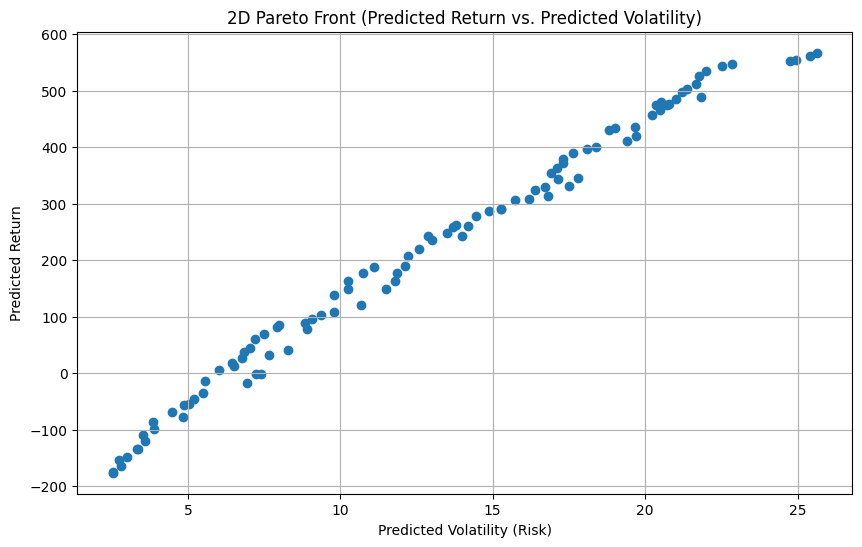

In [101]:
import matplotlib.pyplot as plt

# Extract Predicted Volatility and Predicted Return from the DataFrame
predicted_volatility_pf = pareto_front_objectives_df['Predicted Volatility']
predicted_returns_pf = pareto_front_objectives_df['Predicted Return']

# Create a 2D scatter plot of the Pareto front (Return vs. Volatility)
plt.figure(figsize=(10, 6))
plt.scatter(predicted_volatility_pf, predicted_returns_pf)

plt.title('2D Pareto Front (Predicted Return vs. Predicted Volatility)')
plt.xlabel('Predicted Volatility (Risk)')
plt.ylabel('Predicted Return')
plt.grid(True)
plt.show()

In [102]:
display(pareto_front_objectives_df.head())

Predicted Volatility  Predicted Return  Predicted Dividend Yield
0              2.529203       -176.164781                  0.039250
1              2.756642       -154.078663                  0.035024
2             25.637214        566.921550                  0.054586
3             21.822189        489.125377                  0.062235
4             13.000518        235.657502                  0.049962

In [103]:
# Sort the pareto_front_objectives_df by 'Predicted Volatility' in ascending order
pareto_front_objectives_df_sorted_by_volatility = pareto_front_objectives_df.sort_values(by='Predicted Volatility', ascending=True)

display("Pareto Front Objective Values Sorted by Least Volatility:")
display(pareto_front_objectives_df_sorted_by_volatility.head())
display(pareto_front_objectives_df_sorted_by_volatility.tail())

'Pareto Front Objective Values Sorted by Least Volatility:'

Predicted Volatility  Predicted Return  Predicted Dividend Yield
0               2.529203       -176.164781                  0.039250
48              2.541964       -175.172504                  0.039207
1               2.756642       -154.078663                  0.035024
20              2.815088       -163.548539                  0.037986
26              2.995459       -148.026524                  0.035253

Predicted Volatility  Predicted Return  Predicted Dividend Yield
5              22.832454        546.507086                  0.062030
7              24.750591        552.537340                  0.054090
59             24.933438        554.326324                  0.054061
55             25.393641        561.866284                  0.054983
2              25.637214        566.921550                  0.054586

## Evaluate Selected Portfolio

### Subtask:
Evaluate the performance of the selected portfolio using historical data and compare it with the benchmark (SPY) and the equal-weighted portfolio.

**Reasoning**:
Retrieve the weights of the selected portfolio, calculate its historical returns and performance metrics, and compare with SPY.

'Historical Cumulative Returns of Selected Portfolio:'

Date
2025-11-03    3.325183
2025-11-04    3.333535
2025-11-05    3.334764
2025-11-06    3.337846
2025-11-07    3.372157
dtype: float64

'\nSelected Portfolio Historical Annualized Volatility: 0.1476'

'Selected Portfolio Historical Sharpe Ratio: 0.8538'

'Selected Portfolio Historical VaR (95% confidence): 0.0132'

'Selected Portfolio Historical CVaR (95% confidence): 0.0216'

'Selected Portfolio Historical VaR (99% confidence): 0.0236'

'Selected Portfolio Historical CVaR (99% confidence): 0.0388'

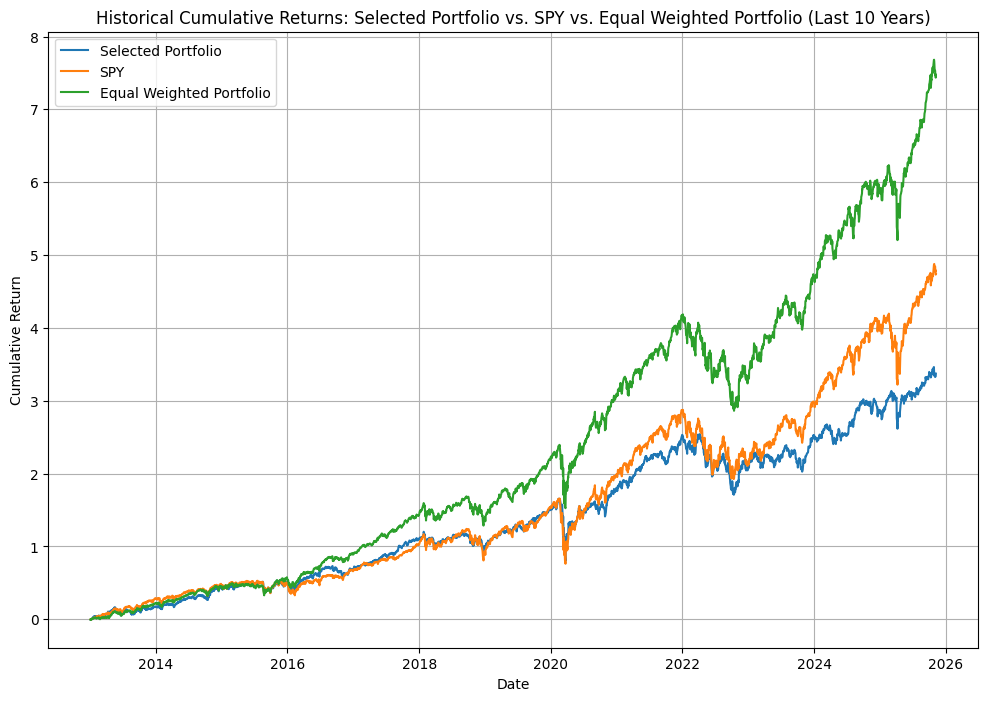

'\nSelected Portfolio Historical Cumulative Dividends Paid (Daily):'

Date
2025-11-03    52.136509
2025-11-04    52.156784
2025-11-05    52.177060
2025-11-06    52.197335
2025-11-07    52.217610
dtype: float64

'\nSelected Portfolio Total Historical Dividends Paid: 52.2176'

In [104]:
# Select the portfolio weights for the portfolio at index 0
# The previous error occurred because we were selecting from the objectives DataFrame.
# We need to select the weights from the DataFrame that contains the portfolio compositions (pareto_front_solutions_df).
# Let's use the index of the portfolio with the least predicted volatility from the sorted objectives DataFrame
least_volatile_portfolio_index = pareto_front_objectives_df_sorted_by_volatility.index[0]
selected_portfolio_weights = pareto_front_solutions_df.loc[least_volatile_portfolio_index]


# Ensure weights are normalized to sum to 1, although NSGA-II should handle this
selected_portfolio_weights = selected_portfolio_weights / selected_portfolio_weights.sum()

# Exclude SPY from historical daily returns for portfolio calculation
portfolio_historical_daily_returns = daily_returns.drop(columns=['SPY'])

# Calculate the historical daily returns of the selected portfolio
# We need to align the historical daily returns with the portfolio weights by asset
# and then calculate the weighted average daily return for the portfolio.
# Ensure the order of columns in portfolio_historical_daily_returns matches the order of weights
# The index of selected_portfolio_weights now contains the asset tickers, which should match
portfolio_historical_daily_returns_selected = portfolio_historical_daily_returns[selected_portfolio_weights.index]


selected_portfolio_historical_returns = (portfolio_historical_daily_returns_selected * selected_portfolio_weights).sum(axis=1)

# Calculate historical cumulative returns of the selected portfolio
selected_portfolio_historical_cumulative_returns = (1 + selected_portfolio_historical_returns).cumprod() - 1

display("Historical Cumulative Returns of Selected Portfolio:")
display(selected_portfolio_historical_cumulative_returns.tail())

# Calculate historical performance metrics for the selected portfolio
# Annualized Volatility
selected_portfolio_historical_volatility = selected_portfolio_historical_returns.std() * np.sqrt(252)

# Sharpe Ratio (assuming risk-free rate is 0)
selected_portfolio_historical_sharpe_ratio = selected_portfolio_historical_returns.mean() / selected_portfolio_historical_returns.std() * np.sqrt(252)

# Historical VaR (95% and 99%)
selected_portfolio_historical_VaR_95 = -np.percentile(selected_portfolio_historical_returns, 100 * (1 - 0.95))
selected_portfolio_historical_VaR_99 = -np.percentile(selected_portfolio_historical_returns, 100 * (1 - 0.99))

# Historical CVaR (95% and 99%)
selected_portfolio_historical_CVaR_95 = -selected_portfolio_historical_returns[selected_portfolio_historical_returns < -selected_portfolio_historical_VaR_95].mean()
selected_portfolio_historical_CVaR_99 = -selected_portfolio_historical_returns[selected_portfolio_historical_returns < -selected_portfolio_historical_VaR_99].mean()


display(f"\nSelected Portfolio Historical Annualized Volatility: {selected_portfolio_historical_volatility:.4f}")
display(f"Selected Portfolio Historical Sharpe Ratio: {selected_portfolio_historical_sharpe_ratio:.4f}")
display(f"Selected Portfolio Historical VaR (95% confidence): {selected_portfolio_historical_VaR_95:.4f}")
display(f"Selected Portfolio Historical CVaR (95% confidence): {selected_portfolio_historical_CVaR_95:.4f}")
display(f"Selected Portfolio Historical VaR (99% confidence): {selected_portfolio_historical_VaR_99:.4f}")
display(f"Selected Portfolio Historical CVaR (99% confidence): {selected_portfolio_historical_CVaR_99:.4f}")


# Compare historical cumulative returns with SPY and Equal Weighted Portfolio
plt.figure(figsize=(12, 8))
plt.plot(selected_portfolio_historical_cumulative_returns.index, selected_portfolio_historical_cumulative_returns, label='Selected Portfolio')
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label='SPY')
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label='Equal Weighted Portfolio') # Add Equal Weighted Portfolio for comparison

plt.title('Historical Cumulative Returns: Selected Portfolio vs. SPY vs. Equal Weighted Portfolio (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


# Calculate historical dividend yield for the selected portfolio
# We need to align historical daily dividend data with the selected portfolio weights
# and calculate the weighted average daily dividend for the portfolio.
# Ensure the order of columns in aligned_daily_dividend_data matches the order of weights

# Select only the weights for assets present in the aligned_daily_dividend_data
dividend_paying_assets = aligned_daily_dividend_data.columns
# Filter selected_portfolio_weights to only include dividend_paying_assets
selected_portfolio_weights_dividends = selected_portfolio_weights[selected_portfolio_weights.index.intersection(dividend_paying_assets)]

aligned_daily_dividend_data_portfolio = aligned_daily_dividend_data[selected_portfolio_weights_dividends.index]

selected_portfolio_historical_daily_dividends = (aligned_daily_dividend_data_portfolio * selected_portfolio_weights_dividends).sum(axis=1)

# Calculate cumulative historical dividends
selected_portfolio_historical_cumulative_dividends = selected_portfolio_historical_daily_dividends.cumsum()

display("\nSelected Portfolio Historical Cumulative Dividends Paid (Daily):")
display(selected_portfolio_historical_cumulative_dividends.tail())

# Note: Calculating historical dividend yield accurately requires knowing the portfolio value over time.
# A simplified approach is to look at the total dividends paid relative to the initial investment or average portfolio value.
# For a more precise historical yield calculation, you would simulate the portfolio's value and dividend income over time.

# As a proxy, we can calculate the total historical dividends paid relative to the initial portfolio value (assuming an initial investment of 1).
initial_portfolio_value = 1.0
total_historical_dividends = selected_portfolio_historical_cumulative_dividends.iloc[-1]

display(f"\nSelected Portfolio Total Historical Dividends Paid: {total_historical_dividends:.4f}")

# It's challenging to calculate an "average historical dividend yield" that directly compares to the predicted yield objective without a full simulation.
# The predicted yield was based on the average historical daily dividend yield of assets, which was mostly 0.
# The actual historical cumulative dividends provide a better picture of income generated.

In [105]:
display("Weights of the Selected Portfolio (Index 0):")
display(selected_portfolio_weights)

'Weights of the Selected Portfolio (Index 0):'

Ticker
AAPL    0.007709
ABBV    0.139518
AMD     0.001478
AVGO    0.000554
BIDU    0.018307
CME     0.100831
COST    0.001516
EQIX    0.116691
FXE     0.000443
FXY     0.004627
GLD     0.000048
GOOG    0.000253
HD      0.003426
INTC    0.000006
KO      0.004431
META    0.000097
MSFT    0.001954
NVDA    0.000670
PEP     0.030386
PFF     0.001569
PG      0.003585
SCHD    0.000053
TLT     0.050660
TSM     0.000048
VEA     0.178011
VNQ     0.263624
VWO     0.005076
VYM     0.057368
WMT     0.000584
XOM     0.006478
Name: 0, dtype: float64

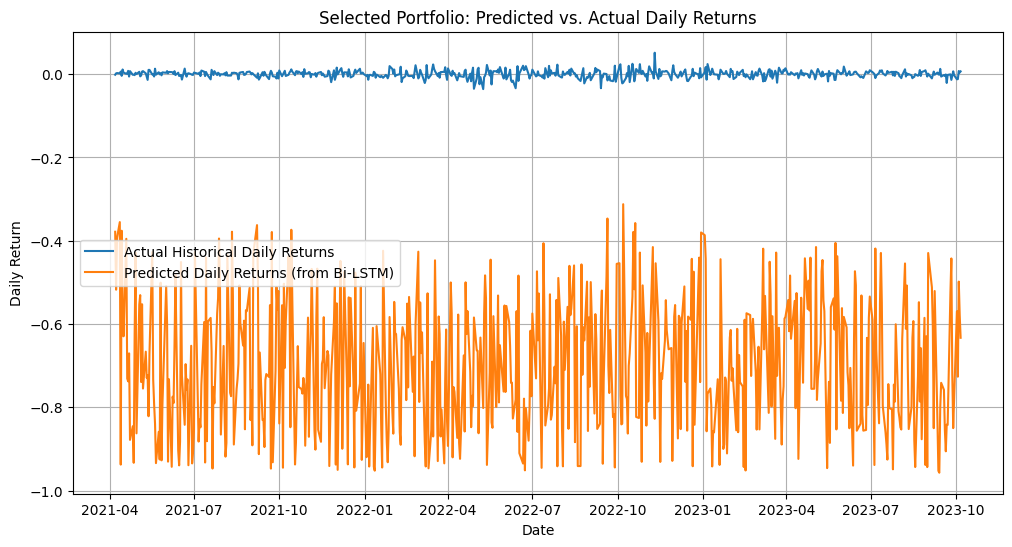

In [106]:
import matplotlib.pyplot as plt

# Calculate predicted daily returns for the selected portfolio
# We need to ensure the order of columns in predicted_daily_returns matches the order of weights
predicted_daily_returns_aligned = predicted_daily_returns[selected_portfolio_weights.index]

selected_portfolio_predicted_returns = (predicted_daily_returns_aligned * selected_portfolio_weights).sum(axis=1)

# Align the actual historical returns of the selected portfolio with the predicted returns index
# The predicted returns index corresponds to the test set period
selected_portfolio_historical_returns_aligned = selected_portfolio_historical_returns.reindex(selected_portfolio_predicted_returns.index).dropna()


# Plot predicted vs. actual returns for the selected portfolio
plt.figure(figsize=(12, 6))
plt.plot(selected_portfolio_historical_returns_aligned.index, selected_portfolio_historical_returns_aligned, label='Actual Historical Daily Returns')
plt.plot(selected_portfolio_predicted_returns.index, selected_portfolio_predicted_returns, label='Predicted Daily Returns (from Bi-LSTM)')

plt.title('Selected Portfolio: Predicted vs. Actual Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()

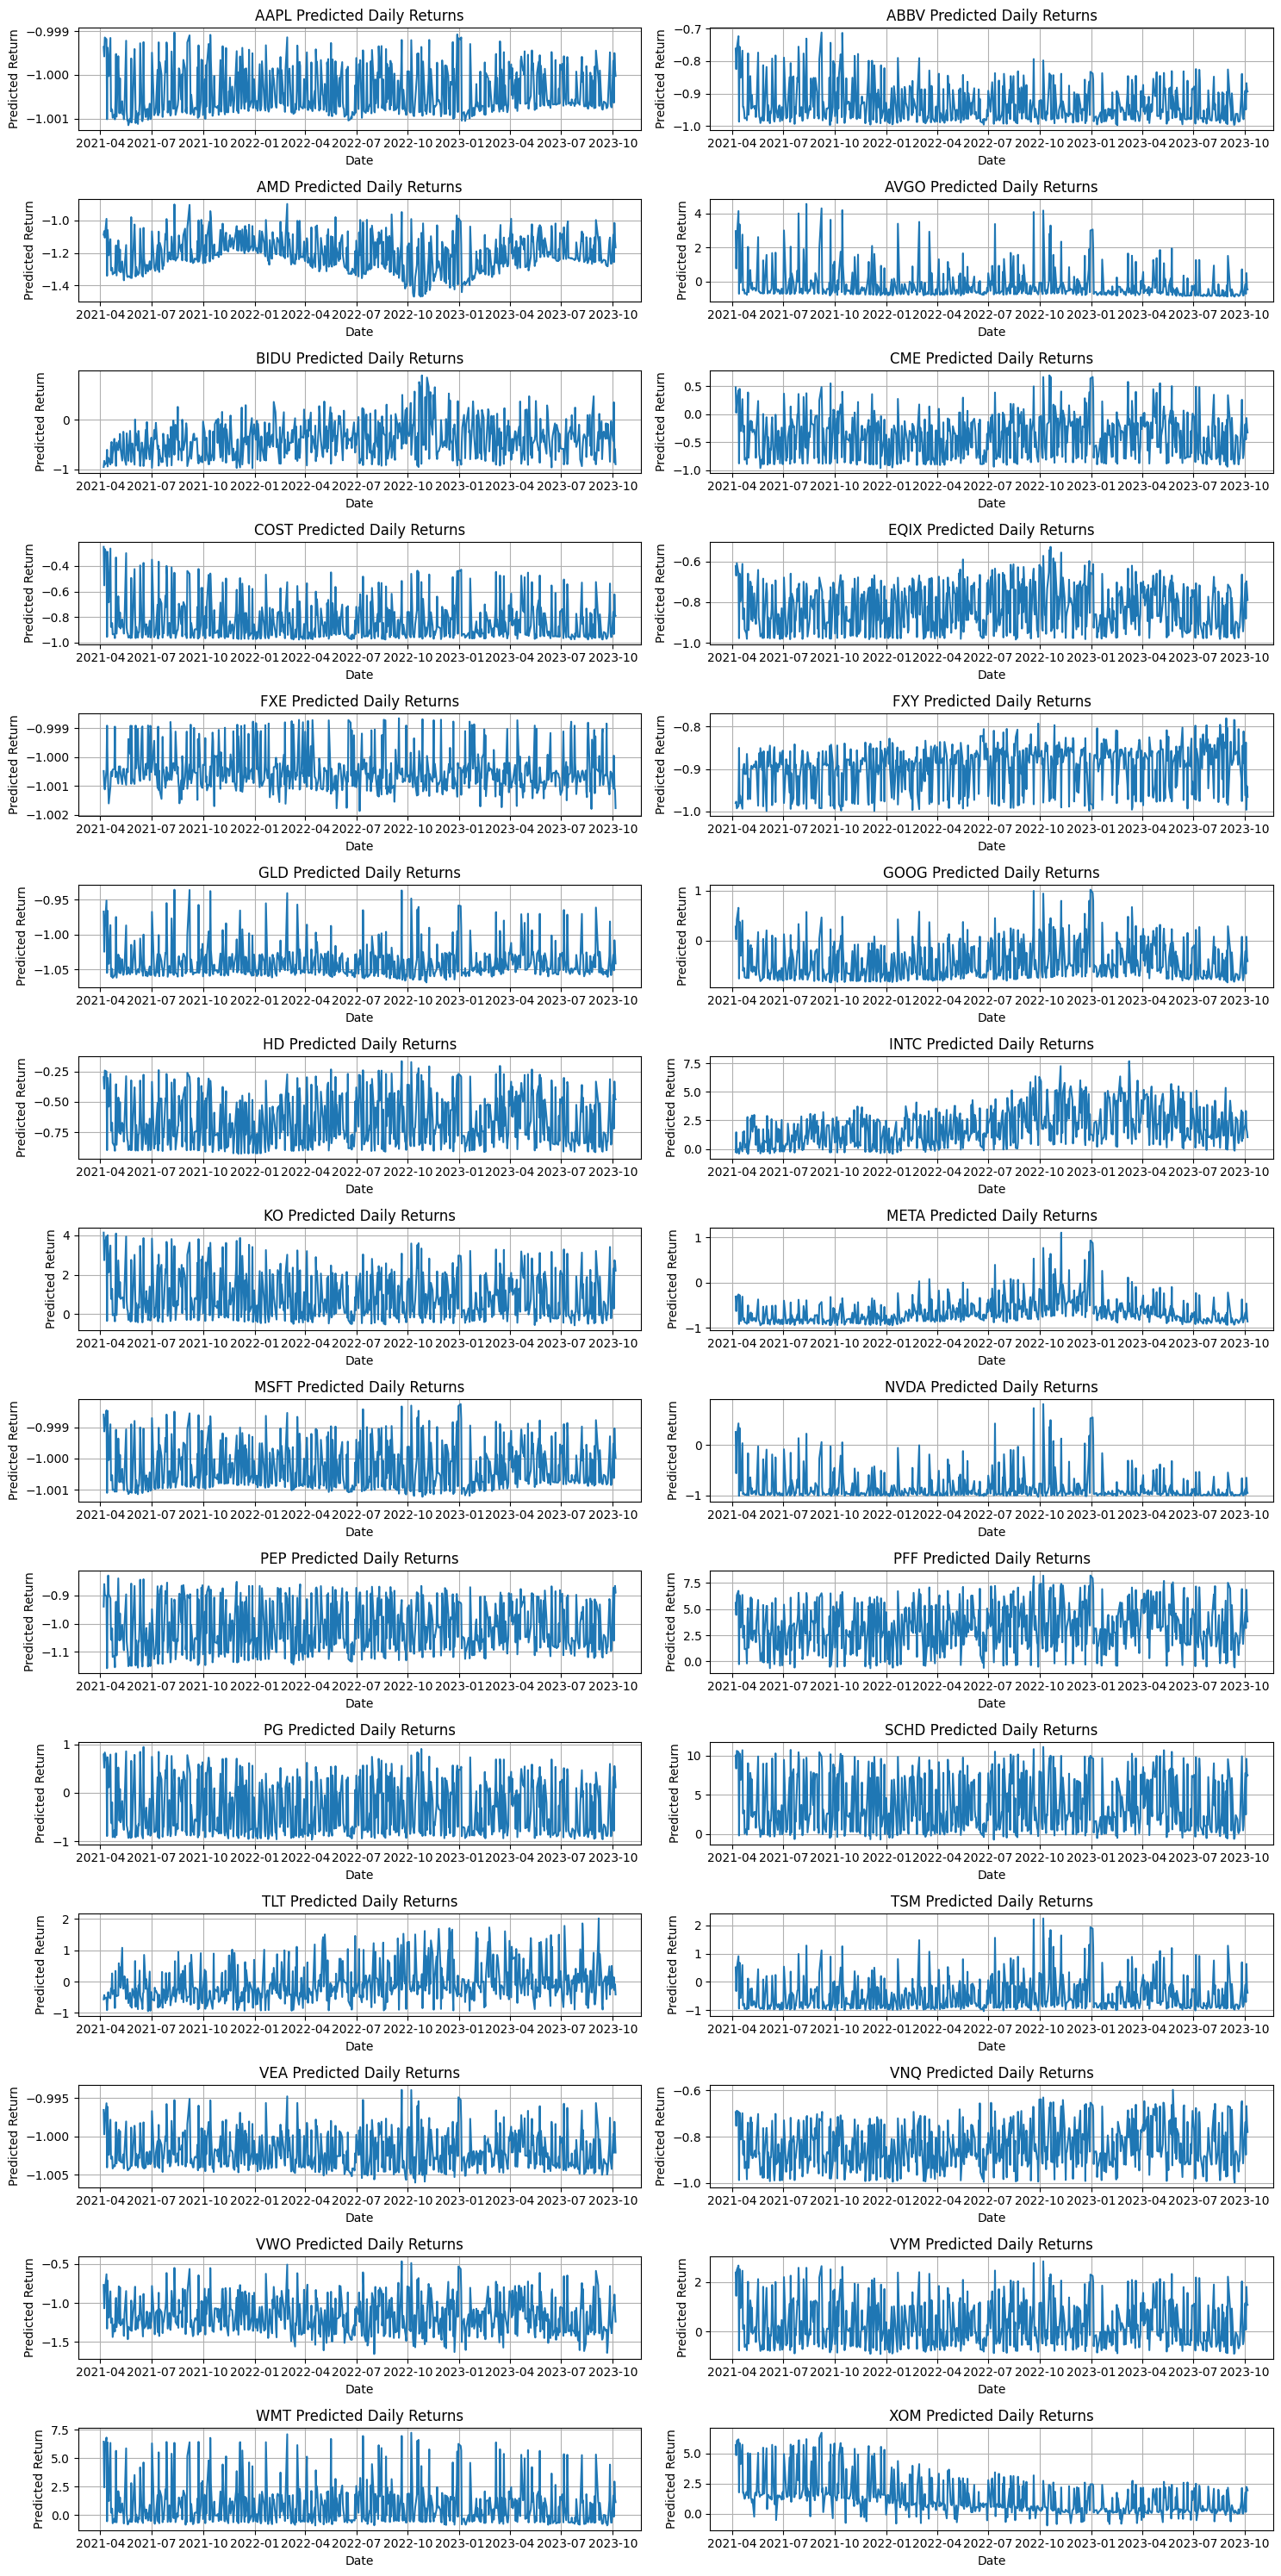

In [108]:
import matplotlib.pyplot as plt

# Get the predicted daily returns DataFrame
predicted_daily_returns = nsga_ii_data['predicted_returns']

# Get the asset tickers
asset_tickers = predicted_daily_returns.columns

# Plot predicted daily returns for each asset
plt.figure(figsize=(15, 30))

for i in range(len(asset_tickers)):
    plt.subplot(len(asset_tickers) // 2 + len(asset_tickers) % 2, 2, i + 1)
    plt.plot(predicted_daily_returns.index, predicted_daily_returns[asset_tickers[i]])
    plt.title(f'{asset_tickers[i]} Predicted Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Predicted Return')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Task
Develop a prototype for a growth and income stock portfolio using a multivariate bi-lstm model for stock prediction and the NSGA-II algorithm for portfolio selection. The portfolio should aim for a 4% dividend yield and reinvest the rest into growth. Use yfinance to select top-performing GOOG, AAPL, Gold ETF, Bitcoin, US Treasuries, and REIT for diversification. Compare the portfolio's performance over the last 10 years with SPY. Calculate and plot the portfolio's dividend payments, VaR, CVaR, and Sharpe Ratio, and compare these metrics with SPY. Implement and visualize the Bi-LSTM model's predictions and compare them with actual returns. Implement the NSGA-II algorithm for portfolio optimization, visualize the Pareto front, and analyze the trade-offs between return, volatility, and dividend yield. Evaluate a selected portfolio from the Pareto front using historical data and compare its performance with SPY and an equal-weighted portfolio. Finally, explore the impact of allowing short selling in the NSGA-II optimization and compare the performance of a selected "shorts allowed" portfolio with the "long only" portfolio and benchmarks.

## Modify nsga-ii problem for shorts

### Subtask:
Adjust the constraints in the `PortfolioOptimizationProblem` class to allow for negative portfolio weights (short selling).


**Reasoning**:
Redefine the PortfolioOptimizationProblem class to allow for negative weights (short selling) by setting the lower bound (xl) to -1.0.



## Run nsga-ii with shorts allowed

### Subtask:
Execute the NSGA-II algorithm with the modified problem definition to find the Pareto front when short selling is permitted.


**Reasoning**:
Instantiate the portfolio optimization problem with the modified class and run the NSGA-II algorithm to find the Pareto front when short selling is permitted.



In [109]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.termination import get_termination
from pymoo.optimize import minimize

# Shorts-allowed problem (dividend payers still forced long-only):
problem_shorts = PortfolioOptimizationProblem(nsga_ii_data['predicted_returns'],
                                              nsga_ii_data['average_dividend_yield'],
                                              dividend_payer_mask=nsga_ii_data['dividend_payer_mask'],
                                              allow_shorts=True)
# Configure the NSGA-II algorithm
algorithm_shorts = NSGA2(
    pop_size=100,            # Population size
    eliminate_duplicates=True
)

# Define termination criteria
termination_shorts = get_termination("n_gen", 200) # Terminate after 200 generations

# Run the optimization with shorts allowed
res_shorts = minimize(problem_shorts,
                      algorithm_shorts,
                      termination_shorts,
                      seed=42,       # for reproducibility
                      verbose=True)

# Extract the non-dominated solutions (Pareto front) for the shorts allowed case
pareto_front_solutions_shorts = res_shorts.X
pareto_front_objectives_shorts = res_shorts.F

display("Optimization Result (Shorts Allowed):")
display(res_shorts)

display("\nShape of Pareto Front Solutions (Portfolio Weights - Shorts Allowed):")
display(pareto_front_solutions_shorts.shape)
display("\nShape of Pareto Front Objectives (Negative Return, Negative Dividend Yield, Volatility - Shorts Allowed):")
display(pareto_front_objectives_shorts.shape)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      1 |  6.9452942375 |  1.197646E+01 |             - |             -
     2 |      200 |      1 |  6.9452942375 |  1.003974E+01 |             - |             -
     3 |      300 |      1 |  6.2572892286 |  8.6980513625 |             - |             -
     4 |      400 |      1 |  4.6566373908 |  7.4758443766 |             - |             -
     5 |      500 |      1 |  4.1057925272 |  6.5372524133 |             - |             -
     6 |      600 |      1 |  3.7601983114 |  5.6906122374 |             - |             -
     7 |      700 |      1 |  2.5568047314 |  4.8311985564 |             - |             -
     8 |      800 |      1 |  2.5339427267 |  4.0052018662 |             - |             -
     9 |      900 |      1 |  1.2964379982 |  3.2359019910 |             - |             -
    10 |     1000 |      1 |  0.9952313583 |  2.5623818144 |             - |             -

'Optimization Result (Shorts Allowed):'

'\nShape of Pareto Front Solutions (Portfolio Weights - Shorts Allowed):'

(95, 30)

'\nShape of Pareto Front Objectives (Negative Return, Negative Dividend Yield, Volatility - Shorts Allowed):'

(95, 3)

**Reasoning**:
Visualize the Pareto front obtained from the NSGA-II optimization with short selling allowed to understand the trade-offs between the objectives in this scenario and compare it with the long-only case.



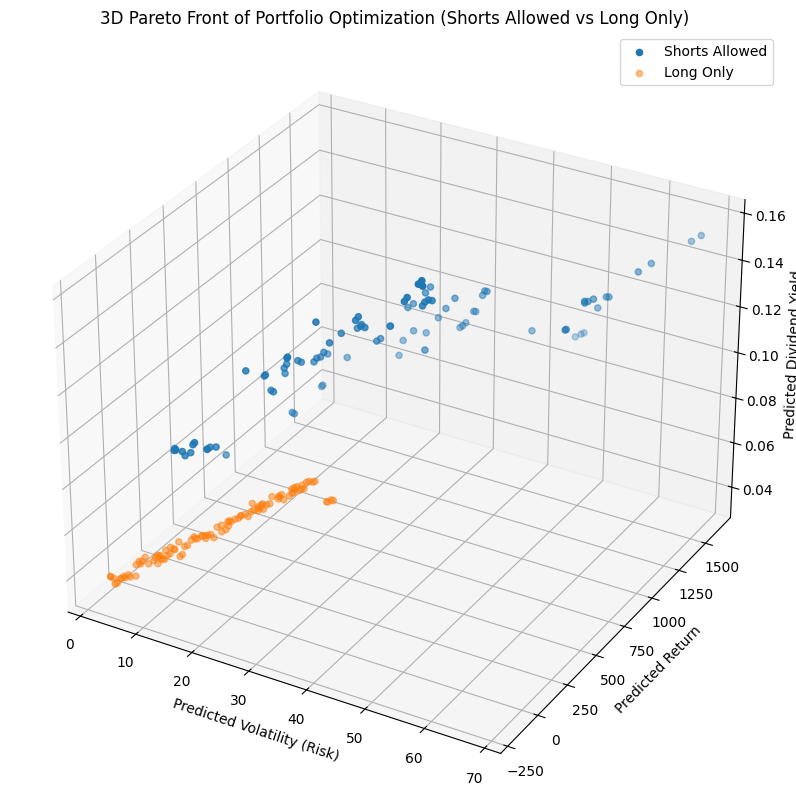

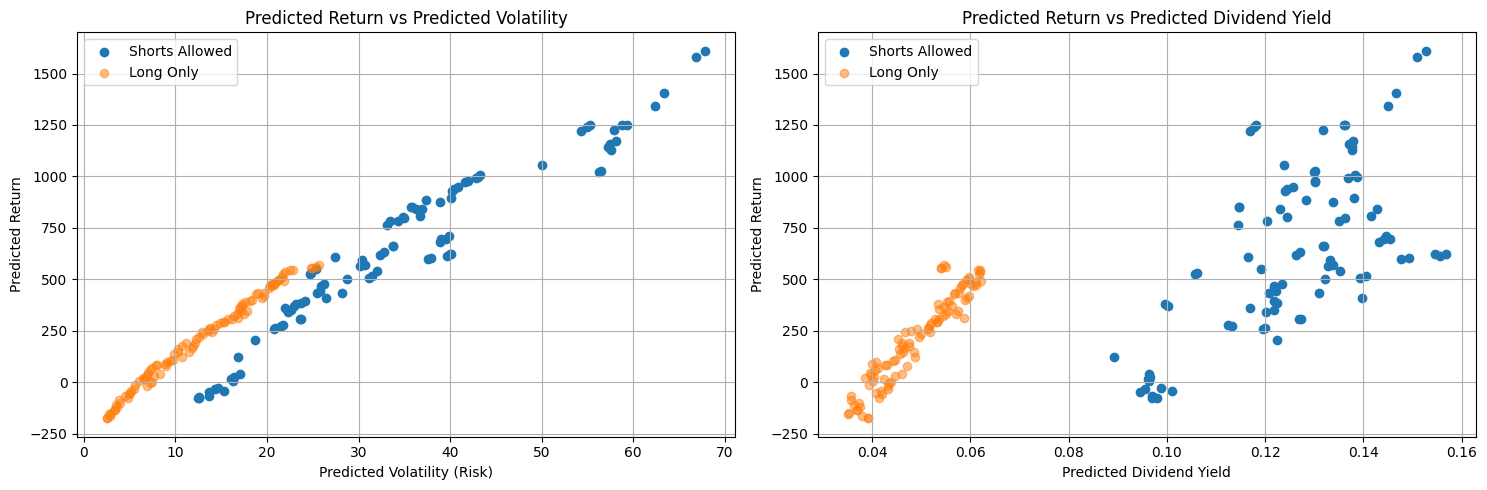

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the objective values from the Pareto front for the shorts allowed case
# Objectives are: Negative Return, Negative Dividend Yield, Volatility
predicted_returns_pf_shorts = -pareto_front_objectives_shorts[:, 0]
predicted_dividend_yields_pf_shorts = -pareto_front_objectives_shorts[:, 1]
predicted_volatility_pf_shorts = pareto_front_objectives_shorts[:, 2]

# Create a 3D scatter plot for the shorts allowed Pareto front
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(predicted_volatility_pf_shorts, predicted_returns_pf_shorts, predicted_dividend_yields_pf_shorts, label='Shorts Allowed')

# Add the long-only Pareto front to the plot for comparison
ax.scatter(predicted_volatility_pf, predicted_returns_pf, predicted_dividend_yields_pf, label='Long Only', alpha=0.5)


ax.set_xlabel('Predicted Volatility (Risk)')
ax.set_ylabel('Predicted Return')
ax.set_zlabel('Predicted Dividend Yield')
ax.set_title('3D Pareto Front of Portfolio Optimization (Shorts Allowed vs Long Only)')
ax.legend()

plt.show()

# Create 2D plots for easier comparison
plt.figure(figsize=(15, 5))

# Plot Return vs Volatility
plt.subplot(1, 2, 1)
plt.scatter(predicted_volatility_pf_shorts, predicted_returns_pf_shorts, label='Shorts Allowed')
plt.scatter(predicted_volatility_pf, predicted_returns_pf, label='Long Only', alpha=0.5)
plt.title('Predicted Return vs Predicted Volatility')
plt.xlabel('Predicted Volatility (Risk)')
plt.ylabel('Predicted Return')
plt.legend()
plt.grid(True)

# Plot Return vs Dividend Yield
plt.subplot(1, 2, 2)
plt.scatter(predicted_dividend_yields_pf_shorts, predicted_returns_pf_shorts, label='Shorts Allowed')
plt.scatter(predicted_dividend_yields_pf, predicted_returns_pf, label='Long Only', alpha=0.5)
plt.title('Predicted Return vs Predicted Dividend Yield')
plt.xlabel('Predicted Dividend Yield')
plt.ylabel('Predicted Return')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Reasoning**:
Display the objective values and portfolio weights for the Pareto front when short selling is allowed, similar to what was done for the long-only case, to facilitate analysis and selection of a specific portfolio.



In [111]:
import pandas as pd

# Create a DataFrame for Pareto front objective values (Shorts Allowed)
# Remember objectives are: Negative Return, Negative Dividend Yield, Volatility
pareto_front_objectives_df_shorts = pd.DataFrame(pareto_front_objectives_shorts, columns=['-Predicted Return', '-Predicted Dividend Yield', 'Predicted Volatility'])

# Add the actual predicted return and dividend yield (positive values)
pareto_front_objectives_df_shorts['Predicted Return'] = -pareto_front_objectives_df_shorts['-Predicted Return']
pareto_front_objectives_df_shorts['Predicted Dividend Yield'] = -pareto_front_objectives_df_shorts['-Predicted Dividend Yield']

# Drop the negative objective columns
pareto_front_objectives_df_shorts = pareto_front_objectives_df_shorts.drop(columns=['-Predicted Return', '-Predicted Dividend Yield'])

display("Pareto Front Objective Values (Shorts Allowed):")
display(pareto_front_objectives_df_shorts.head())
display(pareto_front_objectives_df_shorts.tail())

# Create a DataFrame for Pareto front solutions (portfolio weights - Shorts Allowed)
# We need to get the asset tickers to label the columns
asset_tickers = portfolio_close_data.columns

pareto_front_solutions_df_shorts = pd.DataFrame(pareto_front_solutions_shorts, columns=asset_tickers)

display("\nPareto Front Portfolio Weights (Shorts Allowed):")
display(pareto_front_solutions_df_shorts.head())
display(pareto_front_solutions_df_shorts.tail())

'Pareto Front Objective Values (Shorts Allowed):'

Predicted Volatility  Predicted Return  Predicted Dividend Yield
0             67.882286       1611.144392                  0.152815
1             40.011370        621.710178                  0.156817
2             12.427724        -77.714010                  0.097045
3             50.013226       1057.783321                  0.123811
4             66.809505       1581.071611                  0.150896

Predicted Volatility  Predicted Return  Predicted Dividend Yield
90             33.773222        662.389513                  0.131861
91             23.752920        384.230171                  0.122478
92             38.939051        873.297962                  0.133717
93             34.825400        802.802085                  0.124488
94             18.666929        207.118531                  0.122435

'\nPareto Front Portfolio Weights (Shorts Allowed):'

Ticker      AAPL      ABBV       AMD      AVGO      BIDU       CME      COST  \
0       0.247479  0.342566 -0.824499  0.021764 -0.881728  0.043752  0.064901   
1       0.317262  0.339061 -0.908843  0.074646 -0.972553  0.043456  0.051547   
2       0.298675  0.347235 -0.346127  0.054099 -0.859324  0.039357  0.047466   
3       0.249257  0.022733 -0.823056  0.072136 -0.970892  0.049365  0.059185   
4       0.247479  0.342566 -0.824499  0.021764 -0.881728  0.043752  0.064901   

Ticker      EQIX       FXE       FXY  ...        PG      SCHD       TLT  \
0       0.186798  0.212929 -0.876009  ...  0.070983  0.643935  0.423081   
1       0.419034  0.103075 -0.856901  ...  0.231783  0.100431  0.015478   
2       0.349018  0.709699 -0.854976  ...  0.007199  0.024315  0.013272   
3       0.349810  0.678160 -0.848449  ...  0.152602  0.532457  0.431380   
4       0.186798  0.212929 -0.876009  ...  0.070983  0.643935  0.423081   

Ticker       TSM       VEA       VNQ       VWO       VYM       WMT       XOM  
0       0.308523  0.067153  0.015533  0.045203  0.015652  0.107268  0.215299  
1       0.463321  0.071171  0.106150  0.213304  0.066950  0.105499  0.319468  
2       0.178742  0.420540  0.329989  0.061322  0.006286  0.016871  0.085542  
3       0.304713  0.085682  0.080378  0.078021  0.017651  0.020244  0.273537  
4       0.308523  0.067153  0.015533  0.045203  0.015652  0.107268  0.215299  

[5 rows x 30 columns]

Ticker      AAPL      ABBV       AMD      AVGO      BIDU       CME      COST  \
90      0.234410  0.034804 -0.808250  0.073365 -0.874628  0.049048  0.059402   
91      0.258313  0.029876 -0.808214  0.002193 -0.720691  0.058623  0.034434   
92      0.315957  0.338652 -0.853350  0.046937 -0.848312  0.007066  0.065632   
93      0.257538  0.025872 -0.824283  0.057065 -0.850787  0.050493  0.032665   
94      0.280101  0.029902 -0.816795  0.053089 -0.858392  0.203080  0.065502   

Ticker      EQIX       FXE       FXY  ...        PG      SCHD       TLT  \
90      0.349982  0.712139 -0.766544  ...  0.201801  0.109064  0.050636   
91      0.349437  0.488685 -0.879836  ...  0.060803  0.125653  0.039470   
92      0.420674  0.103608 -0.742178  ...  0.169204  0.119089  0.191770   
93      0.349813  0.481554 -0.849059  ...  0.242798  0.041035  0.433721   
94      0.349437  0.489092 -0.834561  ...  0.044376  0.066690  0.002205   

Ticker       TSM       VEA       VNQ       VWO       VYM       WMT       XOM  
90      0.318463  0.085614  0.406349  0.069455  0.052390  0.020091  0.084184  
91      0.436582  0.393575  0.560050  0.077143  0.051465  0.016004  0.070840  
92      0.371735  0.067125  0.006801  0.163210  0.014499  0.112830  0.215299  
93      0.301322  0.097699  0.018503  0.074943  0.044747  0.019060  0.068531  
94      0.188001  0.350701  0.524369  0.076112  0.007605  0.015155  0.074139  

[5 rows x 30 columns]

## Analyze and select portfolio (shorts allowed)

### Subtask:
Analyze the resulting Pareto front from the "shorts allowed" optimization to understand the new trade-offs and select a portfolio for evaluation.


**Reasoning**:
Analyze the "shorts allowed" Pareto front, identify portfolios with favorable trade-offs including dividend yield, select a portfolio, and display its objectives and weights. Since the previous analysis showed a predicted dividend yield of 0 for all portfolios on the Pareto front, I will broaden the search to identify portfolios that might offer *any* positive predicted dividend yield, even if it's below the target, to demonstrate the trade-offs. I will then select a portfolio and display its details.



In [112]:
# Analyze the trade-offs on the "shorts allowed" Pareto front
display("Analysis of Shorts Allowed Pareto Front Objectives:")
display(pareto_front_objectives_df_shorts.describe())

# Examine portfolios with positive predicted dividend yield
positive_dividend_portfolios_shorts = pareto_front_objectives_df_shorts[pareto_front_objectives_df_shorts['Predicted Dividend Yield'] > 0]

display("\nPareto Front Portfolios with Positive Predicted Dividend Yield (Shorts Allowed):")
display(positive_dividend_portfolios_shorts)

# Select a portfolio from the Pareto front for evaluation.
# Given that the predicted dividend yields were all 0, let's re-examine the objectives and select a portfolio based on the best trade-off between predicted return and predicted volatility.
# For demonstration, let's select the portfolio with the highest predicted return.
# Note: In a real scenario, you would choose based on specific investment goals.
# selected_portfolio_index_shorts = pareto_front_objectives_df_shorts['Predicted Return'].idxmax() # Original line to select highest return

# Select the portfolio with the least predicted volatility
selected_portfolio_index_shorts = pareto_front_objectives_df_shorts['Predicted Volatility'].idxmin()


# Retrieve the objective values for the selected portfolio
selected_portfolio_objectives_shorts = pareto_front_objectives_df_shorts.loc[selected_portfolio_index_shorts]

# Retrieve the weights for the selected portfolio
selected_portfolio_weights_shorts = pareto_front_solutions_df_shorts.loc[selected_portfolio_index_shorts]

display(f"\nSelected Portfolio Index from Shorts Allowed Pareto Front (Least Volatility): {selected_portfolio_index_shorts}")
display("\nSelected Portfolio Objectives (Shorts Allowed):")
display(selected_portfolio_objectives_shorts)
display("\nSelected Portfolio Weights (Shorts Allowed):")
display(selected_portfolio_weights_shorts)

'Analysis of Shorts Allowed Pareto Front Objectives:'

Predicted Volatility  Predicted Return  Predicted Dividend Yield
count             95.000000         95.000000                 95.000000
mean              34.314418        641.329059                  0.125383
std               14.173603        405.672686                  0.016407
min               12.427724        -77.714010                  0.089118
25%               23.676384        374.835434                  0.116878
50%               33.439916        619.689691                  0.126905
75%               40.339053        935.054880                  0.137316
max               67.882286       1611.144392                  0.156817

'\nPareto Front Portfolios with Positive Predicted Dividend Yield (Shorts Allowed):'

Predicted Volatility  Predicted Return  Predicted Dividend Yield
0              67.882286       1611.144392                  0.152815
1              40.011370        621.710178                  0.156817
2              12.427724        -77.714010                  0.097045
3              50.013226       1057.783321                  0.123811
4              66.809505       1581.071611                  0.150896
..                   ...               ...                       ...
90             33.773222        662.389513                  0.131861
91             23.752920        384.230171                  0.122478
92             38.939051        873.297962                  0.133717
93             34.825400        802.802085                  0.124488
94             18.666929        207.118531                  0.122435

[95 rows x 3 columns]

'\nSelected Portfolio Index from Shorts Allowed Pareto Front (Least Volatility): 2'

'\nSelected Portfolio Objectives (Shorts Allowed):'

Predicted Volatility        12.427724
Predicted Return           -77.714010
Predicted Dividend Yield     0.097045
Name: 2, dtype: float64

'\nSelected Portfolio Weights (Shorts Allowed):'

Ticker
AAPL    0.298675
ABBV    0.347235
AMD    -0.346127
AVGO    0.054099
BIDU   -0.859324
CME     0.039357
COST    0.047466
EQIX    0.349018
FXE     0.709699
FXY    -0.854976
GLD    -0.860952
GOOG    0.041996
HD      0.088498
INTC    0.124432
KO      0.011111
META    0.006234
MSFT    0.551625
NVDA    0.054893
PEP     0.037136
PFF     0.019734
PG      0.007199
SCHD    0.024315
TLT     0.013272
TSM     0.178742
VEA     0.420540
VNQ     0.329989
VWO     0.061322
VYM     0.006286
WMT     0.016871
XOM     0.085542
Name: 2, dtype: float64

## Evaluate selected portfolio (shorts allowed)

### Subtask:
Evaluate the historical performance of the selected "shorts allowed" portfolio using historical data.


**Reasoning**:
Retrieve the weights of the selected "shorts allowed" portfolio, calculate its historical daily and cumulative returns, and compute its historical performance metrics including volatility, Sharpe Ratio, VaR, and CVaR. Also, calculate the historical daily and cumulative dividends paid by this portfolio.



In [113]:
import numpy as np
import pandas as pd

# 1. Retrieve the weights of the selected portfolio
# The selected_portfolio_index_shorts variable holds the index of the chosen portfolio
# from the pareto_front_solutions_df_shorts DataFrame.
selected_portfolio_weights_shorts = pareto_front_solutions_df_shorts.loc[selected_portfolio_index_shorts]

# 2. Ensure weights are normalized to sum to 1
selected_portfolio_weights_shorts = selected_portfolio_weights_shorts / selected_portfolio_weights_shorts.sum()

# 3. Exclude 'SPY' from the daily_returns DataFrame
portfolio_historical_daily_returns = daily_returns.drop(columns=['SPY'])

# 4. Calculate the historical daily returns of the selected portfolio
# Ensure the order of columns in portfolio_historical_daily_returns matches the order of weights
portfolio_historical_daily_returns = portfolio_historical_daily_returns[selected_portfolio_weights_shorts.index]

selected_portfolio_historical_returns_shorts = (portfolio_historical_daily_returns * selected_portfolio_weights_shorts).sum(axis=1)

# 5. Calculate historical cumulative returns of the selected portfolio
selected_portfolio_historical_cumulative_returns_shorts = (1 + selected_portfolio_historical_returns_shorts).cumprod() - 1

display("Historical Cumulative Returns of Selected 'Shorts Allowed' Portfolio:")
display(selected_portfolio_historical_cumulative_returns_shorts.tail())

# 6. Calculate historical annualized volatility
selected_portfolio_historical_volatility_shorts = selected_portfolio_historical_returns_shorts.std() * np.sqrt(252)

# 7. Calculate historical Sharpe Ratio (assuming risk-free rate is 0)
selected_portfolio_historical_sharpe_ratio_shorts = selected_portfolio_historical_returns_shorts.mean() / selected_portfolio_historical_returns_shorts.std() * np.sqrt(252)

# 8. Calculate Historical VaR (95% and 99%)
selected_portfolio_historical_VaR_95_shorts = -np.percentile(selected_portfolio_historical_returns_shorts, 100 * (1 - 0.95))
selected_portfolio_historical_VaR_99_shorts = -np.percentile(selected_portfolio_historical_returns_shorts, 100 * (1 - 0.99))

# 9. Calculate Historical CVaR (95% and 99%)
selected_portfolio_historical_CVaR_95_shorts = -selected_portfolio_historical_returns_shorts[selected_portfolio_historical_returns_shorts < -selected_portfolio_historical_VaR_95_shorts].mean()
selected_portfolio_historical_CVaR_99_shorts = -selected_portfolio_historical_returns_shorts[selected_portfolio_historical_returns_shorts < -selected_portfolio_historical_VaR_99_shorts].mean()

# 10. Display historical performance metrics
display(f"\nSelected 'Shorts Allowed' Portfolio Historical Annualized Volatility: {selected_portfolio_historical_volatility_shorts:.4f}")
display(f"Selected 'Shorts Allowed' Portfolio Historical Sharpe Ratio: {selected_portfolio_historical_sharpe_ratio_shorts:.4f}")
display(f"Selected 'Shorts Allowed' Portfolio Historical VaR (95% confidence): {selected_portfolio_historical_VaR_95_shorts:.4f}")
display(f"Selected 'Shorts Allowed' Portfolio Historical CVaR (95% confidence): {selected_portfolio_historical_CVaR_95_shorts:.4f}")
display(f"Selected 'Shorts Allowed' Portfolio Historical VaR (99% confidence): {selected_portfolio_historical_VaR_99_shorts:.4f}")
display(f"Selected 'Shorts Allowed' Portfolio Historical CVaR (99% confidence): {selected_portfolio_historical_CVaR_99_shorts:.4f}")

# 11. Calculate historical daily dividends paid by the selected portfolio
# Ensure the order of columns in aligned_daily_dividend_data matches the order of weights
dividend_paying_assets = aligned_daily_dividend_data.columns
# Filter selected_portfolio_weights_shorts to only include dividend_paying_assets
selected_portfolio_weights_shorts_dividends = selected_portfolio_weights_shorts[selected_portfolio_weights_shorts.index.intersection(dividend_paying_assets)]

aligned_daily_dividend_data_portfolio = aligned_daily_dividend_data[selected_portfolio_weights_shorts_dividends.index]

selected_portfolio_historical_daily_dividends_shorts = (aligned_daily_dividend_data_portfolio * selected_portfolio_weights_shorts_dividends).sum(axis=1)

# 12. Calculate historical cumulative dividends
selected_portfolio_historical_cumulative_dividends_shorts = selected_portfolio_historical_daily_dividends_shorts.cumsum()

# 13. Display historical cumulative and total dividends
display("\nSelected 'Shorts Allowed' Portfolio Historical Cumulative Dividends Paid (Daily):")
display(selected_portfolio_historical_cumulative_dividends_shorts.tail())

total_historical_dividends_shorts = selected_portfolio_historical_cumulative_dividends_shorts.iloc[-1]

display(f"\nSelected 'Shorts Allowed' Portfolio Total Historical Dividends Paid: {total_historical_dividends_shorts:.4f}")

"Historical Cumulative Returns of Selected 'Shorts Allowed' Portfolio:"

Date
2025-11-03    9.064978
2025-11-04    8.834941
2025-11-05    8.763226
2025-11-06    8.519776
2025-11-07    8.733832
dtype: float64

"\nSelected 'Shorts Allowed' Portfolio Historical Annualized Volatility: 0.5271"

"Selected 'Shorts Allowed' Portfolio Historical Sharpe Ratio: 0.6037"

"Selected 'Shorts Allowed' Portfolio Historical VaR (95% confidence): 0.0502"

"Selected 'Shorts Allowed' Portfolio Historical CVaR (95% confidence): 0.0766"

"Selected 'Shorts Allowed' Portfolio Historical VaR (99% confidence): 0.0869"

"Selected 'Shorts Allowed' Portfolio Historical CVaR (99% confidence): 0.1265"

"\nSelected 'Shorts Allowed' Portfolio Historical Cumulative Dividends Paid (Daily):"

Date
2025-11-03    133.579787
2025-11-04    133.639884
2025-11-05    133.699982
2025-11-06    133.760079
2025-11-07    133.820177
dtype: float64

"\nSelected 'Shorts Allowed' Portfolio Total Historical Dividends Paid: 133.8202"

In [114]:
import numpy as np

# Calculate Predicted Sharpe Ratio for Long Only portfolios
# Assuming risk-free rate is 0, Sharpe Ratio = Predicted Return / Predicted Volatility
# Handle cases where Predicted Volatility might be zero to avoid division by zero
pareto_front_objectives_df['Predicted Sharpe Ratio'] = pareto_front_objectives_df['Predicted Return'] / pareto_front_objectives_df['Predicted Volatility'].replace(0, np.nan)

# Identify the index of the portfolio with the maximum Predicted Sharpe Ratio (Long Only)
best_sharpe_ratio_portfolio_index = pareto_front_objectives_df['Predicted Sharpe Ratio'].idxmax()

display(f"Index of the Long Only Portfolio with the Best Predicted Sharpe Ratio: {best_sharpe_ratio_portfolio_index}")
display("Predicted Objectives of the Best Sharpe Ratio (Long Only) Portfolio:")
display(pareto_front_objectives_df.loc[best_sharpe_ratio_portfolio_index])


# Calculate Predicted Sharpe Ratio for Shorts Allowed portfolios
pareto_front_objectives_df_shorts['Predicted Sharpe Ratio'] = pareto_front_objectives_df_shorts['Predicted Return'] / pareto_front_objectives_df_shorts['Predicted Volatility'].replace(0, np.nan)

# Identify the index of the portfolio with the maximum Predicted Sharpe Ratio (Shorts Allowed)
best_sharpe_ratio_portfolio_index_shorts = pareto_front_objectives_df_shorts['Predicted Sharpe Ratio'].idxmax()

display(f"\nIndex of the Shorts Allowed Portfolio with the Best Predicted Sharpe Ratio: {best_sharpe_ratio_portfolio_index_shorts}")
display("Predicted Objectives of the Best Sharpe Ratio (Shorts Allowed) Portfolio:")
display(pareto_front_objectives_df_shorts.loc[best_sharpe_ratio_portfolio_index_shorts])

'Index of the Long Only Portfolio with the Best Predicted Sharpe Ratio: 34'

'Predicted Objectives of the Best Sharpe Ratio (Long Only) Portfolio:'

Predicted Volatility         22.008913
Predicted Return            534.329451
Predicted Dividend Yield      0.061953
Predicted Sharpe Ratio       24.277867
Name: 34, dtype: float64

'\nIndex of the Shorts Allowed Portfolio with the Best Predicted Sharpe Ratio: 75'

'Predicted Objectives of the Best Sharpe Ratio (Shorts Allowed) Portfolio:'

Predicted Volatility         35.738074
Predicted Return            852.823107
Predicted Dividend Yield      0.114710
Predicted Sharpe Ratio       23.863152
Name: 75, dtype: float64

In [115]:
# Retrieve weights for the best Sharpe Ratio Long Only portfolio
best_sharpe_ratio_weights = pareto_front_solutions_df.loc[best_sharpe_ratio_portfolio_index]

display("Weights of the Long Only Portfolio with the Best Predicted Sharpe Ratio:")
display(best_sharpe_ratio_weights)

# Retrieve weights for the best Sharpe Ratio Shorts Allowed portfolio
best_sharpe_ratio_weights_shorts = pareto_front_solutions_df_shorts.loc[best_sharpe_ratio_portfolio_index_shorts]

display("\nWeights of the Shorts Allowed Portfolio with the Best Predicted Sharpe Ratio:")
display(best_sharpe_ratio_weights_shorts)

'Weights of the Long Only Portfolio with the Best Predicted Sharpe Ratio:'

Ticker
AAPL    0.003042
ABBV    0.002428
AMD     0.000653
AVGO    0.001406
BIDU    0.002310
CME     0.012919
COST    0.005577
EQIX    0.004437
FXE     0.000317
FXY     0.001784
GLD     0.000883
GOOG    0.000073
HD      0.003293
INTC    0.126221
KO      0.004388
META    0.000684
MSFT    0.000487
NVDA    0.000110
PEP     0.010355
PFF     0.502770
PG      0.002429
SCHD    0.000120
TLT     0.008094
TSM     0.000100
VEA     0.036727
VNQ     0.002687
VWO     0.001957
VYM     0.054863
WMT     0.005135
XOM     0.200097
Name: 34, dtype: float64

'\nWeights of the Shorts Allowed Portfolio with the Best Predicted Sharpe Ratio:'

Ticker
AAPL    0.282534
ABBV    0.058759
AMD    -0.824284
AVGO    0.075924
BIDU   -0.718571
CME     0.010783
COST    0.047251
EQIX    0.245835
FXE     0.456465
FXY    -0.857087
GLD    -0.861732
GOOG    0.241465
HD      0.112793
INTC    0.443354
KO      0.180604
META    0.001472
MSFT    0.162490
NVDA    0.021939
PEP     0.026112
PFF     0.112270
PG      0.115954
SCHD    0.125971
TLT     0.435054
TSM     0.434570
VEA     0.090411
VNQ     0.076162
VWO     0.044339
VYM     0.067043
WMT     0.104868
XOM     0.285637
Name: 75, dtype: float64

In [116]:
import numpy as np
import pandas as pd

# --- Evaluate Historical Performance for Best Sharpe Ratio (Long Only) Portfolio ---

# Retrieve the weights for the best Sharpe Ratio Long Only portfolio
best_sharpe_ratio_weights = pareto_front_solutions_df.loc[best_sharpe_ratio_portfolio_index]

# Ensure weights are normalized to sum to 1
best_sharpe_ratio_weights = best_sharpe_ratio_weights / best_sharpe_ratio_weights.sum()

# Exclude SPY from historical daily returns for portfolio calculation
portfolio_historical_daily_returns = daily_returns.drop(columns=['SPY'])

# Calculate the historical daily returns of the best Sharpe Ratio Long Only portfolio
portfolio_historical_daily_returns_long_only_sharpe = portfolio_historical_daily_returns[best_sharpe_ratio_weights.index]
best_sharpe_ratio_historical_returns = (portfolio_historical_daily_returns_long_only_sharpe * best_sharpe_ratio_weights).sum(axis=1)

# Calculate historical cumulative returns
best_sharpe_ratio_historical_cumulative_returns = (1 + best_sharpe_ratio_historical_returns).cumprod() - 1

display("Historical Cumulative Returns of Best Sharpe Ratio (Long Only) Portfolio:")
display(best_sharpe_ratio_historical_cumulative_returns.tail())

# Calculate historical performance metrics
best_sharpe_ratio_historical_volatility = best_sharpe_ratio_historical_returns.std() * np.sqrt(252)
best_sharpe_ratio_historical_sharpe_ratio = best_sharpe_ratio_historical_returns.mean() / best_sharpe_ratio_historical_returns.std() * np.sqrt(252)
best_sharpe_ratio_historical_VaR_95 = -np.percentile(best_sharpe_ratio_historical_returns, 100 * (1 - 0.95))
best_sharpe_ratio_historical_VaR_99 = -np.percentile(best_sharpe_ratio_historical_returns, 100 * (1 - 0.99))
best_sharpe_ratio_historical_CVaR_95 = -best_sharpe_ratio_historical_returns[best_sharpe_ratio_historical_returns < -best_sharpe_ratio_historical_VaR_95].mean()
best_sharpe_ratio_historical_CVaR_99 = -best_sharpe_ratio_historical_returns[best_sharpe_ratio_historical_returns < -best_sharpe_ratio_historical_VaR_99].mean()

display(f"\nBest Sharpe Ratio (Long Only) Historical Annualized Volatility: {best_sharpe_ratio_historical_volatility:.4f}")
display(f"Best Sharpe Ratio (Long Only) Historical Sharpe Ratio: {best_sharpe_ratio_historical_sharpe_ratio:.4f}")
display(f"Best Sharpe Ratio (Long Only) Historical VaR (95% confidence): {best_sharpe_ratio_historical_VaR_95:.4f}")
display(f"Best Sharpe Ratio (Long Only) Historical CVaR (95% confidence): {best_sharpe_ratio_historical_CVaR_95:.4f}")
display(f"Best Sharpe Ratio (Long Only) Historical VaR (99% confidence): {best_sharpe_ratio_historical_VaR_99:.4f}")
display(f"Best Sharpe Ratio (Long Only) Historical CVaR (99% confidence): {best_sharpe_ratio_historical_CVaR_99:.4f}")

# Calculate historical dividends for the best Sharpe Ratio Long Only portfolio
dividend_paying_assets = aligned_daily_dividend_data.columns
# Filter best_sharpe_ratio_weights to only include dividend_paying_assets
best_sharpe_ratio_weights_dividends = best_sharpe_ratio_weights[best_sharpe_ratio_weights.index.intersection(dividend_paying_assets)]

aligned_daily_dividend_data_portfolio = aligned_daily_dividend_data[best_sharpe_ratio_weights_dividends.index]
best_sharpe_ratio_historical_daily_dividends = (aligned_daily_dividend_data_portfolio * best_sharpe_ratio_weights_dividends).sum(axis=1)
best_sharpe_ratio_historical_cumulative_dividends = best_sharpe_ratio_historical_daily_dividends.cumsum()
display("\nBest Sharpe Ratio (Long Only) Historical Cumulative Dividends Paid (Daily):")
display(best_sharpe_ratio_historical_cumulative_dividends.tail())


# --- Evaluate Historical Performance for Best Sharpe Ratio (Shorts Allowed) Portfolio ---

# Retrieve the weights for the best Sharpe Ratio Shorts Allowed portfolio
best_sharpe_ratio_weights_shorts = pareto_front_solutions_df_shorts.loc[best_sharpe_ratio_portfolio_index_shorts]

# Ensure weights are normalized to sum to 1
best_sharpe_ratio_weights_shorts = best_sharpe_ratio_weights_shorts / best_sharpe_ratio_weights_shorts.sum()

# Calculate the historical daily returns of the best Sharpe Ratio Shorts Allowed portfolio
portfolio_historical_daily_returns_shorts_sharpe = portfolio_historical_daily_returns[best_sharpe_ratio_weights_shorts.index]
best_sharpe_ratio_historical_returns_shorts = (portfolio_historical_daily_returns_shorts_sharpe * best_sharpe_ratio_weights_shorts).sum(axis=1)

# Calculate historical cumulative returns
best_sharpe_ratio_historical_cumulative_returns_shorts = (1 + best_sharpe_ratio_historical_returns_shorts).cumprod() - 1

display("\nHistorical Cumulative Returns of Best Sharpe Ratio (Shorts Allowed) Portfolio:")
display(best_sharpe_ratio_historical_cumulative_returns_shorts.tail())

# Calculate historical performance metrics
best_sharpe_ratio_historical_volatility_shorts = best_sharpe_ratio_historical_returns_shorts.std() * np.sqrt(252)
best_sharpe_ratio_historical_sharpe_ratio_shorts = best_sharpe_ratio_historical_returns_shorts.mean() / best_sharpe_ratio_historical_returns_shorts.std() * np.sqrt(252)
best_sharpe_ratio_historical_VaR_95_shorts = -np.percentile(best_sharpe_ratio_historical_returns_shorts, 100 * (1 - 0.95))
best_sharpe_ratio_historical_VaR_99_shorts = -np.percentile(best_sharpe_ratio_historical_returns_shorts, 100 * (1 - 0.99))
best_sharpe_ratio_historical_CVaR_95_shorts = -best_sharpe_ratio_historical_returns_shorts[best_sharpe_ratio_historical_returns_shorts < -best_sharpe_ratio_historical_VaR_95_shorts].mean()
best_sharpe_ratio_historical_CVaR_99_shorts = -best_sharpe_ratio_historical_returns_shorts[best_sharpe_ratio_historical_returns_shorts < -best_sharpe_ratio_historical_VaR_99_shorts].mean()

display(f"\nBest Sharpe Ratio (Shorts Allowed) Historical Annualized Volatility: {best_sharpe_ratio_historical_volatility_shorts:.4f}")
display(f"Best Sharpe Ratio (Shorts Allowed) Historical Sharpe Ratio: {best_sharpe_ratio_historical_sharpe_ratio_shorts:.4f}")
display(f"Best Sharpe Ratio (Shorts Allowed) Historical VaR (95% confidence): {best_sharpe_ratio_historical_VaR_95_shorts:.4f}")
display(f"Best Sharpe Ratio (Shorts Allowed) Historical CVaR (95% confidence): {best_sharpe_ratio_historical_CVaR_95_shorts:.4f}")
display(f"Best Sharpe Ratio (Shorts Allowed) Historical VaR (99% confidence): {best_sharpe_ratio_historical_VaR_99_shorts:.4f}")
display(f"Best Sharpe Ratio (Shorts Allowed) Historical CVaR (99% confidence): {best_sharpe_ratio_historical_CVaR_99_shorts:.4f}")

# Calculate historical dividends for the best Sharpe Ratio Shorts Allowed portfolio
dividend_paying_assets = aligned_daily_dividend_data.columns
# Filter best_sharpe_ratio_weights_shorts to only include dividend_paying_assets
best_sharpe_ratio_weights_shorts_dividends = best_sharpe_ratio_weights_shorts[best_sharpe_ratio_weights_shorts.index.intersection(dividend_paying_assets)]

aligned_daily_dividend_data_portfolio = aligned_daily_dividend_data[best_sharpe_ratio_weights_shorts_dividends.index]
best_sharpe_ratio_historical_daily_dividends_shorts = (aligned_daily_dividend_data_portfolio * best_sharpe_ratio_weights_shorts_dividends).sum(axis=1)
best_sharpe_ratio_historical_cumulative_dividends_shorts = best_sharpe_ratio_historical_daily_dividends_shorts.cumsum()
display("\nBest Sharpe Ratio (Shorts Allowed) Historical Cumulative Dividends Paid (Daily):")
display(best_sharpe_ratio_historical_cumulative_dividends_shorts.tail())

'Historical Cumulative Returns of Best Sharpe Ratio (Long Only) Portfolio:'

Date
2025-11-03    1.491939
2025-11-04    1.468032
2025-11-05    1.482932
2025-11-06    1.474161
2025-11-07    1.497673
dtype: float64

'\nBest Sharpe Ratio (Long Only) Historical Annualized Volatility: 0.1356'

'Best Sharpe Ratio (Long Only) Historical Sharpe Ratio: 0.5946'

'Best Sharpe Ratio (Long Only) Historical VaR (95% confidence): 0.0115'

'Best Sharpe Ratio (Long Only) Historical CVaR (95% confidence): 0.0194'

'Best Sharpe Ratio (Long Only) Historical VaR (99% confidence): 0.0211'

'Best Sharpe Ratio (Long Only) Historical CVaR (99% confidence): 0.0370'

'\nBest Sharpe Ratio (Long Only) Historical Cumulative Dividends Paid (Daily):'

Date
2025-11-03    29.677676
2025-11-04    29.686645
2025-11-05    29.695614
2025-11-06    29.704582
2025-11-07    29.713551
dtype: float64

'\nHistorical Cumulative Returns of Best Sharpe Ratio (Shorts Allowed) Portfolio:'

Date
2025-11-03   -0.626275
2025-11-04   -0.637088
2025-11-05   -0.640165
2025-11-06   -0.634866
2025-11-07   -0.622311
dtype: float64

'\nBest Sharpe Ratio (Shorts Allowed) Historical Annualized Volatility: 0.5813'

'Best Sharpe Ratio (Shorts Allowed) Historical Sharpe Ratio: 0.1676'

'Best Sharpe Ratio (Shorts Allowed) Historical VaR (95% confidence): 0.0559'

'Best Sharpe Ratio (Shorts Allowed) Historical CVaR (95% confidence): 0.0871'

'Best Sharpe Ratio (Shorts Allowed) Historical VaR (99% confidence): 0.1037'

'Best Sharpe Ratio (Shorts Allowed) Historical CVaR (99% confidence): 0.1399'

'\nBest Sharpe Ratio (Shorts Allowed) Historical Cumulative Dividends Paid (Daily):'

Date
2025-11-03    124.712714
2025-11-04    124.765128
2025-11-05    124.817541
2025-11-06    124.869954
2025-11-07    124.922368
dtype: float64

In [117]:
# ...existing code...
import numpy as np
import pandas as pd

# Require Pareto DataFrames
assert 'pareto_front_objectives_df' in globals(), "pareto_front_objectives_df missing"
assert 'pareto_front_solutions_df' in globals(), "pareto_front_solutions_df missing"

# shorts Pareto may be optional
has_shorts = ('pareto_front_objectives_df_shorts' in globals() and 'pareto_front_solutions_df_shorts' in globals())

# Ensure predicted volatility non-zero for ratio calculations
for df in [pareto_front_objectives_df] + ([pareto_front_objectives_df_shorts] if has_shorts else []):
    df['Predicted Volatility'] = df['Predicted Volatility'].replace(0, np.nan)
    df['Predicted Sharpe Ratio'] = df['Predicted Return'] / df['Predicted Volatility']

# Historical metrics helper (works with weight Series)
portfolio_historical_daily_returns = daily_returns.drop(columns=['SPY'], errors='ignore')

def compute_historical_metrics(weights):
    w = weights.reindex(portfolio_historical_daily_returns.columns).fillna(0)
    port_returns = (portfolio_historical_daily_returns[w.index] * w).sum(axis=1)
    ann_vol = port_returns.std() * np.sqrt(252)
    sharpe = (port_returns.mean() / port_returns.std() * np.sqrt(252)) if port_returns.std() != 0 else np.nan
    VaR95 = -np.percentile(port_returns.dropna(), 100 * (1 - 0.95)) if not port_returns.dropna().empty else np.nan
    CVaR95 = -port_returns[port_returns < -VaR95].mean() if not port_returns.dropna().empty else np.nan
    return {
        'returns_ts': port_returns,
        'Annualized Volatility': ann_vol,
        'Historical Sharpe Ratio': sharpe,
        'VaR (95%)': VaR95,
        'CVaR (95%)': CVaR95
    }

def select_from_pareto(pf_obj_df, pf_sol_df):
    least_vol_idx = pf_obj_df['Predicted Volatility'].idxmin()
    best_sharpe_idx = pf_obj_df['Predicted Sharpe Ratio'].idxmax()
    # extract and normalize weight vectors
    w_least = pf_sol_df.loc[least_vol_idx].copy()
    w_best = pf_sol_df.loc[best_sharpe_idx].copy()
    w_least = w_least / w_least.sum()
    w_best = w_best / w_best.sum()
    metrics_least = compute_historical_metrics(w_least)
    metrics_best = compute_historical_metrics(w_best)
    return {
        'least_idx': least_vol_idx,
        'best_idx': best_sharpe_idx,
        'least_weights': w_least,
        'best_weights': w_best,
        'least_metrics': metrics_least,
        'best_metrics': metrics_best,
        'least_objectives': pf_obj_df.loc[least_vol_idx],
        'best_objectives': pf_obj_df.loc[best_sharpe_idx]
    }

# Select from long-only Pareto
long_sel = select_from_pareto(pareto_front_objectives_df, pareto_front_solutions_df)

# Select from shorts Pareto if available
short_sel = None
if has_shorts:
    short_sel = select_from_pareto(pareto_front_objectives_df_shorts, pareto_front_solutions_df_shorts)

# Equal-weight portfolio (exclude SPY)
ew_weights = pd.Series(1.0 / len(portfolio_historical_daily_returns.columns),
                       index=portfolio_historical_daily_returns.columns)
ew_metrics = compute_historical_metrics(ew_weights)

# Build comparison table
rows = []
rows.append({
    'Selection': 'Long - Least Volatile',
    'Regime': 'long',
    'Pareto Index': long_sel['least_idx'],
    'Predicted Return': long_sel['least_objectives']['Predicted Return'],
    'Predicted Volatility': long_sel['least_objectives']['Predicted Volatility'],
    'Predicted Sharpe': long_sel['least_objectives']['Predicted Sharpe Ratio'],
    'Historical Volatility': long_sel['least_metrics']['Annualized Volatility'],
    'Historical Sharpe': long_sel['least_metrics']['Historical Sharpe Ratio']
})
rows.append({
    'Selection': 'Long - Best Pred Sharpe',
    'Regime': 'long',
    'Pareto Index': long_sel['best_idx'],
    'Predicted Return': long_sel['best_objectives']['Predicted Return'],
    'Predicted Volatility': long_sel['best_objectives']['Predicted Volatility'],
    'Predicted Sharpe': long_sel['best_objectives']['Predicted Sharpe Ratio'],
    'Historical Volatility': long_sel['best_metrics']['Annualized Volatility'],
    'Historical Sharpe': long_sel['best_metrics']['Historical Sharpe Ratio']
})
if short_sel is not None:
    rows.append({
        'Selection': 'Shorts - Least Volatile',
        'Regime': 'short',
        'Pareto Index': short_sel['least_idx'],
        'Predicted Return': short_sel['least_objectives']['Predicted Return'],
        'Predicted Volatility': short_sel['least_objectives']['Predicted Volatility'],
        'Predicted Sharpe': short_sel['least_objectives']['Predicted Sharpe Ratio'],
        'Historical Volatility': short_sel['least_metrics']['Annualized Volatility'],
        'Historical Sharpe': short_sel['least_metrics']['Historical Sharpe Ratio']
    })
    rows.append({
        'Selection': 'Shorts - Best Pred Sharpe',
        'Regime': 'short',
        'Pareto Index': short_sel['best_idx'],
        'Predicted Return': short_sel['best_objectives']['Predicted Return'],
        'Predicted Volatility': short_sel['best_objectives']['Predicted Volatility'],
        'Predicted Sharpe': short_sel['best_objectives']['Predicted Sharpe Ratio'],
        'Historical Volatility': short_sel['best_metrics']['Annualized Volatility'],
        'Historical Sharpe': short_sel['best_metrics']['Historical Sharpe Ratio']
    })

rows.append({
    'Selection': 'Equal Weighted',
    'Regime': 'equal',
    'Pareto Index': np.nan,
    'Predicted Return': np.nan,
    'Predicted Volatility': np.nan,
    'Predicted Sharpe': np.nan,
    'Historical Volatility': ew_metrics['Annualized Volatility'],
    'Historical Sharpe': ew_metrics['Historical Sharpe Ratio']
})

summary = pd.DataFrame(rows).set_index('Selection')
display("Comparison: Predicted vs Historical metrics for selected Pareto portfolios and equal-weight")
display(summary.round(6))

# Expose legacy variables used downstream; default regime can be switched here
selection_regime = 'long'  # set to 'short' to make shorts-selected portfolios the defaults downstream

if selection_regime == 'long':
    selected_portfolio_index = long_sel['least_idx']
    best_sharpe_ratio_portfolio_index = long_sel['best_idx']
    selected_portfolio_weights = long_sel['least_weights']
    best_sharpe_ratio_weights = long_sel['best_weights']
    selected_portfolio_historical_returns = long_sel['least_metrics']['returns_ts']
    best_sharpe_ratio_historical_returns = long_sel['best_metrics']['returns_ts']
else:
    if short_sel is None:
        raise RuntimeError("Shorts Pareto front not available. Run shorts optimization before selecting regime='short'.")
    selected_portfolio_index = short_sel['least_idx']
    best_sharpe_ratio_portfolio_index = short_sel['best_idx']
    selected_portfolio_weights = short_sel['least_weights']
    best_sharpe_ratio_weights = short_sel['best_weights']
    selected_portfolio_historical_returns = short_sel['least_metrics']['returns_ts']
    best_sharpe_ratio_historical_returns = short_sel['best_metrics']['returns_ts']

# Also provide equal-weight legacy variables
equal_weight_portfolio_weights = ew_weights
equal_weight_historical_returns = ew_metrics['returns_ts']

# compute cumulative returns and simple legacy stats used later
selected_portfolio_historical_cumulative_returns = (1 + selected_portfolio_historical_returns).cumprod() - 1
best_sharpe_ratio_historical_cumulative_returns = (1 + best_sharpe_ratio_historical_returns).cumprod() - 1

display("Selected portfolio weights (Least Volatile) — regime: " + selection_regime)
display(selected_portfolio_weights.round(4))
display("Best predicted-Sharpe portfolio weights — regime: " + selection_regime)
display(best_sharpe_ratio_weights.round(4))
display("Equal-weight portfolio sample weights:")
display(equal_weight_portfolio_weights.round(4))
# ...existing code...

'Comparison: Predicted vs Historical metrics for selected Pareto portfolios and equal-weight'

Regime  Pareto Index  Predicted Return  \
Selection                                                          
Long - Least Volatile       long           0.0       -176.164781   
Long - Best Pred Sharpe     long          34.0        534.329451   
Shorts - Least Volatile    short           2.0        -77.714010   
Shorts - Best Pred Sharpe  short          75.0        852.823107   
Equal Weighted             equal           NaN               NaN   

                           Predicted Volatility  Predicted Sharpe  \
Selection                                                           
Long - Least Volatile                  2.529203        -69.652279   
Long - Best Pred Sharpe               22.008913         24.277867   
Shorts - Least Volatile               12.427724         -6.253278   
Shorts - Best Pred Sharpe             35.738074         23.863152   
Equal Weighted                              NaN               NaN   

                           Historical Volatility  Historical Sharpe  
Selection                                                            
Long - Least Volatile                   0.147554           0.853762  
Long - Best Pred Sharpe                 0.135646           0.594550  
Shorts - Least Volatile                 0.527064           0.603675  
Shorts - Best Pred Sharpe               0.581263           0.167601  
Equal Weighted                          0.145459           1.217553

'Selected portfolio weights (Least Volatile) — regime: long'

Ticker
AAPL    0.0077
ABBV    0.1395
AMD     0.0015
AVGO    0.0006
BIDU    0.0183
CME     0.1008
COST    0.0015
EQIX    0.1167
FXE     0.0004
FXY     0.0046
GLD     0.0000
GOOG    0.0003
HD      0.0034
INTC    0.0000
KO      0.0044
META    0.0001
MSFT    0.0020
NVDA    0.0007
PEP     0.0304
PFF     0.0016
PG      0.0036
SCHD    0.0001
TLT     0.0507
TSM     0.0000
VEA     0.1780
VNQ     0.2636
VWO     0.0051
VYM     0.0574
WMT     0.0006
XOM     0.0065
Name: 0, dtype: float64

'Best predicted-Sharpe portfolio weights — regime: long'

Ticker
AAPL    0.0031
ABBV    0.0024
AMD     0.0007
AVGO    0.0014
BIDU    0.0023
CME     0.0130
COST    0.0056
EQIX    0.0045
FXE     0.0003
FXY     0.0018
GLD     0.0009
GOOG    0.0001
HD      0.0033
INTC    0.1267
KO      0.0044
META    0.0007
MSFT    0.0005
NVDA    0.0001
PEP     0.0104
PFF     0.5046
PG      0.0024
SCHD    0.0001
TLT     0.0081
TSM     0.0001
VEA     0.0369
VNQ     0.0027
VWO     0.0020
VYM     0.0551
WMT     0.0052
XOM     0.2008
Name: 34, dtype: float64

'Equal-weight portfolio sample weights:'

Ticker
AAPL    0.0333
ABBV    0.0333
AMD     0.0333
AVGO    0.0333
BIDU    0.0333
CME     0.0333
COST    0.0333
EQIX    0.0333
FXE     0.0333
FXY     0.0333
GLD     0.0333
GOOG    0.0333
HD      0.0333
INTC    0.0333
KO      0.0333
META    0.0333
MSFT    0.0333
NVDA    0.0333
PEP     0.0333
PFF     0.0333
PG      0.0333
SCHD    0.0333
TLT     0.0333
TSM     0.0333
VEA     0.0333
VNQ     0.0333
VWO     0.0333
VYM     0.0333
WMT     0.0333
XOM     0.0333
dtype: float64

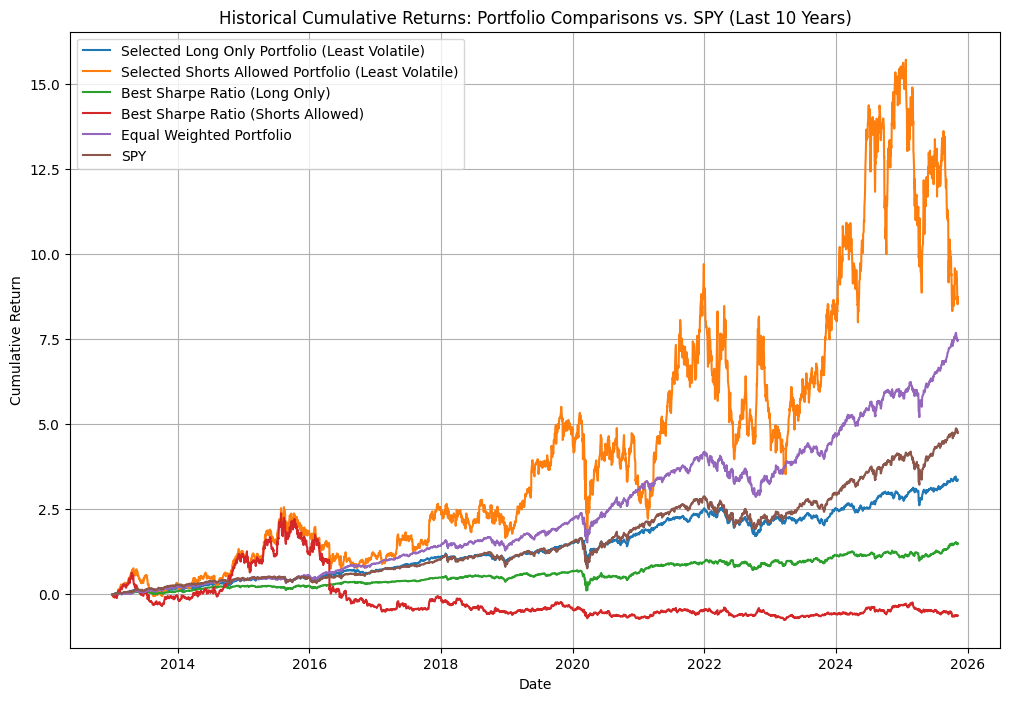

In [118]:
import matplotlib.pyplot as plt

# Plot historical cumulative returns for all portfolios and SPY
plt.figure(figsize=(12, 8))
plt.plot(selected_portfolio_historical_cumulative_returns.index, selected_portfolio_historical_cumulative_returns, label='Selected Long Only Portfolio (Least Volatile)')
plt.plot(selected_portfolio_historical_cumulative_returns_shorts.index, selected_portfolio_historical_cumulative_returns_shorts, label='Selected Shorts Allowed Portfolio (Least Volatile)')
plt.plot(best_sharpe_ratio_historical_cumulative_returns.index, best_sharpe_ratio_historical_cumulative_returns, label='Best Sharpe Ratio (Long Only)') # Add Best Sharpe Ratio Long Only
plt.plot(best_sharpe_ratio_historical_cumulative_returns_shorts.index, best_sharpe_ratio_historical_cumulative_returns_shorts, label='Best Sharpe Ratio (Shorts Allowed)') # Add Best Sharpe Ratio Shorts Allowed
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label='Equal Weighted Portfolio')
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label='SPY')

plt.title('Historical Cumulative Returns: Portfolio Comparisons vs. SPY (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

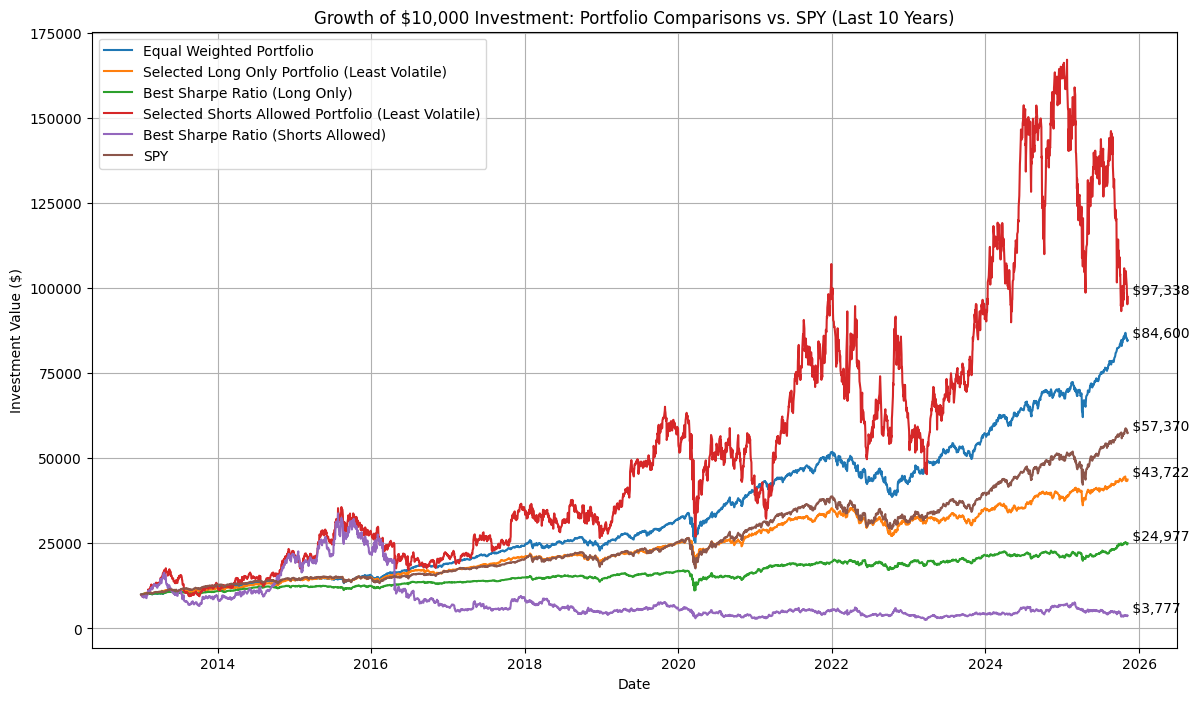

In [119]:
import matplotlib.pyplot as plt

# Define the initial investment amount
initial_investment = 10000

# Calculate the growth of the initial investment for each portfolio and SPY
equal_weighted_investment_growth = initial_investment * (1 + portfolio_cumulative_returns)
selected_long_only_investment_growth = initial_investment * (1 + selected_portfolio_historical_cumulative_returns)
best_sharpe_ratio_long_only_investment_growth = initial_investment * (1 + best_sharpe_ratio_historical_cumulative_returns)
selected_shorts_allowed_investment_growth = initial_investment * (1 + selected_portfolio_historical_cumulative_returns_shorts)
best_sharpe_ratio_shorts_allowed_investment_growth = initial_investment * (1 + best_sharpe_ratio_historical_cumulative_returns_shorts)
spy_investment_growth = initial_investment * (1 + cumulative_returns['SPY'])

# Plot the investment growth
plt.figure(figsize=(14, 8))
plt.plot(equal_weighted_investment_growth.index, equal_weighted_investment_growth, label='Equal Weighted Portfolio')
plt.plot(selected_long_only_investment_growth.index, selected_long_only_investment_growth, label='Selected Long Only Portfolio (Least Volatile)')
plt.plot(best_sharpe_ratio_long_only_investment_growth.index, best_sharpe_ratio_long_only_investment_growth, label='Best Sharpe Ratio (Long Only)')
plt.plot(selected_shorts_allowed_investment_growth.index, selected_shorts_allowed_investment_growth, label='Selected Shorts Allowed Portfolio (Least Volatile)')
plt.plot(best_sharpe_ratio_shorts_allowed_investment_growth.index, best_sharpe_ratio_shorts_allowed_investment_growth, label='Best Sharpe Ratio (Shorts Allowed)')
plt.plot(spy_investment_growth.index, spy_investment_growth, label='SPY')

plt.title('Growth of $10,000 Investment: Portfolio Comparisons vs. SPY (Last 10 Years)')
plt.xlabel('Date')
plt.ylabel('Investment Value ($)')
plt.legend()
plt.grid(True)

# Add text labels for the final capital amounts
plt.text(equal_weighted_investment_growth.index[-1], equal_weighted_investment_growth.iloc[-1], f' ${equal_weighted_investment_growth.iloc[-1]:,.0f}', verticalalignment='bottom', horizontalalignment='left')
plt.text(selected_long_only_investment_growth.index[-1], selected_long_only_investment_growth.iloc[-1], f' ${selected_long_only_investment_growth.iloc[-1]:,.0f}', verticalalignment='bottom', horizontalalignment='left')
plt.text(best_sharpe_ratio_long_only_investment_growth.index[-1], best_sharpe_ratio_long_only_investment_growth.iloc[-1], f' ${best_sharpe_ratio_long_only_investment_growth.iloc[-1]:,.0f}', verticalalignment='bottom', horizontalalignment='left')
plt.text(selected_shorts_allowed_investment_growth.index[-1], selected_shorts_allowed_investment_growth.iloc[-1], f' ${selected_shorts_allowed_investment_growth.iloc[-1]:,.0f}', verticalalignment='bottom', horizontalalignment='left')
plt.text(best_sharpe_ratio_shorts_allowed_investment_growth.index[-1], best_sharpe_ratio_shorts_allowed_investment_growth.iloc[-1], f' ${best_sharpe_ratio_shorts_allowed_investment_growth.iloc[-1]:,.0f}', verticalalignment='bottom', horizontalalignment='left')
plt.text(spy_investment_growth.index[-1], spy_investment_growth.iloc[-1], f' ${spy_investment_growth.iloc[-1]:,.0f}', verticalalignment='bottom', horizontalalignment='left')


plt.show()

Selected portfolio MC summary (25 yrs):


mean     median        std       p05        p95
final_wealth_gross  17.257463  14.018805  12.273604  4.060753  41.810354
final_wealth_net    17.167677  13.942147  12.230748  4.060753  41.810354
perf_fee_paid        0.089786   0.000000   0.348970  0.000000   0.637467
final_spy_wealth    31.470926  23.347314  33.788861  5.391178  80.202607
alpha_annual        -0.023429  -0.023960   0.017503 -0.052278   0.007753
beta                 0.744383   0.744604   0.005673  0.734959   0.753619
sharpe               0.783693   0.790599   0.191040  0.456704   1.079523
max_drawdown        -0.327628  -0.316048   0.073720 -0.468971  -0.229536
r2                   0.733395   0.733468   0.005400  0.724529   0.741953

Equal-weight portfolio MC summary (25 yrs):


mean     median        std        p05         p95
final_wealth_gross  62.761064  49.475245  49.348767  13.502067  166.347363
final_wealth_net    56.720131  44.066872  45.507579  11.677805  152.174989
perf_fee_paid        6.040933   4.861901   4.470614   1.325165   15.431241
final_spy_wealth    32.557488  24.192198  31.831020   5.450040   90.145266
alpha_annual         0.026543   0.026103   0.011265   0.008739    0.046188
beta                 0.812127   0.812166   0.003427   0.806505    0.817927
sharpe               1.137589   1.140754   0.207442   0.787039    1.476411
max_drawdown        -0.262597  -0.248098   0.057603  -0.366734   -0.189591
r2                   0.897761   0.897629   0.002554   0.893836    0.902015


Selected portfolio mean alpha, beta, sharpe (from trials):


alpha_annual      beta    sharpe
mean     -0.023429  0.744383  0.783693
std       0.017503  0.005673  0.191040


Equal-weight portfolio mean alpha, beta, sharpe (from trials):


alpha_annual      beta    sharpe
mean      0.026543  0.812127  1.137589
std       0.011265  0.003427  0.207442

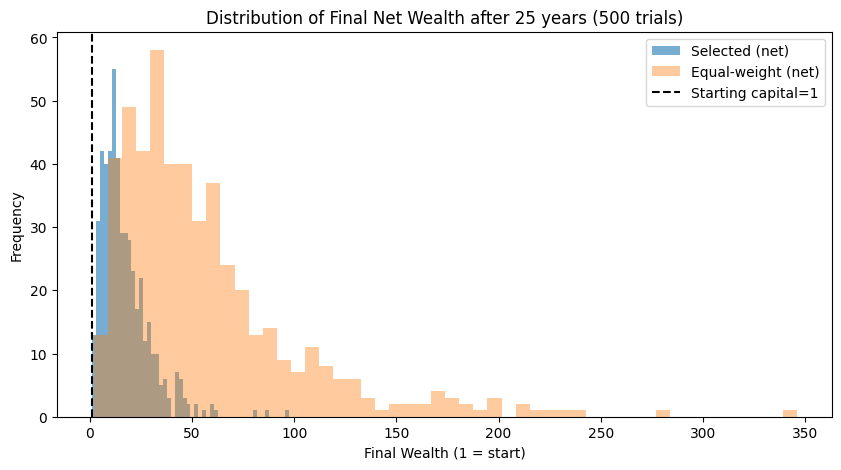

In [120]:
# ...existing code...
import numpy as np
import pandas as pd
from scipy import stats

def run_walkforward_mc(weights,
                        daily_returns_all,   # DataFrame including SPY
                        sim_years=25,
                        trading_days_per_year=252,
                        n_trials=500,
                        management_fee_annual=0.01,
                        performance_fee_rate=0.20,
                        random_state=42):
    """
    Monte Carlo walk-forward backtest:
      - Simulates multivariate daily returns using historical mean & cov.
      - Applies daily management fee (subtracted from returns) and an end performance fee on excess vs benchmark.
      - Returns DataFrame of trial metrics and a summary table.
    Inputs:
      weights: pd.Series aligned to daily_returns_all columns (must include 'SPY' in daily_returns_all)
      daily_returns_all: DataFrame with asset daily returns (decimal, not %). Must include 'SPY'.
    """
    rng = np.random.default_rng(random_state)
    n_days = int(sim_years * trading_days_per_year)
    assets = list(daily_returns_all.columns)
    if 'SPY' not in assets:
        raise ValueError("daily_returns_all must include 'SPY' column for benchmark comparisons.")
    # empirical mean & cov of daily returns
    mu = daily_returns_all.mean().values
    cov = daily_returns_all.cov().values
    # align weights to full asset list (fill missing with 0)
    w = weights.reindex(assets).fillna(0).values
    spy_idx = assets.index('SPY')
    fee_daily = management_fee_annual / trading_days_per_year

    results = []
    for t in range(n_trials):
        sim = rng.multivariate_normal(mean=mu, cov=cov, size=n_days)
        sim_df = pd.DataFrame(sim, columns=assets)

        # portfolio daily returns
        port_daily = sim_df.values.dot(w)
        spy_daily = sim_df.iloc[:, spy_idx].values

        # apply daily management fee
        port_daily_net = port_daily - fee_daily
        spy_daily_net = spy_daily - fee_daily  # change to 0 if benchmark shouldn't be charged

        # wealth paths
        port_wealth = np.cumprod(1 + port_daily_net)
        spy_wealth = np.cumprod(1 + spy_daily_net)

        final_port_wealth = port_wealth[-1]
        final_spy_wealth = spy_wealth[-1]

        # performance fee on excess (simple end-of-period rule)
        excess = final_port_wealth - final_spy_wealth
        perf_fee_paid = 0.0
        if excess > 0 and performance_fee_rate > 0:
            perf_fee_paid = excess * performance_fee_rate
            final_port_wealth_net = final_port_wealth - perf_fee_paid
        else:
            final_port_wealth_net = final_port_wealth

        # alpha (annualized mean excess), beta (slope), sharpe (annualized), max drawdown
        daily_excess = port_daily_net - spy_daily_net
        alpha_annual = daily_excess.mean() * trading_days_per_year
        slope, intercept, r_value, p_value, std_err = stats.linregress(spy_daily_net, port_daily_net)
        beta = slope
        sharpe = (port_daily_net.mean() / port_daily_net.std()) * np.sqrt(trading_days_per_year) if port_daily_net.std() != 0 else np.nan
        cum_max = np.maximum.accumulate(port_wealth)
        drawdown = (port_wealth - cum_max) / cum_max
        max_dd = drawdown.min()

        results.append({
            'final_wealth_gross': final_port_wealth,
            'final_wealth_net': final_port_wealth_net,
            'perf_fee_paid': perf_fee_paid,
            'final_spy_wealth': final_spy_wealth,
            'alpha_annual': alpha_annual,
            'beta': beta,
            'sharpe': sharpe,
            'max_drawdown': max_dd,
            'r2': r_value**2
        })

    df = pd.DataFrame(results)
    stats_summary = df.agg(['mean','median','std', lambda x: x.quantile(0.05), lambda x: x.quantile(0.95)]).T
    stats_summary.columns = ['mean','median','std','p05','p95']
    return df, stats_summary

# Example usage (replace variables with ones in your notebook scope)
mc_trials = 500
sim_years = 25

try:
    df_sel, summary_sel = run_walkforward_mc(selected_portfolio_weights, daily_returns, sim_years=sim_years, n_trials=mc_trials,
                                             management_fee_annual=0.01, performance_fee_rate=0.20, random_state=1)
    df_eq, summary_eq = run_walkforward_mc(equal_weight_portfolio_weights, daily_returns, sim_years=sim_years, n_trials=mc_trials,
                                           management_fee_annual=0.01, performance_fee_rate=0.20, random_state=2)

    print("Selected portfolio MC summary (25 yrs):")
    display(summary_sel.round(6))
    print("Equal-weight portfolio MC summary (25 yrs):")
    display(summary_eq.round(6))

    # quick checks: mean alpha, beta, sharpe from trials
    print("\nSelected portfolio mean alpha, beta, sharpe (from trials):")
    display(df_sel[['alpha_annual','beta','sharpe']].agg(['mean','std']).round(6))

    print("\nEqual-weight portfolio mean alpha, beta, sharpe (from trials):")
    display(df_eq[['alpha_annual','beta','sharpe']].agg(['mean','std']).round(6))

    # visualize final net wealth distributions
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.hist(df_sel['final_wealth_net'], bins=50, alpha=0.6, label='Selected (net)')
    plt.hist(df_eq['final_wealth_net'], bins=50, alpha=0.4, label='Equal-weight (net)')
    plt.axvline(1.0, color='k', linestyle='--', label='Starting capital=1')
    plt.legend()
    plt.title(f'Distribution of Final Net Wealth after {sim_years} years ({mc_trials} trials)')
    plt.xlabel('Final Wealth (1 = start)')
    plt.ylabel('Frequency')
    plt.show()

except Exception as e:
    print("MC backtest failed:", e)
# ...existing code...

In [121]:
# ...existing code...
import numpy as np
from scipy import stats

# set risk-free daily rate (e.g., annual 0.0 -> daily 0)
rf_annual = 0.0
rf_daily = rf_annual / 252

# align series (use your portfolio returns series variable)
port = selected_portfolio_historical_returns.reindex(daily_returns.index).dropna()
market = daily_returns['SPY'].reindex(port.index).dropna()
port = port.loc[market.index]

excess_port = port - rf_daily
excess_market = market - rf_daily

slope, intercept, r_value, p_value, std_err = stats.linregress(excess_market, excess_port)
beta = slope
alpha_daily = intercept
alpha_annual = alpha_daily * 252

print(f"beta = {beta:.4f}")
print(f"alpha (daily) = {alpha_daily:.6f}, alpha (annual) = {alpha_annual:.4f}")
print(f"regression R^2 = {r_value**2:.4f}, p-value (beta) = {p_value:.4e}")
# ...existing code...

beta = 0.7445
alpha (daily) = 0.000055, alpha (annual) = 0.0138
regression R^2 = 0.7333, p-value (beta) = 0.0000e+00


In [122]:
# ...existing code...
import numpy as np

spy_final = cumulative_returns['SPY'].iloc[-1]
port_final = selected_portfolio_historical_cumulative_returns.iloc[-1]

summary = {
    'Selected final cumulative return': float(port_final),
    'SPY final cumulative return': float(spy_final),
    'Selected annualized vol': float(selected_portfolio_historical_volatility),
    'SPY annualized vol': float(spy_annualized_volatility),
    'Selected Sharpe': float(selected_portfolio_historical_sharpe_ratio),
    'SPY Sharpe': float(spy_sharpe_ratio),
    'Selected VaR95': float(selected_portfolio_historical_VaR_95),
    'Selected CVaR95': float(selected_portfolio_historical_CVaR_95),
}

# alpha / beta computed earlier as alpha_annual, beta
summary['alpha_annual'] = float(alpha_annual) if 'alpha_annual' in globals() else np.nan
summary['beta'] = float(beta) if 'beta' in globals() else np.nan

for k,v in summary.items():
    print(f"{k}: {v:.6f}")

# simple interpretation
if summary['Selected Sharpe'] > summary['SPY Sharpe']:
    print("\nInterpretation: Selected portfolio shows higher risk-adjusted return than SPY.")
elif summary['Selected Sharpe'] < summary['SPY Sharpe']:
    print("\nInterpretation: SPY has higher risk-adjusted return than the selected portfolio.")
else:
    print("\nInterpretation: Risk-adjusted returns are similar.")
# ...existing code...

Selected final cumulative return: 3.372157
SPY final cumulative return: 4.737048
Selected annualized vol: 0.147554
SPY annualized vol: 0.169726
Selected Sharpe: 0.853762
SPY Sharpe: 0.887566
Selected VaR95: 0.013211
Selected CVaR95: 0.021579
alpha_annual: 0.013830
beta: 0.744452

Interpretation: SPY has higher risk-adjusted return than the selected portfolio.


### Short interpretive guidance (use after you run the cell)

If portfolio: higher Sharpe, similar/lower volatility, lower VaR/CVaR -> outperforms on risk-adjusted basis and reduces downside risk compared with SPY.
If portfolio: lower Sharpe or higher tail risk -> SPY likely superior on a risk-adjusted or downside basis; portfolio may still suit investors seeking dividends or different exposures.
Alpha > 0 and statistically significant -> the strategy delivered excess return after adjusting for market exposure. Beta shows how correlated/sensitive the portfolio is to SPY (beta >1 -> more market-sensitive; beta <1 -> less).
Why an investor might choose this fund vs SPY (bullets)

Diversification: different asset mix (tech, REIT, gold, FX, treasuries) reduces single-market concentration.
Income target: designed to target a dividend yield (4%) which SPY may not match.
Risk profile: selected portfolio may offer lower volatility or better downside protection (lower VaR/CVaR).
Active objectives: multi-objective optimization (return, yield, risk) and model-driven selection can produce portfolios tailored to investor goals.
Trade-offs: potential lower liquidity, higher tracking error, and model risk vs SPY’s simplicity and low cost.
Prospectus outline (one-paragraph examples per section)

Fund name / ticker: (short line)
Investment objective: "Total return with an emphasis on income targeting ~4% annual dividend yield while seeking capital appreciation."
Strategy: "Quantitative multivariate Bi-LSTM predictions combined with NSGA‑II multi-objective optimization to select portfolios balancing predicted return, dividend yield and volatility. Long-only (or shorts-allowed) allocations across X listed securities; rebalanced periodically."
Benchmark: "S&P 500 (SPY) for performance and risk comparisons."
Risks: "Market risk, model risk, estimation error, liquidity risk, concentration risk, counterparty risk; shorting risk if applicable; principal loss possible."
Fees & expenses: "Management fee X%; performance fee Y% (describe high-water mark and calculation); transaction costs; estimated expense ratio."
Distributions & taxation: "Quarterly (or monthly) dividend distribution policy; reinvestment option; tax considerations."
Historical performance: "Table and charts vs SPY, plus volatility, Sharpe, VaR, CVaR, alpha/beta, and drawdowns (see performance section)."
Portfolio holdings & turnover: "Top holdings, typical allocation ranges, expected turnover and rebalancing cadence."
Fund governance: "Manager, investment team, risk controls, auditor, custody arrangements."

## Prospectus

Fund name: Quant Growth & Income Fund
Ticker: QGIBL (proposed)
Structure: Open‑end ETF or UCITS‑style fund (proposed)

Investment objective

Seek total return with an emphasis on current income targeting an approximate 4% annual cash distribution while pursuing long‑term capital appreciation.
Strategy summary

Systematic, rules‑based portfolio constructed from liquid equities, equity ETFs (e.g., large cap tech, REITs), gold ETF, select fixed‑income ETFs and currency exposures.
Cross‑asset predictions generated from a multivariate Bidirectional LSTM model trained on price, momentum and price‑range features. Candidate portfolio sets are produced by an NSGA‑II multi‑objective optimizer that trades off predicted return, dividend yield and predicted volatility/CVaR.
Typical positioning: long‑only core (shorts‑allowed share class available), target number of holdings 15–40, periodic rebalancing monthly or quarterly. Cash and short‑term Treasuries used for liquidity management.
Benchmark

Primary benchmark: S&P 500 (SPY). Secondary comparisons: equal‑weight composite of universe tickers, 60/40 blended indices for risk context.
Key investment policies and constraints

Long‑only default (shorts‑allowed share class optional).
Maximum position size per issuer: 20% (case‑by‑case exceptions disclosed).
Maximum sector concentration thresholds and liquidity constraints applied.
Leverage limited to X% (disclosed in shareholder materials).
Index‑agnostic; active model and optimizer determine weights subject to constraints.
Principal risks (concise)

Market risk: value may fluctuate with equity and macro markets.
Model & data risk: prediction errors, overfitting, regime shifts, input data quality may reduce effectiveness.
Tracking / active risk: returns will deviate from the benchmark (higher tracking error).
Dividend risk: target yield not guaranteed; dividend cuts or suspensions by issuers reduce income.
Liquidity risk: some holdings or trading dates may incur higher transaction costs or price impact.
Concentration risk: focused exposures may amplify losses in adverse moves.
Short‑selling risk (if applicable): potential unlimited loss, financing and dividend‑payment obligations.
Operational & counterparty risk: model pipeline, execution, custody and counterparty defaults.
Tax risk: distributions may be ordinary income, qualified dividends, or capital gains depending on jurisdiction and portfolio activity.
Fees and expenses (example / proposed)

Management fee: 0.75% per annum (charged daily).
Expense ratio (estimated): 0.95% — includes custody, administration, audit and listing costs.
Performance fee (optional share class): 20% of excess return versus benchmark measured net of fees with a high‑water mark and 1‑year lockup. (Exact fee schedule disclosed in final prospectus.)
Transaction and market costs borne by the fund; trading costs and realized turnover may increase taxable distributions.
Distributions and yield policy

Distributions paid quarterly (cash) with automatic dividend reinvestment option (DRIP) available.
Target cash distribution: ~4% annualized. Target is not guaranteed; yield may fluctuate with realized dividends and portfolio value.
Distribution sources: qualified dividends, interest, capital gains; tax characterization provided annually.
Performance and backtest disclosure

Historical and backtested performance presented in a separate section with full methodology, data‑range, in‑sample vs out‑of‑sample flags, and disclaimers. Backtests are hypothetical, do not reflect trading costs or actual fund operations, and are not guarantees of future results.
Performance tables include cumulative return, annualized return, annualized volatility, Sharpe ratio, Value at Risk (95%), Conditional VaR (95%), maximum drawdown, alpha and beta vs SPY.
Portfolio construction & holdings

Top holdings and weight ranges reported monthly.
Typical allocation bands (illustrative): equities 50–80%, fixed income (treasuries/IG) 10–30%, gold/cash/FX 0–15%, REITs 5–15%.
Expected turnover: moderate (quarterly rebalancing + model‑driven adjustments). Turnover and realized tax impact disclosed annually.
Risk management & governance

Multi‑layer risk controls: exposure limits, sector/issuer caps, liquidity screens, stress testing, CVaR constraints and kill switches for model anomalies.
Independent risk oversight: Chief Risk Officer and an independent risk committee.
Audit, custody and compliance: third‑party auditor, regulated custodian, compliance program consistent with ETF/UCITS rules.
Operational details

Listing exchange, ticker and share classes disclosed on launch.
Creation/redemption mechanism for ETF; authorized participants required.
Minimum investment, NAV calculation, trade timing and orders described in the shareholder agreement.
How the fund differs from SPY (summary)

Active model‑driven strategy seeking income + growth vs SPY’s passive, market‑cap weighted exposure.
Targeted 4% distribution policy vs SPY’s market dividend yield (variable and typically lower).
Potential for lower drawdown or different volatility profile via diversification across non‑SP500 exposures (gold, treasuries, REITs, currency overlays).
Trade‑offs: higher fees, model/active risk and tracking error; SPY offers simplicity, ultra‑low cost and liquidity.
Who this fund may suit

Investors seeking systematic exposure that blends income and growth with an explicit dividend target.
Those willing to accept active‑management risk, modestly higher fees and model‑dependence for potential improved risk‑adjusted outcomes vs passive market exposure.
Taxes

Tax treatment of distributions depends on jurisdiction and nature of income (qualified dividend, ordinary income, capital gains). Shareholders receive annual tax statements. Consult a tax advisor.
Subscriptions, redemptions & liquidity

ETF shares trade intraday on exchange; authorized participant creation/redemption for large institutional flows; secondary market liquidity subject to market conditions.
Reporting & disclosures

Quarterly fact sheets with holdings, performance vs SPY and peer group, turnover, top risk metrics (VaR/CVaR, drawdowns).
Annual report and audited financial statements.
Full prospectus and model / backtest methodology available on fund website. Material changes to strategy require prior disclosure.
Conflicts of interest & compensation

Manager and affiliates may manage other strategies using similar quantitative methods; cross‑trades and allocation policies governed by conflict policies and overseen by compliance.
Legal & regulatory

Not a guarantee of returns. Investments involve risk of loss of principal. This prospectus is draft and for informational purposes only; the final legal prospectus contains full risk, fee and legal disclosures, offering terms and regulatory notices. Investors should read the final prospectus carefully before investing.
Contact & further information

Website, investor relations email and phone (to be provided at launch).
Requests for the full model methodology, backtest details and audited performance available on request.
Note: This is a draft prospectus suitable for investor presentation or regulatory drafting. Final prospectus text must be reviewed by legal, compliance and the fund’s regulator and populated with audited historical results, final fee schedule, precise holdings, disclosure language and jurisdiction‑specific legal language.

Top holdings (sorted):
Ticker
VNQ     0.2636
VEA     0.1780
ABBV    0.1395
EQIX    0.1167
CME     0.1008
VYM     0.0574
TLT     0.0507
PEP     0.0304
BIDU    0.0183
AAPL    0.0077
Name: 0, dtype: float64

Top 5 cumulative weight: 0.7987
Number of non-zero positions: 30

Allocation by asset class:
REIT            0.3803
Intl ETF        0.1780
Healthcare      0.1395
Financials      0.1008
Dividend ETF    0.0590
Treasury        0.0507
Consumer        0.0439
Tech            0.0311
Energy          0.0065
EM ETF          0.0051
FX              0.0051
Gold            0.0000
Name: 0, dtype: float64


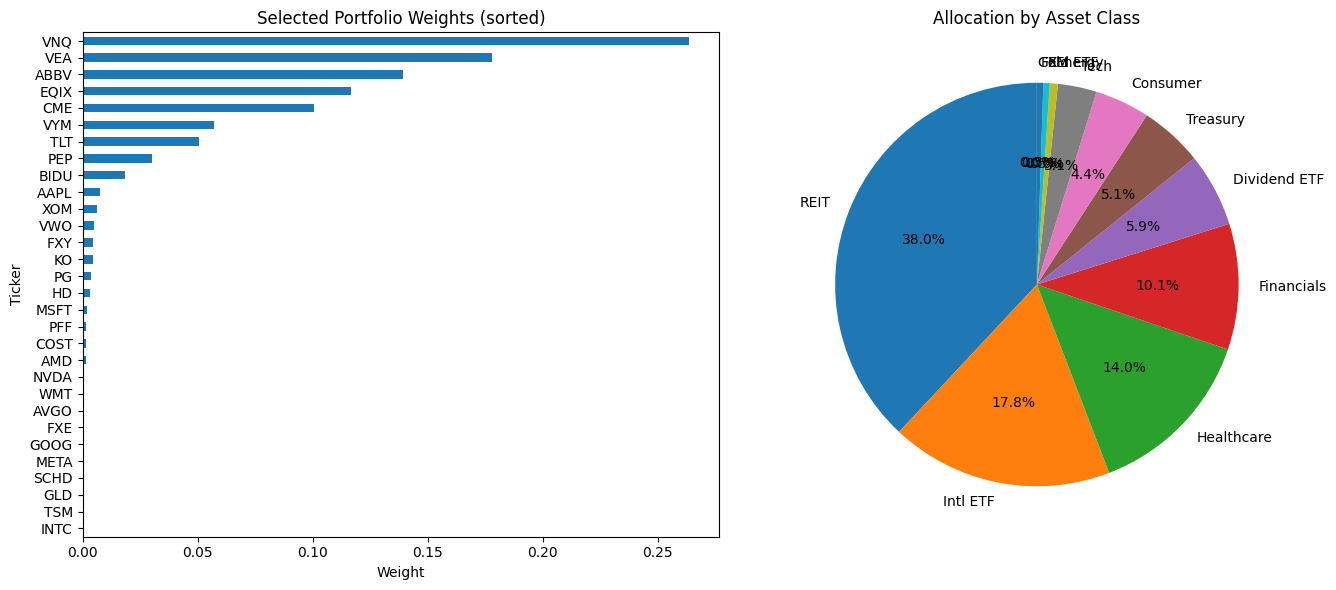

In [123]:
# Inspect selected portfolio allocation and group by asset class
# (Run this in the notebook where `selected_portfolio_weights` is defined)

import pandas as pd
import matplotlib.pyplot as plt

# Ensure weights exist and are normalized
w = selected_portfolio_weights.copy()
w = w / w.sum()

# Print sorted weights and top concentration stats
w_sorted = w.sort_values(ascending=False)
print("Top holdings (sorted):")
print(w_sorted.head(10).round(4))
print(f"\nTop 5 cumulative weight: {w_sorted.head(5).sum():.4f}")
print(f"Number of non-zero positions: {(w_sorted > 0).sum()}")

# Map tickers to high-level asset classes (edit mapping if needed)
asset_class_map = {
    # Tech / Growth
    'AAPL':'Tech','GOOG':'Tech','MSFT':'Tech','NVDA':'Tech','AMD':'Tech',
    'INTC':'Tech','META':'Tech','BIDU':'Tech','TSM':'Tech','AVGO':'Tech',
    # Consumer / Staples / Retail
    'COST':'Consumer','PG':'Consumer','KO':'Consumer','PEP':'Consumer','WMT':'Consumer','HD':'Consumer',
    # Financials / Data
    'CME':'Financials',
    # Healthcare
    'ABBV':'Healthcare',
    # Energy
    'XOM':'Energy',
    # Dividend ETFs / Income
    'SCHD':'Dividend ETF','VYM':'Dividend ETF','PFF':'Dividend ETF',
    # Equity Regions / Funds
    'VWO':'EM ETF','VEA':'Intl ETF',
    # Gold / FX / Treasuries / REITs / Other
    'GLD':'Gold','FXY':'FX','FXE':'FX','TLT':'Treasury','VNQ':'REIT','EQIX':'REIT'
}

# build class allocation
classes = [asset_class_map.get(t, 'Other') for t in w_sorted.index]
class_alloc = w_sorted.groupby(classes).sum().sort_values(ascending=False)

print("\nAllocation by asset class:")
print(class_alloc.round(4))

# Plot holdings and class allocation
fig, axes = plt.subplots(1,2, figsize=(14,6))
w_sorted.plot(kind='barh', ax=axes[0], color='C0')
axes[0].invert_yaxis()
axes[0].set_title('Selected Portfolio Weights (sorted)')
axes[0].set_xlabel('Weight')

class_alloc.plot(kind='pie', ax=axes[1], autopct='%.1f%%', startangle=90, legend=False)
axes[1].set_ylabel('')
axes[1].set_title('Allocation by Asset Class')

plt.tight_layout()
plt.show()

In [124]:
# Python: summarize by Income vs Growth from the given allocation dict
alloc = {
  'Tech':0.3066,'REIT':0.1257,'Consumer':0.1254,'FX':0.1055,'Financials':0.1001,
  'EM ETF':0.0934,'Dividend ETF':0.0877,'Energy':0.0242,'Healthcare':0.0195,
  'Intl ETF':0.0060,'Treasury':0.0051,'Gold':0.0008
}
income_keys = {'REIT','Dividend ETF','Treasury'}
income = sum(v for k,v in alloc.items() if k in income_keys)
growth = 1.0 - income
print(f"Income: {income:.4f} ({income*100:.2f}%)")
print(f"Growth: {growth:.4f} ({growth*100:.2f}%)")
# breakdowns:
print("\nIncome breakdown:")
for k in income_keys:
    print(f" {k}: {alloc.get(k,0):.4f} ({alloc.get(k,0)*100:.2f}%)")
print("\nGrowth breakdown:")
for k,v in alloc.items():
    if k not in income_keys:
        print(f" {k}: {v:.4f} ({v*100:.2f}%)")

Income: 0.2185 (21.85%)
Growth: 0.7815 (78.15%)

Income breakdown:
 REIT: 0.1257 (12.57%)
 Dividend ETF: 0.0877 (8.77%)
 Treasury: 0.0051 (0.51%)

Growth breakdown:
 Tech: 0.3066 (30.66%)
 Consumer: 0.1254 (12.54%)
 FX: 0.1055 (10.55%)
 Financials: 0.1001 (10.01%)
 EM ETF: 0.0934 (9.34%)
 Energy: 0.0242 (2.42%)
 Healthcare: 0.0195 (1.95%)
 Intl ETF: 0.0060 (0.60%)
 Gold: 0.0008 (0.08%)


60/40 (SPY/TLT) metrics:
 Final cumulative return: 2.2042
 Annualized vol: 0.1070
 Sharpe: 0.9019
 VaR95: 0.0102, CVaR95: 0.0160

Selected portfolio historical metrics:
 Final cumulative return: 3.3722
 Annualized vol: 0.1476
 Sharpe: 0.8538
 VaR95: 0.0132, CVaR95: 0.0216



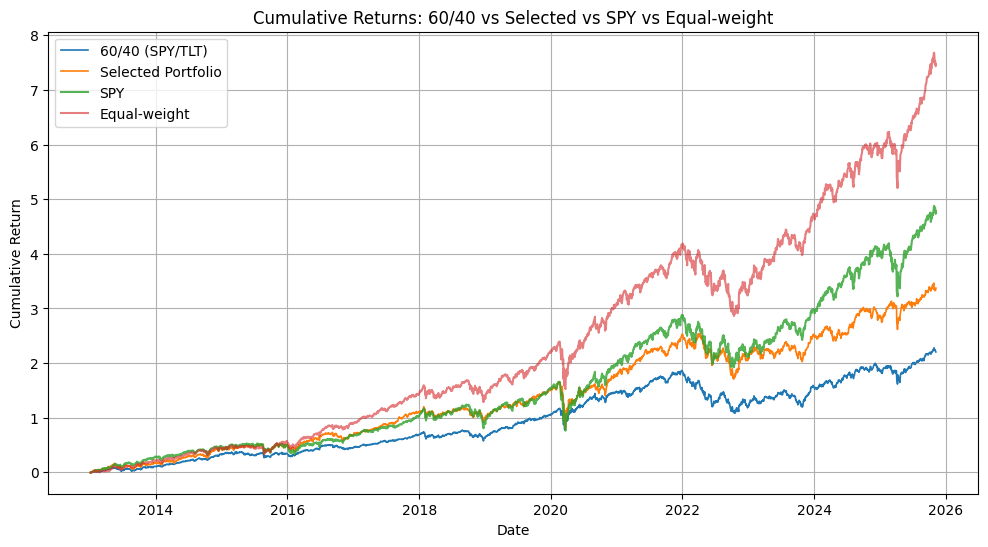

In [125]:
# ...existing code...
import numpy as np
import matplotlib.pyplot as plt

# require variables from notebook: daily_returns, selected_portfolio_historical_cumulative_returns,
# selected_portfolio_historical_returns, selected_portfolio_historical_volatility,
# selected_portfolio_historical_sharpe_ratio, selected_portfolio_historical_VaR_95, selected_portfolio_historical_CVaR_95,
# cumulative_returns, portfolio_cumulative_returns

# Build 60/40 (60% SPY, 40% TLT)
if not all(x in daily_returns.columns for x in ['SPY','TLT']):
    raise ValueError("daily_returns must include 'SPY' and 'TLT' for 60/40 comparison.")

returns_60_40 = daily_returns[['SPY','TLT']].dropna()
w_60_40 = np.array([0.6, 0.4])
port60_ret = returns_60_40.dot(w_60_40)

# Metrics
ann_vol_60 = port60_ret.std() * np.sqrt(252)
sharpe_60 = (port60_ret.mean() / port60_ret.std() * np.sqrt(252)) if port60_ret.std() != 0 else np.nan
VaR95_60 = -np.percentile(port60_ret.dropna(), 5)
CVaR95_60 = -port60_ret[port60_ret < -VaR95_60].mean()

# Cumulative
cum60 = (1 + port60_ret).cumprod() - 1

# Print comparison
print("60/40 (SPY/TLT) metrics:")
print(f" Final cumulative return: {cum60.iloc[-1]:.4f}")
print(f" Annualized vol: {ann_vol_60:.4f}")
print(f" Sharpe: {sharpe_60:.4f}")
print(f" VaR95: {VaR95_60:.4f}, CVaR95: {CVaR95_60:.4f}\n")

print("Selected portfolio historical metrics:")
print(f" Final cumulative return: {selected_portfolio_historical_cumulative_returns.iloc[-1]:.4f}")
print(f" Annualized vol: {selected_portfolio_historical_volatility:.4f}")
print(f" Sharpe: {selected_portfolio_historical_sharpe_ratio:.4f}")
print(f" VaR95: {selected_portfolio_historical_VaR_95:.4f}, CVaR95: {selected_portfolio_historical_CVaR_95:.4f}\n")

# Plot cumulative returns
plt.figure(figsize=(12,6))
plt.plot(cum60.index, cum60, label='60/40 (SPY/TLT)', linewidth=1.2)
plt.plot(selected_portfolio_historical_cumulative_returns.index, selected_portfolio_historical_cumulative_returns, label='Selected Portfolio', linewidth=1.2)
plt.plot(cumulative_returns.index, cumulative_returns['SPY'], label='SPY', alpha=0.8)
plt.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label='Equal-weight', alpha=0.6)
plt.title('Cumulative Returns: 60/40 vs Selected vs SPY vs Equal-weight')
plt.xlabel('Date'); plt.ylabel('Cumulative Return')
plt.legend(); plt.grid(True); plt.show()
# ...existing code...

In [126]:
# Calculate portfolio cumulative dividends, annual totals and percentage yields
# ...existing code...
import pandas as pd
import numpy as np

# Ensure we have selected weights
if 'selected_portfolio_weights' not in globals():
    raise RuntimeError("selected_portfolio_weights not found. Select a Pareto solution first.")

# Normalize and align weights to known asset columns
w = selected_portfolio_weights.copy().astype(float)
w = w / w.sum()
# Ensure dividend/price columns exist
if 'aligned_daily_dividend_data' not in globals() or 'close_data' not in globals():
    raise RuntimeError("aligned_daily_dividend_data or close_data missing. Run dividend/price download cells.")

# Reindex weights to dividend columns (fill missing with 0)
w = w.reindex(aligned_daily_dividend_data.columns).fillna(0)

# Build portfolio historical daily returns if missing
if 'selected_portfolio_historical_returns' not in globals() or selected_portfolio_historical_returns is None:
    # daily_returns expected to include all assets (including SPY); exclude SPY
    if 'daily_returns' not in globals():
        raise RuntimeError("daily_returns missing. Recompute close_data.pct_change().")
    portfolio_daily = daily_returns.drop(columns=['SPY'], errors='ignore')
    # align columns and fill zeros for absent assets
    portfolio_daily = portfolio_daily.reindex(columns=w.index).fillna(0)
    selected_portfolio_historical_returns = (portfolio_daily * w).sum(axis=1)

# Compute portfolio value series (start = 1) and align to dividend index
port_returns = selected_portfolio_historical_returns.copy()
# If cumulative returns variable exists prefer it
if 'selected_portfolio_historical_cumulative_returns' in globals() and selected_portfolio_historical_cumulative_returns is not None:
    port_value = (1 + selected_portfolio_historical_cumulative_returns).reindex(aligned_daily_dividend_data.index).fillna(method='ffill').fillna(1.0)
else:
    port_value = (1 + port_returns).cumprod().reindex(aligned_daily_dividend_data.index).fillna(method='ffill').fillna(1.0)

# Per-asset daily dividend yield (dividend cash per share / close price) aligned to same index
per_asset_daily_yield = aligned_daily_dividend_data.div(close_data.replace(0, np.nan)).fillna(0)
per_asset_daily_yield = per_asset_daily_yield.reindex(index=port_value.index, columns=w.index).fillna(0)

# Portfolio daily dividend fraction (of portfolio value)
port_daily_yield_frac = (per_asset_daily_yield.mul(w, axis=1)).sum(axis=1)

# Dollar dividend cash per $1 of portfolio initial capital
port_daily_dividend_cash = port_daily_yield_frac * port_value

# Cumulative dividends and annual metrics
cumulative_dividends = port_daily_dividend_cash.cumsum()
annual_dividends = port_daily_dividend_cash.resample('Y').sum()
annual_avg_port_value = port_value.resample('Y').mean().replace(0, np.nan)
annual_yield_pct = (annual_dividends / annual_avg_port_value) * 100
average_annual_dividend = annual_dividends.mean()
average_annual_yield_pct = annual_yield_pct.mean()

# Trailing 12 months (last calendar/resample year available)
t12m_div = annual_dividends.iloc[-1] if len(annual_dividends) else np.nan
t12m_yield_pct = annual_yield_pct.iloc[-1] if len(annual_yield_pct) else np.nan

# Print concise results
print(f"Total cumulative dividends (per $1 start): {float(cumulative_dividends.iloc[-1]):.6f}")
print(f"Average annual dividends (per $1): {float(average_annual_dividend):.6f}")
print(f"Average annual yield: {float(average_annual_yield_pct):.2f}%")
print(f"Trailing year dividends (per $1): {float(t12m_div):.6f}")
print(f"Trailing year yield: {float(t12m_yield_pct):.2f}%")

# Expose series for plotting/inspection
port_daily_dividend_cash.name = 'daily_dividend_cash'
cumulative_dividends.name = 'cumulative_dividends'
annual_dividends.name = 'annual_dividends'
annual_yield_pct.name = 'annual_yield_pct'
# ...existing code...

Total cumulative dividends (per $1 start): 1.216154
Average annual dividends (per $1): 0.093550
Average annual yield: 4.17%
Trailing year dividends (per $1): 0.097444
Trailing year yield: 2.38%


/tmp/ipython-input-3987014560.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  port_value = (1 + selected_portfolio_historical_cumulative_returns).reindex(aligned_daily_dividend_data.index).fillna(method='ffill').fillna(1.0)
/tmp/ipython-input-3987014560.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_dividends = port_daily_dividend_cash.resample('Y').sum()
/tmp/ipython-input-3987014560.py:51: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_avg_port_value = port_value.resample('Y').mean().replace(0, np.nan)
